In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out, traveller_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

Using TensorFlow backend.


In [4]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [5]:
# the setting for TRB results do not delete
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 20000 #meter
params.dist_threshold_min = 2000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_att = 0.01 #0.5
params.d2d.B_income = 1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 2 #1.5 in oded's paper
params.PT_fare = 1 ## euro
params.PT_avg_speed = 6

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = float(1.20) #euro/km
params.platforms.min_fare = float(2) # euro
params.platforms.comm_rate = float(0.10)
params.platforms.discount = float(0.0) # float(0.0)
params.platforms.daily_marketing = False

params.d2d.learning_d = 2 # 1 for TRB 
params.d2d.B_Experience = 0.80
params.d2d.B_WOM = 0.2
params.d2d.B_Marketing = 0.0
params.d2d.diffusion_speed = 10/100 # speed for M is twice greater than WOM.
params.d2d.m = 7 # 5 for TRB
params.d2d.Eini_att = 0.01
params.d2d.adj_s = 2
params.VoT = 10.63 # value of time per hour
params.seed = 1
params.assert_me = False
params.paths.requests = 'Amsterdam_requests.csv'

params.nP = 2000 # 2000
params.nV = 200  # 200
params.nD = 800
params.simTime = 4
params.d2d.res_wage = params.simTime*10.63 #euro

In [11]:
sim = MaaSSim.simulators.simulate_rldqn_case1_rev(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING,file_res='../../rl_results/ams_prop_exp_002.csv',stp=0.05,initial_comm_rate=0.5)

This simulation uses albatros data


[2023-02-27 10:11:59,372] Setting up 4h simulation at 2023-02-27 08:11:09 for 200 vehicles and 2000 passengers in Amsterdam, Netherlands


stp is:  0.05
type(stp):  <class 'float'>
initial comm rate:  0.5
type(comm_rate):  <class 'numpy.float64'>
----------------> day: 0 of 800 <--------------------


[2023-02-27 10:12:06,242] simulation time 3.5 s


day:  0 , nP:  0 , nV:  0 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.0 , new nP:  0 , new nV:  0 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0
----------------> day: 1 of 800 <--------------------


[2023-02-27 10:12:15,424] simulation time 3.7 s


day:  1 , nP:  0 , nV:  0 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  23.14 , new nP:  3 , new nV:  1 , plat_rev: 23.14 , plat_rev_wod: 23.14 , marketing_cost: 1100.0
----------------> day: 2 of 800 <--------------------


[2023-02-27 10:12:23,950] simulation time 3.7 s


day:  2 , nP:  3 , nV:  1 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  110.44 , new nP:  14 , new nV:  0 , plat_rev: 110.44 , plat_rev_wod: 110.44 , marketing_cost: 1100.0
----------------> day: 3 of 800 <--------------------


[2023-02-27 10:12:33,604] simulation time 4.1 s


day:  3 , nP:  14 , nV:  0 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  151.66 , new nP:  20 , new nV:  3 , plat_rev: 151.66 , plat_rev_wod: 151.66 , marketing_cost: 1100.0
----------------> day: 4 of 800 <--------------------


[2023-02-27 10:12:43,432] simulation time 4.9 s


day:  4 , nP:  20 , nV:  3 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  217.58 , new nP:  35 , new nV:  6 , plat_rev: 217.58 , plat_rev_wod: 217.58 , marketing_cost: 1100.0
----------------> day: 5 of 800 <--------------------


[2023-02-27 10:12:53,741] simulation time 4.4 s


day:  5 , nP:  35 , nV:  6 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  186.86 , new nP:  29 , new nV:  5 , plat_rev: 186.86 , plat_rev_wod: 186.86 , marketing_cost: 1100.0
----------------> day: 6 of 800 <--------------------


[2023-02-27 10:13:03,365] simulation time 4.7 s


day:  6 , nP:  29 , nV:  5 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  263.97 , new nP:  41 , new nV:  5 , plat_rev: 263.97 , plat_rev_wod: 263.97 , marketing_cost: 1100.0
----------------> day: 7 of 800 <--------------------


[2023-02-27 10:13:13,710] simulation time 4.8 s


day:  7 , nP:  41 , nV:  5 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  243.42 , new nP:  41 , new nV:  3 , plat_rev: 243.42 , plat_rev_wod: 243.42 , marketing_cost: 1100.0
----------------> day: 8 of 800 <--------------------


[2023-02-27 10:13:23,215] simulation time 4.6 s


day:  8 , nP:  41 , nV:  3 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  261.58 , new nP:  39 , new nV:  3 , plat_rev: 261.58 , plat_rev_wod: 261.58 , marketing_cost: 1100.0
----------------> day: 9 of 800 <--------------------


[2023-02-27 10:13:33,829] simulation time 5.0 s


day:  9 , nP:  39 , nV:  3 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  345.43 , new nP:  53 , new nV:  9 , plat_rev: 345.43 , plat_rev_wod: 345.43 , marketing_cost: 1100.0
----------------> day: 10 of 800 <--------------------


[2023-02-27 10:13:43,905] simulation time 5.2 s


day:  10 , nP:  53 , nV:  9 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  429.87 , new nP:  60 , new nV:  7 , plat_rev: 429.87 , plat_rev_wod: 429.87 , marketing_cost: 1100.0
----------------> day: 11 of 800 <--------------------


[2023-02-27 10:13:54,590] simulation time 5.1 s


day:  11 , nP:  60 , nV:  7 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  322.91 , new nP:  55 , new nV:  5 , plat_rev: 322.91 , plat_rev_wod: 322.91 , marketing_cost: 1100.0
----------------> day: 12 of 800 <--------------------


[2023-02-27 10:14:03,938] simulation time 4.5 s


day:  12 , nP:  55 , nV:  5 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  452.39 , new nP:  65 , new nV:  1 , plat_rev: 452.39 , plat_rev_wod: 452.39 , marketing_cost: 1100.0
----------------> day: 13 of 800 <--------------------


[2023-02-27 10:14:14,958] simulation time 5.4 s


day:  13 , nP:  65 , nV:  1 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  473.5 , new nP:  72 , new nV:  6 , plat_rev: 473.5 , plat_rev_wod: 473.5 , marketing_cost: 1100.0
----------------> day: 14 of 800 <--------------------


[2023-02-27 10:14:25,963] simulation time 5.4 s


day:  14 , nP:  72 , nV:  6 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  492.0 , new nP:  68 , new nV:  5 , plat_rev: 492.0 , plat_rev_wod: 492.0 , marketing_cost: 1100.0
----------------> day: 15 of 800 <--------------------


[2023-02-27 10:14:36,314] simulation time 5.4 s


day:  15 , nP:  68 , nV:  5 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  476.33 , new nP:  65 , new nV:  13 , plat_rev: 476.33 , plat_rev_wod: 476.33 , marketing_cost: 1100.0
----------------> day: 16 of 800 <--------------------


[2023-02-27 10:14:47,174] simulation time 5.3 s


day:  16 , nP:  65 , nV:  13 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  392.01 , new nP:  63 , new nV:  10 , plat_rev: 392.01 , plat_rev_wod: 392.01 , marketing_cost: 1100.0
----------------> day: 17 of 800 <--------------------


[2023-02-27 10:14:57,277] simulation time 5.3 s


day:  17 , nP:  63 , nV:  10 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  385.78 , new nP:  62 , new nV:  6 , plat_rev: 385.78 , plat_rev_wod: 385.78 , marketing_cost: 1100.0
----------------> day: 18 of 800 <--------------------


[2023-02-27 10:15:08,069] simulation time 5.3 s


day:  18 , nP:  62 , nV:  6 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  486.75 , new nP:  64 , new nV:  6 , plat_rev: 486.75 , plat_rev_wod: 486.75 , marketing_cost: 1100.0
----------------> day: 19 of 800 <--------------------


[2023-02-27 10:15:18,063] simulation time 5.1 s


day:  19 , nP:  64 , nV:  6 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  425.18 , new nP:  62 , new nV:  5 , plat_rev: 425.18 , plat_rev_wod: 425.18 , marketing_cost: 1100.0
----------------> day: 20 of 800 <--------------------


[2023-02-27 10:15:28,790] simulation time 5.2 s


day:  20 , nP:  62 , nV:  5 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  352.01 , new nP:  59 , new nV:  6 , plat_rev: 352.01 , plat_rev_wod: 352.01 , marketing_cost: 1100.0
----------------> day: 21 of 800 <--------------------


[2023-02-27 10:15:38,542] simulation time 4.9 s


day:  21 , nP:  59 , nV:  6 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  302.8 , new nP:  51 , new nV:  4 , plat_rev: 302.8 , plat_rev_wod: 302.8 , marketing_cost: 1100.0
----------------> day: 22 of 800 <--------------------


[2023-02-27 10:15:48,995] simulation time 4.7 s


day:  22 , nP:  51 , nV:  4 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  377.43 , new nP:  63 , new nV:  2 , plat_rev: 377.43 , plat_rev_wod: 377.43 , marketing_cost: 1100.0
----------------> day: 23 of 800 <--------------------


[2023-02-27 10:15:59,352] simulation time 5.5 s


day:  23 , nP:  63 , nV:  2 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  353.53 , new nP:  74 , new nV:  6 , plat_rev: 353.53 , plat_rev_wod: 353.53 , marketing_cost: 1100.0
----------------> day: 24 of 800 <--------------------


[2023-02-27 10:16:10,308] simulation time 5.4 s


day:  24 , nP:  74 , nV:  6 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  325.89 , new nP:  68 , new nV:  9 , plat_rev: 325.89 , plat_rev_wod: 325.89 , marketing_cost: 1100.0
----------------> day: 25 of 800 <--------------------


[2023-02-27 10:16:20,273] simulation time 5.1 s


day:  25 , nP:  68 , nV:  9 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  238.39 , new nP:  59 , new nV:  5 , plat_rev: 238.39 , plat_rev_wod: 238.39 , marketing_cost: 1100.0
----------------> day: 26 of 800 <--------------------


[2023-02-27 10:16:31,406] simulation time 5.5 s


day:  26 , nP:  59 , nV:  5 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  332.92 , new nP:  75 , new nV:  7 , plat_rev: 332.92 , plat_rev_wod: 332.92 , marketing_cost: 1100.0
----------------> day: 27 of 800 <--------------------


[2023-02-27 10:16:42,096] simulation time 5.1 s


day:  27 , nP:  75 , nV:  7 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  218.68 , new nP:  54 , new nV:  8 , plat_rev: 218.68 , plat_rev_wod: 218.68 , marketing_cost: 1100.0
----------------> day: 28 of 800 <--------------------


[2023-02-27 10:16:52,195] simulation time 5.3 s


day:  28 , nP:  54 , nV:  8 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  272.99 , new nP:  62 , new nV:  7 , plat_rev: 272.99 , plat_rev_wod: 272.99 , marketing_cost: 1100.0
----------------> day: 29 of 800 <--------------------


[2023-02-27 10:17:03,340] simulation time 5.6 s


day:  29 , nP:  62 , nV:  7 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  383.6 , new nP:  77 , new nV:  9 , plat_rev: 383.6 , plat_rev_wod: 383.6 , marketing_cost: 1100.0
----------------> day: 30 of 800 <--------------------


[2023-02-27 10:17:13,406] simulation time 5.2 s


day:  30 , nP:  77 , nV:  9 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  282.2 , new nP:  59 , new nV:  6 , plat_rev: 282.2 , plat_rev_wod: 282.2 , marketing_cost: 1100.0
----------------> day: 31 of 800 <--------------------


[2023-02-27 10:17:24,204] simulation time 5.0 s


day:  31 , nP:  59 , nV:  6 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  307.13 , new nP:  57 , new nV:  4 , plat_rev: 307.13 , plat_rev_wod: 307.13 , marketing_cost: 1100.0
----------------> day: 32 of 800 <--------------------


[2023-02-27 10:17:34,518] simulation time 5.5 s


day:  32 , nP:  57 , nV:  4 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  283.45 , new nP:  71 , new nV:  6 , plat_rev: 283.45 , plat_rev_wod: 283.45 , marketing_cost: 1100.0
----------------> day: 33 of 800 <--------------------


[2023-02-27 10:17:45,154] simulation time 5.1 s


day:  33 , nP:  71 , nV:  6 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  290.99 , new nP:  57 , new nV:  5 , plat_rev: 290.99 , plat_rev_wod: 290.99 , marketing_cost: 1100.0
----------------> day: 34 of 800 <--------------------


[2023-02-27 10:17:55,150] simulation time 5.2 s


day:  34 , nP:  57 , nV:  5 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  335.35 , new nP:  61 , new nV:  6 , plat_rev: 335.35 , plat_rev_wod: 335.35 , marketing_cost: 1100.0
----------------> day: 35 of 800 <--------------------


[2023-02-27 10:18:06,021] simulation time 5.4 s


day:  35 , nP:  61 , nV:  6 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  373.19 , new nP:  68 , new nV:  6 , plat_rev: 373.19 , plat_rev_wod: 373.19 , marketing_cost: 1100.0
----------------> day: 36 of 800 <--------------------


[2023-02-27 10:18:16,105] simulation time 5.3 s


day:  36 , nP:  68 , nV:  6 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  417.1 , new nP:  64 , new nV:  6 , plat_rev: 417.1 , plat_rev_wod: 417.1 , marketing_cost: 1100.0
----------------> day: 37 of 800 <--------------------


[2023-02-27 10:18:26,917] simulation time 5.3 s


day:  37 , nP:  64 , nV:  6 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  351.35 , new nP:  61 , new nV:  7 , plat_rev: 351.35 , plat_rev_wod: 351.35 , marketing_cost: 1100.0
----------------> day: 38 of 800 <--------------------


[2023-02-27 10:18:37,045] simulation time 5.3 s


day:  38 , nP:  61 , nV:  7 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  439.87 , new nP:  64 , new nV:  5 , plat_rev: 439.87 , plat_rev_wod: 439.87 , marketing_cost: 1100.0
----------------> day: 39 of 800 <--------------------


[2023-02-27 10:18:47,744] simulation time 5.2 s


day:  39 , nP:  64 , nV:  5 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  374.37 , new nP:  59 , new nV:  5 , plat_rev: 374.37 , plat_rev_wod: 374.37 , marketing_cost: 1100.0
----------------> day: 40 of 800 <--------------------


[2023-02-27 10:18:57,716] simulation time 5.2 s


day:  40 , nP:  59 , nV:  5 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  365.73 , new nP:  57 , new nV:  7 , plat_rev: 365.73 , plat_rev_wod: 365.73 , marketing_cost: 1100.0
----------------> day: 41 of 800 <--------------------


[2023-02-27 10:19:08,530] simulation time 5.3 s


day:  41 , nP:  57 , nV:  7 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  432.43 , new nP:  61 , new nV:  10 , plat_rev: 432.43 , plat_rev_wod: 432.43 , marketing_cost: 1100.0
----------------> day: 42 of 800 <--------------------


[2023-02-27 10:19:18,945] simulation time 5.6 s


day:  42 , nP:  61 , nV:  10 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  380.78 , new nP:  49 , new nV:  5 , plat_rev: 380.78 , plat_rev_wod: 380.78 , marketing_cost: 1100.0
----------------> day: 43 of 800 <--------------------


[2023-02-27 10:19:28,851] simulation time 5.0 s


day:  43 , nP:  49 , nV:  5 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  362.76 , new nP:  49 , new nV:  7 , plat_rev: 362.76 , plat_rev_wod: 362.76 , marketing_cost: 1100.0
----------------> day: 44 of 800 <--------------------


[2023-02-27 10:19:39,505] simulation time 5.0 s


day:  44 , nP:  49 , nV:  7 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  440.45 , new nP:  61 , new nV:  4 , plat_rev: 440.45 , plat_rev_wod: 440.45 , marketing_cost: 1100.0
----------------> day: 45 of 800 <--------------------


[2023-02-27 10:19:49,296] simulation time 5.0 s


day:  45 , nP:  61 , nV:  4 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  408.73 , new nP:  55 , new nV:  4 , plat_rev: 408.73 , plat_rev_wod: 408.73 , marketing_cost: 1100.0
----------------> day: 46 of 800 <--------------------


[2023-02-27 10:20:00,174] simulation time 5.3 s


day:  46 , nP:  55 , nV:  4 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  470.82 , new nP:  61 , new nV:  11 , plat_rev: 470.82 , plat_rev_wod: 470.82 , marketing_cost: 1100.0
----------------> day: 47 of 800 <--------------------


[2023-02-27 10:20:10,575] simulation time 5.5 s


day:  47 , nP:  61 , nV:  11 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  485.51 , new nP:  66 , new nV:  8 , plat_rev: 485.51 , plat_rev_wod: 485.51 , marketing_cost: 1100.0
----------------> day: 48 of 800 <--------------------


[2023-02-27 10:20:21,273] simulation time 5.1 s


day:  48 , nP:  66 , nV:  8 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  395.3 , new nP:  52 , new nV:  7 , plat_rev: 395.3 , plat_rev_wod: 395.3 , marketing_cost: 1100.0
----------------> day: 49 of 800 <--------------------


[2023-02-27 10:20:31,527] simulation time 5.4 s


day:  49 , nP:  52 , nV:  7 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  451.91 , new nP:  68 , new nV:  6 , plat_rev: 451.91 , plat_rev_wod: 451.91 , marketing_cost: 1100.0
----------------> day: 50 of 800 <--------------------


[2023-02-27 10:20:42,424] simulation time 5.3 s


day:  50 , nP:  68 , nV:  6 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  419.11 , new nP:  60 , new nV:  8 , plat_rev: 419.11 , plat_rev_wod: 419.11 , marketing_cost: 1100.0
----------------> day: 51 of 800 <--------------------


[2023-02-27 10:20:52,617] simulation time 5.3 s


day:  51 , nP:  60 , nV:  8 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  454.66 , new nP:  63 , new nV:  7 , plat_rev: 454.66 , plat_rev_wod: 454.66 , marketing_cost: 1100.0
----------------> day: 52 of 800 <--------------------


[2023-02-27 10:21:03,670] simulation time 5.5 s


day:  52 , nP:  63 , nV:  7 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  555.35 , new nP:  77 , new nV:  5 , plat_rev: 555.35 , plat_rev_wod: 555.35 , marketing_cost: 1100.0
----------------> day: 53 of 800 <--------------------


[2023-02-27 10:21:13,328] simulation time 4.7 s


day:  53 , nP:  77 , nV:  5 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  482.98 , new nP:  62 , new nV:  2 , plat_rev: 482.98 , plat_rev_wod: 482.98 , marketing_cost: 1100.0
----------------> day: 54 of 800 <--------------------


[2023-02-27 10:21:24,385] simulation time 5.5 s


day:  54 , nP:  62 , nV:  2 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  446.46 , new nP:  67 , new nV:  9 , plat_rev: 446.46 , plat_rev_wod: 446.46 , marketing_cost: 1100.0
----------------> day: 55 of 800 <--------------------


[2023-02-27 10:21:34,206] simulation time 5.0 s


day:  55 , nP:  67 , nV:  9 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  388.73 , new nP:  60 , new nV:  4 , plat_rev: 388.73 , plat_rev_wod: 388.73 , marketing_cost: 1100.0
----------------> day: 56 of 800 <--------------------


[2023-02-27 10:21:45,607] simulation time 5.7 s


day:  56 , nP:  60 , nV:  4 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  449.91 , new nP:  77 , new nV:  10 , plat_rev: 449.91 , plat_rev_wod: 449.91 , marketing_cost: 1100.0
----------------> day: 57 of 800 <--------------------


[2023-02-27 10:21:55,762] simulation time 5.2 s


day:  57 , nP:  77 , nV:  10 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  299.8 , new nP:  58 , new nV:  9 , plat_rev: 299.8 , plat_rev_wod: 299.8 , marketing_cost: 1100.0
----------------> day: 58 of 800 <--------------------


[2023-02-27 10:22:06,573] simulation time 5.1 s


day:  58 , nP:  58 , nV:  9 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  305.86 , new nP:  59 , new nV:  4 , plat_rev: 305.86 , plat_rev_wod: 305.86 , marketing_cost: 1100.0
----------------> day: 59 of 800 <--------------------


[2023-02-27 10:22:16,860] simulation time 5.3 s


day:  59 , nP:  59 , nV:  4 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  333.77 , new nP:  64 , new nV:  5 , plat_rev: 333.77 , plat_rev_wod: 333.77 , marketing_cost: 1100.0
----------------> day: 60 of 800 <--------------------


[2023-02-27 10:22:27,562] simulation time 5.0 s


day:  60 , nP:  64 , nV:  5 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  357.25 , new nP:  70 , new nV:  3 , plat_rev: 357.25 , plat_rev_wod: 357.25 , marketing_cost: 1100.0
----------------> day: 61 of 800 <--------------------


[2023-02-27 10:22:37,767] simulation time 5.3 s


day:  61 , nP:  70 , nV:  3 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  308.63 , new nP:  65 , new nV:  5 , plat_rev: 308.63 , plat_rev_wod: 308.63 , marketing_cost: 1100.0
----------------> day: 62 of 800 <--------------------


[2023-02-27 10:22:48,757] simulation time 5.3 s


day:  62 , nP:  65 , nV:  5 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  295.33 , new nP:  63 , new nV:  6 , plat_rev: 295.33 , plat_rev_wod: 295.33 , marketing_cost: 1100.0
----------------> day: 63 of 800 <--------------------


[2023-02-27 10:22:59,117] simulation time 5.5 s


day:  63 , nP:  63 , nV:  6 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  293.54 , new nP:  66 , new nV:  8 , plat_rev: 293.54 , plat_rev_wod: 293.54 , marketing_cost: 1100.0
----------------> day: 64 of 800 <--------------------


[2023-02-27 10:23:09,965] simulation time 5.2 s


day:  64 , nP:  66 , nV:  8 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  304.19 , new nP:  63 , new nV:  5 , plat_rev: 304.19 , plat_rev_wod: 304.19 , marketing_cost: 1100.0
----------------> day: 65 of 800 <--------------------


[2023-02-27 10:23:20,068] simulation time 5.2 s


day:  65 , nP:  63 , nV:  5 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  263.22 , new nP:  58 , new nV:  6 , plat_rev: 263.22 , plat_rev_wod: 263.22 , marketing_cost: 1100.0
----------------> day: 66 of 800 <--------------------


[2023-02-27 10:23:31,001] simulation time 5.3 s


day:  66 , nP:  58 , nV:  6 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  267.31 , new nP:  67 , new nV:  5 , plat_rev: 267.31 , plat_rev_wod: 267.31 , marketing_cost: 1100.0
----------------> day: 67 of 800 <--------------------


[2023-02-27 10:23:41,243] simulation time 5.3 s


day:  67 , nP:  67 , nV:  5 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  279.21 , new nP:  68 , new nV:  5 , plat_rev: 279.21 , plat_rev_wod: 279.21 , marketing_cost: 1100.0
----------------> day: 68 of 800 <--------------------


[2023-02-27 10:23:52,105] simulation time 5.1 s


day:  68 , nP:  68 , nV:  5 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  176.54 , new nP:  53 , new nV:  11 , plat_rev: 176.54 , plat_rev_wod: 176.54 , marketing_cost: 1100.0
----------------> day: 69 of 800 <--------------------


[2023-02-27 10:24:02,059] simulation time 5.1 s


day:  69 , nP:  53 , nV:  11 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  200.62 , new nP:  67 , new nV:  4 , plat_rev: 200.62 , plat_rev_wod: 200.62 , marketing_cost: 1100.0
----------------> day: 70 of 800 <--------------------


[2023-02-27 10:24:13,240] simulation time 5.5 s


day:  70 , nP:  67 , nV:  4 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  194.99 , new nP:  71 , new nV:  7 , plat_rev: 194.99 , plat_rev_wod: 194.99 , marketing_cost: 1100.0
----------------> day: 71 of 800 <--------------------


[2023-02-27 10:24:23,337] simulation time 5.3 s


day:  71 , nP:  71 , nV:  7 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  132.23 , new nP:  61 , new nV:  10 , plat_rev: 132.23 , plat_rev_wod: 132.23 , marketing_cost: 1100.0
----------------> day: 72 of 800 <--------------------


[2023-02-27 10:24:34,700] simulation time 5.7 s


day:  72 , nP:  61 , nV:  10 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  189.45 , new nP:  76 , new nV:  12 , plat_rev: 189.45 , plat_rev_wod: 189.45 , marketing_cost: 1100.0
----------------> day: 73 of 800 <--------------------


[2023-02-27 10:24:44,741] simulation time 5.2 s


day:  73 , nP:  76 , nV:  12 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  186.24 , new nP:  65 , new nV:  4 , plat_rev: 186.24 , plat_rev_wod: 186.24 , marketing_cost: 1100.0
----------------> day: 74 of 800 <--------------------


[2023-02-27 10:24:55,547] simulation time 5.2 s


day:  74 , nP:  65 , nV:  4 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  193.91 , new nP:  59 , new nV:  10 , plat_rev: 193.91 , plat_rev_wod: 193.91 , marketing_cost: 1100.0
----------------> day: 75 of 800 <--------------------


[2023-02-27 10:25:05,758] simulation time 5.4 s


day:  75 , nP:  59 , nV:  10 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  282.5 , new nP:  67 , new nV:  11 , plat_rev: 282.5 , plat_rev_wod: 282.5 , marketing_cost: 1100.0
----------------> day: 76 of 800 <--------------------


[2023-02-27 10:25:16,825] simulation time 5.5 s


day:  76 , nP:  67 , nV:  11 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  312.74 , new nP:  75 , new nV:  6 , plat_rev: 312.74 , plat_rev_wod: 312.74 , marketing_cost: 1100.0
----------------> day: 77 of 800 <--------------------


[2023-02-27 10:25:27,110] simulation time 5.4 s


day:  77 , nP:  75 , nV:  6 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  275.0 , new nP:  66 , new nV:  10 , plat_rev: 275.0 , plat_rev_wod: 275.0 , marketing_cost: 1100.0
----------------> day: 78 of 800 <--------------------


[2023-02-27 10:25:38,079] simulation time 5.4 s


day:  78 , nP:  66 , nV:  10 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  358.11 , new nP:  65 , new nV:  9 , plat_rev: 358.11 , plat_rev_wod: 358.11 , marketing_cost: 1100.0
----------------> day: 79 of 800 <--------------------


[2023-02-27 10:25:48,720] simulation time 5.8 s


day:  79 , nP:  65 , nV:  9 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  371.74 , new nP:  82 , new nV:  10 , plat_rev: 371.74 , plat_rev_wod: 371.74 , marketing_cost: 1100.0
----------------> day: 80 of 800 <--------------------


[2023-02-27 10:25:59,310] simulation time 5.0 s


day:  80 , nP:  82 , nV:  10 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  197.3 , new nP:  50 , new nV:  5 , plat_rev: 197.3 , plat_rev_wod: 197.3 , marketing_cost: 1100.0
----------------> day: 81 of 800 <--------------------


[2023-02-27 10:26:09,289] simulation time 5.2 s


day:  81 , nP:  50 , nV:  5 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  205.92 , new nP:  56 , new nV:  6 , plat_rev: 205.92 , plat_rev_wod: 205.92 , marketing_cost: 1100.0
----------------> day: 82 of 800 <--------------------


[2023-02-27 10:26:19,820] simulation time 5.0 s


day:  82 , nP:  56 , nV:  6 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  192.43 , new nP:  57 , new nV:  4 , plat_rev: 192.43 , plat_rev_wod: 192.43 , marketing_cost: 1100.0
----------------> day: 83 of 800 <--------------------


[2023-02-27 10:26:29,698] simulation time 5.1 s


day:  83 , nP:  57 , nV:  4 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  194.9 , new nP:  57 , new nV:  5 , plat_rev: 194.9 , plat_rev_wod: 194.9 , marketing_cost: 1100.0
----------------> day: 84 of 800 <--------------------


[2023-02-27 10:26:40,574] simulation time 5.3 s


day:  84 , nP:  57 , nV:  5 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  180.47 , new nP:  65 , new nV:  7 , plat_rev: 180.47 , plat_rev_wod: 180.47 , marketing_cost: 1100.0
----------------> day: 85 of 800 <--------------------


[2023-02-27 10:26:50,793] simulation time 5.4 s


day:  85 , nP:  65 , nV:  7 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  150.5 , new nP:  66 , new nV:  11 , plat_rev: 150.5 , plat_rev_wod: 150.5 , marketing_cost: 1100.0
----------------> day: 86 of 800 <--------------------


[2023-02-27 10:27:01,997] simulation time 5.6 s


day:  86 , nP:  66 , nV:  11 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  184.92 , new nP:  74 , new nV:  8 , plat_rev: 184.92 , plat_rev_wod: 184.92 , marketing_cost: 1100.0
----------------> day: 87 of 800 <--------------------


[2023-02-27 10:27:12,145] simulation time 5.3 s


day:  87 , nP:  74 , nV:  8 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  177.82 , new nP:  63 , new nV:  6 , plat_rev: 177.82 , plat_rev_wod: 177.82 , marketing_cost: 1100.0
----------------> day: 88 of 800 <--------------------


[2023-02-27 10:27:23,349] simulation time 5.7 s


day:  88 , nP:  63 , nV:  6 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  222.82 , new nP:  79 , new nV:  12 , plat_rev: 222.82 , plat_rev_wod: 222.82 , marketing_cost: 1100.0
----------------> day: 89 of 800 <--------------------


[2023-02-27 10:27:33,681] simulation time 5.5 s


day:  89 , nP:  79 , nV:  12 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  202.29 , new nP:  66 , new nV:  9 , plat_rev: 202.29 , plat_rev_wod: 202.29 , marketing_cost: 1100.0
----------------> day: 90 of 800 <--------------------


[2023-02-27 10:27:44,987] simulation time 5.6 s


day:  90 , nP:  66 , nV:  9 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  172.92 , new nP:  66 , new nV:  17 , plat_rev: 172.92 , plat_rev_wod: 172.92 , marketing_cost: 1100.0
----------------> day: 91 of 800 <--------------------


[2023-02-27 10:27:55,105] simulation time 5.1 s


day:  91 , nP:  66 , nV:  17 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  196.54 , new nP:  54 , new nV:  11 , plat_rev: 196.54 , plat_rev_wod: 196.54 , marketing_cost: 1100.0
----------------> day: 92 of 800 <--------------------


[2023-02-27 10:28:06,119] simulation time 5.4 s


day:  92 , nP:  54 , nV:  11 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  188.44 , new nP:  66 , new nV:  16 , plat_rev: 188.44 , plat_rev_wod: 188.44 , marketing_cost: 1100.0
----------------> day: 93 of 800 <--------------------


[2023-02-27 10:28:16,297] simulation time 5.3 s


day:  93 , nP:  66 , nV:  16 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  201.6 , new nP:  63 , new nV:  9 , plat_rev: 201.6 , plat_rev_wod: 201.6 , marketing_cost: 1100.0
----------------> day: 94 of 800 <--------------------


[2023-02-27 10:28:27,190] simulation time 5.3 s


day:  94 , nP:  63 , nV:  9 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  176.88 , new nP:  61 , new nV:  6 , plat_rev: 176.88 , plat_rev_wod: 176.88 , marketing_cost: 1100.0
----------------> day: 95 of 800 <--------------------


[2023-02-27 10:28:36,997] simulation time 5.0 s


day:  95 , nP:  61 , nV:  6 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  156.86 , new nP:  56 , new nV:  5 , plat_rev: 156.86 , plat_rev_wod: 156.86 , marketing_cost: 1100.0
----------------> day: 96 of 800 <--------------------


[2023-02-27 10:28:48,033] simulation time 5.4 s


day:  96 , nP:  56 , nV:  5 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  190.1 , new nP:  67 , new nV:  10 , plat_rev: 190.1 , plat_rev_wod: 190.1 , marketing_cost: 1100.0
----------------> day: 97 of 800 <--------------------


[2023-02-27 10:28:58,050] simulation time 5.2 s


day:  97 , nP:  67 , nV:  10 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  135.27 , new nP:  56 , new nV:  14 , plat_rev: 135.27 , plat_rev_wod: 135.27 , marketing_cost: 1100.0
----------------> day: 98 of 800 <--------------------


[2023-02-27 10:29:09,131] simulation time 5.5 s


day:  98 , nP:  56 , nV:  14 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  150.63 , new nP:  68 , new nV:  12 , plat_rev: 150.63 , plat_rev_wod: 150.63 , marketing_cost: 1100.0
----------------> day: 99 of 800 <--------------------


[2023-02-27 10:29:19,392] simulation time 5.4 s


day:  99 , nP:  68 , nV:  12 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  162.02 , new nP:  67 , new nV:  11 , plat_rev: 162.02 , plat_rev_wod: 162.02 , marketing_cost: 1100.0
----------------> day: 100 of 800 <--------------------


[2023-02-27 10:29:30,212] simulation time 5.2 s


day:  100 , nP:  67 , nV:  11 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -149.99 , new nP:  61 , new nV:  6 , plat_rev: -149.99 , plat_rev_wod: 149.99 , marketing_cost: 0
----------------> day: 101 of 800 <--------------------


[2023-02-27 10:29:40,401] simulation time 5.4 s


day:  101 , nP:  61 , nV:  6 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -183.76 , new nP:  66 , new nV:  14 , plat_rev: -183.76 , plat_rev_wod: 110.25 , marketing_cost: 0
----------------> day: 102 of 800 <--------------------


[2023-02-27 10:29:51,271] simulation time 5.2 s


day:  102 , nP:  66 , nV:  14 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -173.64 , new nP:  61 , new nV:  11 , plat_rev: -173.64 , plat_rev_wod: 104.18 , marketing_cost: 0
----------------> day: 103 of 800 <--------------------


[2023-02-27 10:30:01,548] simulation time 5.5 s


day:  103 , nP:  61 , nV:  11 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -232.01 , new nP:  76 , new nV:  7 , plat_rev: -232.01 , plat_rev_wod: 139.2 , marketing_cost: 0
----------------> day: 104 of 800 <--------------------


[2023-02-27 10:30:12,289] simulation time 5.1 s


day:  104 , nP:  76 , nV:  7 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -144.11 , new nP:  55 , new nV:  13 , plat_rev: -144.11 , plat_rev_wod: 86.47 , marketing_cost: 0
----------------> day: 105 of 800 <--------------------


[2023-02-27 10:30:22,188] simulation time 5.1 s


day:  105 , nP:  55 , nV:  13 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -117.17 , new nP:  50 , new nV:  9 , plat_rev: -117.17 , plat_rev_wod: 117.17 , marketing_cost: 0
----------------> day: 106 of 800 <--------------------


[2023-02-27 10:30:33,456] simulation time 5.6 s


day:  106 , nP:  50 , nV:  9 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -172.56 , new nP:  79 , new nV:  10 , plat_rev: -172.56 , plat_rev_wod: 172.56 , marketing_cost: 0
----------------> day: 107 of 800 <--------------------


[2023-02-27 10:30:43,854] simulation time 5.6 s


day:  107 , nP:  79 , nV:  10 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -126.49 , new nP:  73 , new nV:  12 , plat_rev: -126.49 , plat_rev_wod: 210.82 , marketing_cost: 0
----------------> day: 108 of 800 <--------------------


[2023-02-27 10:30:54,781] simulation time 5.4 s


day:  108 , nP:  73 , nV:  12 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -71.29 , new nP:  65 , new nV:  9 , plat_rev: -71.29 , plat_rev_wod: 223.67 , marketing_cost: 0
----------------> day: 109 of 800 <--------------------


[2023-02-27 10:31:04,970] simulation time 5.4 s


day:  109 , nP:  65 , nV:  9 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -27.05 , new nP:  62 , new nV:  14 , plat_rev: -27.05 , plat_rev_wod: 232.99 , marketing_cost: 0
----------------> day: 110 of 800 <--------------------


[2023-02-27 10:31:15,953] simulation time 5.4 s


day:  110 , nP:  62 , nV:  14 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -29.69 , new nP:  62 , new nV:  13 , plat_rev: -29.69 , plat_rev_wod: 228.65 , marketing_cost: 0
----------------> day: 111 of 800 <--------------------


[2023-02-27 10:31:26,400] simulation time 5.6 s


day:  111 , nP:  62 , nV:  13 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  5.36 , new nP:  75 , new nV:  9 , plat_rev: 5.36 , plat_rev_wod: 328.16 , marketing_cost: 0
----------------> day: 112 of 800 <--------------------


[2023-02-27 10:31:37,468] simulation time 5.4 s


day:  112 , nP:  75 , nV:  9 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  46.93 , new nP:  67 , new nV:  7 , plat_rev: 46.93 , plat_rev_wod: 371.49 , marketing_cost: 0
----------------> day: 113 of 800 <--------------------


[2023-02-27 10:31:47,468] simulation time 5.2 s


day:  113 , nP:  67 , nV:  7 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  81.58 , new nP:  60 , new nV:  7 , plat_rev: 81.58 , plat_rev_wod: 391.6 , marketing_cost: 0
----------------> day: 114 of 800 <--------------------


[2023-02-27 10:31:58,386] simulation time 5.4 s


day:  114 , nP:  60 , nV:  7 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  81.65 , new nP:  66 , new nV:  7 , plat_rev: 81.65 , plat_rev_wod: 379.96 , marketing_cost: 0
----------------> day: 115 of 800 <--------------------


[2023-02-27 10:32:08,641] simulation time 5.4 s


day:  115 , nP:  66 , nV:  7 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  117.51 , new nP:  67 , new nV:  13 , plat_rev: 117.51 , plat_rev_wod: 412.13 , marketing_cost: 0
----------------> day: 116 of 800 <--------------------


[2023-02-27 10:32:19,889] simulation time 5.7 s


day:  116 , nP:  67 , nV:  13 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  149.14 , new nP:  66 , new nV:  10 , plat_rev: 149.14 , plat_rev_wod: 422.29 , marketing_cost: 0
----------------> day: 117 of 800 <--------------------


[2023-02-27 10:32:30,233] simulation time 5.5 s


day:  117 , nP:  66 , nV:  10 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  117.71 , new nP:  69 , new nV:  11 , plat_rev: 117.71 , plat_rev_wod: 412.86 , marketing_cost: 0
----------------> day: 118 of 800 <--------------------


[2023-02-27 10:32:41,529] simulation time 5.7 s


day:  118 , nP:  69 , nV:  11 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  142.26 , new nP:  77 , new nV:  6 , plat_rev: 142.26 , plat_rev_wod: 468.66 , marketing_cost: 0
----------------> day: 119 of 800 <--------------------


[2023-02-27 10:32:51,749] simulation time 5.4 s


day:  119 , nP:  77 , nV:  6 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  130.48 , new nP:  66 , new nV:  8 , plat_rev: 130.48 , plat_rev_wod: 436.35 , marketing_cost: 0
----------------> day: 120 of 800 <--------------------


[2023-02-27 10:33:02,784] simulation time 5.5 s


day:  120 , nP:  66 , nV:  8 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  149.59 , new nP:  68 , new nV:  11 , plat_rev: 149.59 , plat_rev_wod: 422.48 , marketing_cost: 0
----------------> day: 121 of 800 <--------------------


[2023-02-27 10:33:13,046] simulation time 5.4 s


day:  121 , nP:  68 , nV:  11 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  187.6 , new nP:  77 , new nV:  5 , plat_rev: 187.6 , plat_rev_wod: 519.46 , marketing_cost: 0
----------------> day: 122 of 800 <--------------------


[2023-02-27 10:33:23,803] simulation time 5.1 s


day:  122 , nP:  77 , nV:  5 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  256.0 , new nP:  83 , new nV:  3 , plat_rev: 256.0 , plat_rev_wod: 642.82 , marketing_cost: 0
----------------> day: 123 of 800 <--------------------


[2023-02-27 10:33:33,936] simulation time 5.3 s


day:  123 , nP:  83 , nV:  3 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  216.04 , new nP:  65 , new nV:  5 , plat_rev: 216.04 , plat_rev_wod: 479.41 , marketing_cost: 0
----------------> day: 124 of 800 <--------------------


[2023-02-27 10:33:44,833] simulation time 5.4 s


day:  124 , nP:  65 , nV:  5 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  259.94 , new nP:  65 , new nV:  8 , plat_rev: 259.94 , plat_rev_wod: 539.07 , marketing_cost: 0
----------------> day: 125 of 800 <--------------------


[2023-02-27 10:33:54,587] simulation time 4.9 s


day:  125 , nP:  65 , nV:  8 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  330.41 , new nP:  70 , new nV:  3 , plat_rev: 330.41 , plat_rev_wod: 644.07 , marketing_cost: 0
----------------> day: 126 of 800 <--------------------


[2023-02-27 10:34:05,710] simulation time 5.5 s


day:  126 , nP:  70 , nV:  3 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  300.39 , new nP:  70 , new nV:  11 , plat_rev: 300.39 , plat_rev_wod: 588.81 , marketing_cost: 0
----------------> day: 127 of 800 <--------------------


[2023-02-27 10:34:16,015] simulation time 5.5 s


day:  127 , nP:  70 , nV:  11 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  373.25 , new nP:  70 , new nV:  8 , plat_rev: 373.25 , plat_rev_wod: 688.95 , marketing_cost: 0
----------------> day: 128 of 800 <--------------------


[2023-02-27 10:34:27,101] simulation time 5.5 s


day:  128 , nP:  70 , nV:  8 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  417.24 , new nP:  76 , new nV:  5 , plat_rev: 417.24 , plat_rev_wod: 735.72 , marketing_cost: 0
----------------> day: 129 of 800 <--------------------


[2023-02-27 10:34:37,477] simulation time 5.5 s


day:  129 , nP:  76 , nV:  5 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  425.9 , new nP:  75 , new nV:  11 , plat_rev: 425.9 , plat_rev_wod: 751.55 , marketing_cost: 0
----------------> day: 130 of 800 <--------------------


[2023-02-27 10:34:48,596] simulation time 5.5 s


day:  130 , nP:  75 , nV:  11 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  565.86 , new nP:  83 , new nV:  6 , plat_rev: 565.86 , plat_rev_wod: 953.42 , marketing_cost: 0
----------------> day: 131 of 800 <--------------------


[2023-02-27 10:34:58,833] simulation time 5.4 s


day:  131 , nP:  83 , nV:  6 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  432.76 , new nP:  68 , new nV:  6 , plat_rev: 432.76 , plat_rev_wod: 768.2 , marketing_cost: 0
----------------> day: 132 of 800 <--------------------


[2023-02-27 10:35:09,853] simulation time 5.4 s


day:  132 , nP:  68 , nV:  6 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  322.46 , new nP:  67 , new nV:  7 , plat_rev: 322.46 , plat_rev_wod: 591.57 , marketing_cost: 0
----------------> day: 133 of 800 <--------------------


[2023-02-27 10:35:19,974] simulation time 5.2 s


day:  133 , nP:  67 , nV:  7 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  355.19 , new nP:  69 , new nV:  4 , plat_rev: 355.19 , plat_rev_wod: 655.1 , marketing_cost: 0
----------------> day: 134 of 800 <--------------------


[2023-02-27 10:35:31,201] simulation time 5.7 s


day:  134 , nP:  69 , nV:  4 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  391.01 , new nP:  76 , new nV:  7 , plat_rev: 391.01 , plat_rev_wod: 716.82 , marketing_cost: 0
----------------> day: 135 of 800 <--------------------


[2023-02-27 10:35:41,356] simulation time 5.3 s


day:  135 , nP:  76 , nV:  7 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  397.6 , new nP:  69 , new nV:  5 , plat_rev: 397.6 , plat_rev_wod: 700.89 , marketing_cost: 0
----------------> day: 136 of 800 <--------------------


[2023-02-27 10:35:52,563] simulation time 5.5 s


day:  136 , nP:  69 , nV:  5 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  376.3 , new nP:  73 , new nV:  7 , plat_rev: 376.3 , plat_rev_wod: 667.16 , marketing_cost: 0
----------------> day: 137 of 800 <--------------------


[2023-02-27 10:36:02,815] simulation time 5.4 s


day:  137 , nP:  73 , nV:  7 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  412.97 , new nP:  67 , new nV:  6 , plat_rev: 412.97 , plat_rev_wod: 703.49 , marketing_cost: 0
----------------> day: 138 of 800 <--------------------


[2023-02-27 10:36:13,630] simulation time 5.2 s


day:  138 , nP:  67 , nV:  6 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  368.26 , new nP:  70 , new nV:  4 , plat_rev: 368.26 , plat_rev_wod: 648.71 , marketing_cost: 0
----------------> day: 139 of 800 <--------------------


[2023-02-27 10:36:23,777] simulation time 5.3 s


day:  139 , nP:  70 , nV:  4 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  369.52 , new nP:  63 , new nV:  10 , plat_rev: 369.52 , plat_rev_wod: 650.97 , marketing_cost: 0
----------------> day: 140 of 800 <--------------------


[2023-02-27 10:36:34,883] simulation time 5.5 s


day:  140 , nP:  63 , nV:  10 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  357.5 , new nP:  66 , new nV:  8 , plat_rev: 357.5 , plat_rev_wod: 655.65 , marketing_cost: 0
----------------> day: 141 of 800 <--------------------


[2023-02-27 10:36:45,427] simulation time 5.7 s


day:  141 , nP:  66 , nV:  8 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  396.5 , new nP:  75 , new nV:  8 , plat_rev: 396.5 , plat_rev_wod: 696.87 , marketing_cost: 0
----------------> day: 142 of 800 <--------------------


[2023-02-27 10:36:56,543] simulation time 5.5 s


day:  142 , nP:  75 , nV:  8 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  469.99 , new nP:  82 , new nV:  5 , plat_rev: 469.99 , plat_rev_wod: 825.89 , marketing_cost: 0
----------------> day: 143 of 800 <--------------------


[2023-02-27 10:37:07,104] simulation time 5.7 s


day:  143 , nP:  82 , nV:  5 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  473.99 , new nP:  80 , new nV:  7 , plat_rev: 473.99 , plat_rev_wod: 826.13 , marketing_cost: 0
----------------> day: 144 of 800 <--------------------


[2023-02-27 10:37:17,354] simulation time 4.6 s


day:  144 , nP:  80 , nV:  7 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  333.9 , new nP:  73 , new nV:  1 , plat_rev: 333.9 , plat_rev_wod: 594.18 , marketing_cost: 0
----------------> day: 145 of 800 <--------------------


[2023-02-27 10:37:27,706] simulation time 5.5 s


day:  145 , nP:  73 , nV:  1 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  343.73 , new nP:  72 , new nV:  6 , plat_rev: 343.73 , plat_rev_wod: 638.92 , marketing_cost: 0
----------------> day: 146 of 800 <--------------------


[2023-02-27 10:37:39,209] simulation time 5.9 s


day:  146 , nP:  72 , nV:  6 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  534.98 , new nP:  85 , new nV:  14 , plat_rev: 534.98 , plat_rev_wod: 953.11 , marketing_cost: 0
----------------> day: 147 of 800 <--------------------


[2023-02-27 10:37:49,054] simulation time 5.0 s


day:  147 , nP:  85 , nV:  14 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  389.87 , new nP:  62 , new nV:  3 , plat_rev: 389.87 , plat_rev_wod: 647.44 , marketing_cost: 0
----------------> day: 148 of 800 <--------------------


[2023-02-27 10:37:59,996] simulation time 5.4 s


day:  148 , nP:  62 , nV:  3 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  438.22 , new nP:  68 , new nV:  5 , plat_rev: 438.22 , plat_rev_wod: 720.82 , marketing_cost: 0
----------------> day: 149 of 800 <--------------------


[2023-02-27 10:38:10,069] simulation time 5.2 s


day:  149 , nP:  68 , nV:  5 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  328.37 , new nP:  57 , new nV:  8 , plat_rev: 328.37 , plat_rev_wod: 552.71 , marketing_cost: 0
----------------> day: 150 of 800 <--------------------


[2023-02-27 10:38:21,267] simulation time 5.6 s


day:  150 , nP:  57 , nV:  8 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  537.17 , new nP:  75 , new nV:  14 , plat_rev: 537.17 , plat_rev_wod: 872.96 , marketing_cost: 0
----------------> day: 151 of 800 <--------------------


[2023-02-27 10:38:31,635] simulation time 5.5 s


day:  151 , nP:  75 , nV:  14 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  471.72 , new nP:  71 , new nV:  9 , plat_rev: 471.72 , plat_rev_wod: 786.39 , marketing_cost: 0
----------------> day: 152 of 800 <--------------------


[2023-02-27 10:38:42,308] simulation time 5.0 s


day:  152 , nP:  71 , nV:  9 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  446.77 , new nP:  70 , new nV:  3 , plat_rev: 446.77 , plat_rev_wod: 731.82 , marketing_cost: 0
----------------> day: 153 of 800 <--------------------


[2023-02-27 10:38:52,696] simulation time 5.5 s


day:  153 , nP:  70 , nV:  3 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  475.17 , new nP:  79 , new nV:  5 , plat_rev: 475.17 , plat_rev_wod: 770.33 , marketing_cost: 0
----------------> day: 154 of 800 <--------------------


[2023-02-27 10:39:03,621] simulation time 5.4 s


day:  154 , nP:  79 , nV:  5 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  475.77 , new nP:  81 , new nV:  4 , plat_rev: 475.77 , plat_rev_wod: 808.86 , marketing_cost: 0
----------------> day: 155 of 800 <--------------------


[2023-02-27 10:39:14,070] simulation time 5.6 s


day:  155 , nP:  81 , nV:  4 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  458.55 , new nP:  76 , new nV:  7 , plat_rev: 458.55 , plat_rev_wod: 760.13 , marketing_cost: 0
----------------> day: 156 of 800 <--------------------


[2023-02-27 10:39:25,587] simulation time 5.9 s


day:  156 , nP:  76 , nV:  7 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  464.58 , new nP:  83 , new nV:  7 , plat_rev: 464.58 , plat_rev_wod: 790.11 , marketing_cost: 0
----------------> day: 157 of 800 <--------------------


[2023-02-27 10:39:35,867] simulation time 5.5 s


day:  157 , nP:  83 , nV:  7 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  414.69 , new nP:  79 , new nV:  5 , plat_rev: 414.69 , plat_rev_wod: 755.42 , marketing_cost: 0
----------------> day: 158 of 800 <--------------------


[2023-02-27 10:39:47,140] simulation time 5.7 s


day:  158 , nP:  79 , nV:  5 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  481.88 , new nP:  79 , new nV:  8 , plat_rev: 481.88 , plat_rev_wod: 820.05 , marketing_cost: 0
----------------> day: 159 of 800 <--------------------


[2023-02-27 10:39:57,939] simulation time 6.0 s


day:  159 , nP:  79 , nV:  8 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  617.58 , new nP:  91 , new nV:  8 , plat_rev: 617.58 , plat_rev_wod: 1019.89 , marketing_cost: 0
----------------> day: 160 of 800 <--------------------


[2023-02-27 10:40:09,177] simulation time 5.6 s


day:  160 , nP:  91 , nV:  8 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  425.75 , new nP:  73 , new nV:  8 , plat_rev: 425.75 , plat_rev_wod: 702.39 , marketing_cost: 0
----------------> day: 161 of 800 <--------------------


[2023-02-27 10:40:19,638] simulation time 5.6 s


day:  161 , nP:  73 , nV:  8 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  621.91 , new nP:  102 , new nV:  4 , plat_rev: 621.91 , plat_rev_wod: 1029.29 , marketing_cost: 0
----------------> day: 162 of 800 <--------------------


[2023-02-27 10:40:30,692] simulation time 5.5 s


day:  162 , nP:  102 , nV:  4 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  504.95 , new nP:  71 , new nV:  8 , plat_rev: 504.95 , plat_rev_wod: 784.3 , marketing_cost: 0
----------------> day: 163 of 800 <--------------------


[2023-02-27 10:40:41,305] simulation time 5.8 s


day:  163 , nP:  71 , nV:  8 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  535.0 , new nP:  84 , new nV:  7 , plat_rev: 535.0 , plat_rev_wod: 885.82 , marketing_cost: 0
----------------> day: 164 of 800 <--------------------


[2023-02-27 10:40:52,405] simulation time 5.5 s


day:  164 , nP:  84 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  550.63 , new nP:  81 , new nV:  5 , plat_rev: 550.63 , plat_rev_wod: 877.83 , marketing_cost: 0
----------------> day: 165 of 800 <--------------------


[2023-02-27 10:41:02,717] simulation time 5.5 s


day:  165 , nP:  81 , nV:  5 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  459.39 , new nP:  69 , new nV:  7 , plat_rev: 459.39 , plat_rev_wod: 726.9 , marketing_cost: 0
----------------> day: 166 of 800 <--------------------


[2023-02-27 10:41:13,344] simulation time 5.0 s


day:  166 , nP:  69 , nV:  7 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  495.5 , new nP:  80 , new nV:  3 , plat_rev: 495.5 , plat_rev_wod: 810.97 , marketing_cost: 0
----------------> day: 167 of 800 <--------------------


[2023-02-27 10:41:23,866] simulation time 5.7 s


day:  167 , nP:  80 , nV:  3 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  514.51 , new nP:  76 , new nV:  9 , plat_rev: 514.51 , plat_rev_wod: 826.68 , marketing_cost: 0
----------------> day: 168 of 800 <--------------------


[2023-02-27 10:41:35,053] simulation time 5.6 s


day:  168 , nP:  76 , nV:  9 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  514.64 , new nP:  83 , new nV:  5 , plat_rev: 514.64 , plat_rev_wod: 825.81 , marketing_cost: 0
----------------> day: 169 of 800 <--------------------


[2023-02-27 10:41:45,568] simulation time 5.7 s


day:  169 , nP:  83 , nV:  5 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  536.12 , new nP:  79 , new nV:  7 , plat_rev: 536.12 , plat_rev_wod: 839.68 , marketing_cost: 0
----------------> day: 170 of 800 <--------------------


[2023-02-27 10:41:56,348] simulation time 5.2 s


day:  170 , nP:  79 , nV:  7 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  496.35 , new nP:  73 , new nV:  3 , plat_rev: 496.35 , plat_rev_wod: 778.11 , marketing_cost: 0
----------------> day: 171 of 800 <--------------------


[2023-02-27 10:42:06,781] simulation time 5.6 s


day:  171 , nP:  73 , nV:  3 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  513.59 , new nP:  75 , new nV:  11 , plat_rev: 513.59 , plat_rev_wod: 820.08 , marketing_cost: 0
----------------> day: 172 of 800 <--------------------


[2023-02-27 10:42:17,808] simulation time 5.5 s


day:  172 , nP:  75 , nV:  11 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  540.23 , new nP:  78 , new nV:  5 , plat_rev: 540.23 , plat_rev_wod: 854.45 , marketing_cost: 0
----------------> day: 173 of 800 <--------------------


[2023-02-27 10:42:28,000] simulation time 5.3 s


day:  173 , nP:  78 , nV:  5 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  602.86 , new nP:  85 , new nV:  4 , plat_rev: 602.86 , plat_rev_wod: 964.65 , marketing_cost: 0
----------------> day: 174 of 800 <--------------------


[2023-02-27 10:42:39,106] simulation time 5.4 s


day:  174 , nP:  85 , nV:  4 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  472.52 , new nP:  78 , new nV:  4 , plat_rev: 472.52 , plat_rev_wod: 745.9 , marketing_cost: 0
----------------> day: 175 of 800 <--------------------


[2023-02-27 10:42:49,231] simulation time 5.3 s


day:  175 , nP:  78 , nV:  4 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  384.95 , new nP:  61 , new nV:  9 , plat_rev: 384.95 , plat_rev_wod: 600.4 , marketing_cost: 0
----------------> day: 176 of 800 <--------------------


[2023-02-27 10:42:59,751] simulation time 4.9 s


day:  176 , nP:  61 , nV:  9 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  486.03 , new nP:  75 , new nV:  2 , plat_rev: 486.03 , plat_rev_wod: 738.95 , marketing_cost: 0
----------------> day: 177 of 800 <--------------------


[2023-02-27 10:43:09,844] simulation time 5.2 s


day:  177 , nP:  75 , nV:  2 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  452.12 , new nP:  64 , new nV:  5 , plat_rev: 452.12 , plat_rev_wod: 765.35 , marketing_cost: 0
----------------> day: 178 of 800 <--------------------


[2023-02-27 10:43:20,232] simulation time 4.8 s


day:  178 , nP:  64 , nV:  5 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  463.44 , new nP:  71 , new nV:  2 , plat_rev: 463.44 , plat_rev_wod: 741.65 , marketing_cost: 0
----------------> day: 179 of 800 <--------------------


[2023-02-27 10:43:30,476] simulation time 5.4 s


day:  179 , nP:  71 , nV:  2 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  417.75 , new nP:  64 , new nV:  7 , plat_rev: 417.75 , plat_rev_wod: 671.23 , marketing_cost: 0
----------------> day: 180 of 800 <--------------------


[2023-02-27 10:43:41,147] simulation time 5.1 s


day:  180 , nP:  64 , nV:  7 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  456.97 , new nP:  72 , new nV:  3 , plat_rev: 456.97 , plat_rev_wod: 767.16 , marketing_cost: 0
----------------> day: 181 of 800 <--------------------


[2023-02-27 10:43:51,792] simulation time 5.8 s


day:  181 , nP:  72 , nV:  3 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  541.39 , new nP:  83 , new nV:  8 , plat_rev: 541.39 , plat_rev_wod: 917.67 , marketing_cost: 0
----------------> day: 182 of 800 <--------------------


[2023-02-27 10:44:02,705] simulation time 5.2 s


day:  182 , nP:  83 , nV:  8 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  425.45 , new nP:  72 , new nV:  4 , plat_rev: 425.45 , plat_rev_wod: 740.76 , marketing_cost: 0
----------------> day: 183 of 800 <--------------------


[2023-02-27 10:44:12,917] simulation time 5.4 s


day:  183 , nP:  72 , nV:  4 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  388.64 , new nP:  62 , new nV:  7 , plat_rev: 388.64 , plat_rev_wod: 648.11 , marketing_cost: 0
----------------> day: 184 of 800 <--------------------


[2023-02-27 10:44:24,098] simulation time 5.6 s


day:  184 , nP:  62 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  544.06 , new nP:  76 , new nV:  6 , plat_rev: 544.06 , plat_rev_wod: 855.74 , marketing_cost: 0
----------------> day: 185 of 800 <--------------------


[2023-02-27 10:44:34,427] simulation time 5.4 s


day:  185 , nP:  76 , nV:  6 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  543.3 , new nP:  78 , new nV:  5 , plat_rev: 543.3 , plat_rev_wod: 903.81 , marketing_cost: 0
----------------> day: 186 of 800 <--------------------


[2023-02-27 10:44:45,284] simulation time 5.3 s


day:  186 , nP:  78 , nV:  5 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  419.04 , new nP:  65 , new nV:  5 , plat_rev: 419.04 , plat_rev_wod: 715.54 , marketing_cost: 0
----------------> day: 187 of 800 <--------------------


[2023-02-27 10:44:55,227] simulation time 5.1 s


day:  187 , nP:  65 , nV:  5 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  376.34 , new nP:  53 , new nV:  6 , plat_rev: 376.34 , plat_rev_wod: 609.83 , marketing_cost: 0
----------------> day: 188 of 800 <--------------------


[2023-02-27 10:45:06,527] simulation time 5.7 s


day:  188 , nP:  53 , nV:  6 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  500.64 , new nP:  82 , new nV:  7 , plat_rev: 500.64 , plat_rev_wod: 825.19 , marketing_cost: 0
----------------> day: 189 of 800 <--------------------


[2023-02-27 10:45:16,606] simulation time 5.3 s


day:  189 , nP:  82 , nV:  7 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  519.41 , new nP:  76 , new nV:  4 , plat_rev: 519.41 , plat_rev_wod: 837.73 , marketing_cost: 0
----------------> day: 190 of 800 <--------------------


[2023-02-27 10:45:27,941] simulation time 5.7 s


day:  190 , nP:  76 , nV:  4 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  507.33 , new nP:  77 , new nV:  7 , plat_rev: 507.33 , plat_rev_wod: 853.26 , marketing_cost: 0
----------------> day: 191 of 800 <--------------------


[2023-02-27 10:45:37,586] simulation time 4.8 s


day:  191 , nP:  77 , nV:  7 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  326.51 , new nP:  59 , new nV:  2 , plat_rev: 326.51 , plat_rev_wod: 547.84 , marketing_cost: 0
----------------> day: 192 of 800 <--------------------


[2023-02-27 10:45:48,559] simulation time 5.4 s


day:  192 , nP:  59 , nV:  2 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  366.33 , new nP:  61 , new nV:  14 , plat_rev: 366.33 , plat_rev_wod: 639.93 , marketing_cost: 0
----------------> day: 193 of 800 <--------------------


[2023-02-27 10:45:58,500] simulation time 5.2 s


day:  193 , nP:  61 , nV:  14 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  405.96 , new nP:  68 , new nV:  4 , plat_rev: 405.96 , plat_rev_wod: 682.52 , marketing_cost: 0
----------------> day: 194 of 800 <--------------------


[2023-02-27 10:46:09,502] simulation time 5.4 s


day:  194 , nP:  68 , nV:  4 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  511.4 , new nP:  82 , new nV:  4 , plat_rev: 511.4 , plat_rev_wod: 859.76 , marketing_cost: 0
----------------> day: 195 of 800 <--------------------


[2023-02-27 10:46:20,307] simulation time 6.0 s


day:  195 , nP:  82 , nV:  4 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  660.16 , new nP:  93 , new nV:  8 , plat_rev: 660.16 , plat_rev_wod: 1078.46 , marketing_cost: 0
----------------> day: 196 of 800 <--------------------


[2023-02-27 10:46:31,603] simulation time 5.7 s


day:  196 , nP:  93 , nV:  8 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  519.24 , new nP:  77 , new nV:  9 , plat_rev: 519.24 , plat_rev_wod: 833.11 , marketing_cost: 0
----------------> day: 197 of 800 <--------------------


[2023-02-27 10:46:42,005] simulation time 5.5 s


day:  197 , nP:  77 , nV:  9 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  492.72 , new nP:  70 , new nV:  7 , plat_rev: 492.72 , plat_rev_wod: 794.22 , marketing_cost: 0
----------------> day: 198 of 800 <--------------------


[2023-02-27 10:46:54,010] simulation time 5.8 s


day:  198 , nP:  70 , nV:  7 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  563.97 , new nP:  85 , new nV:  5 , plat_rev: 563.97 , plat_rev_wod: 922.0 , marketing_cost: 0
----------------> day: 199 of 800 <--------------------


[2023-02-27 10:47:04,830] simulation time 5.8 s


day:  199 , nP:  85 , nV:  5 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  522.61 , new nP:  87 , new nV:  5 , plat_rev: 522.61 , plat_rev_wod: 888.74 , marketing_cost: 0
----------------> day: 200 of 800 <--------------------


[2023-02-27 10:47:16,167] simulation time 5.6 s


day:  200 , nP:  87 , nV:  5 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  793.35 , new nP:  75 , new nV:  7 , plat_rev: 793.35 , plat_rev_wod: 793.35 , marketing_cost: 0
----------------> day: 201 of 800 <--------------------


[2023-02-27 10:47:26,682] simulation time 5.4 s


day:  201 , nP:  75 , nV:  7 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  684.59 , new nP:  71 , new nV:  5 , plat_rev: 684.59 , plat_rev_wod: 684.59 , marketing_cost: 0
----------------> day: 202 of 800 <--------------------


[2023-02-27 10:47:37,132] simulation time 4.8 s


day:  202 , nP:  71 , nV:  5 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  705.69 , new nP:  73 , new nV:  2 , plat_rev: 705.69 , plat_rev_wod: 705.69 , marketing_cost: 0
----------------> day: 203 of 800 <--------------------


[2023-02-27 10:47:47,701] simulation time 5.7 s


day:  203 , nP:  73 , nV:  2 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  755.78 , new nP:  75 , new nV:  11 , plat_rev: 755.78 , plat_rev_wod: 755.78 , marketing_cost: 0
----------------> day: 204 of 800 <--------------------


[2023-02-27 10:47:58,687] simulation time 5.4 s


day:  204 , nP:  75 , nV:  11 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  600.27 , new nP:  63 , new nV:  6 , plat_rev: 600.27 , plat_rev_wod: 600.27 , marketing_cost: 0
----------------> day: 205 of 800 <--------------------


[2023-02-27 10:48:09,019] simulation time 5.5 s


day:  205 , nP:  63 , nV:  6 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  681.27 , new nP:  74 , new nV:  5 , plat_rev: 681.27 , plat_rev_wod: 681.27 , marketing_cost: 0
----------------> day: 206 of 800 <--------------------


[2023-02-27 10:48:19,321] simulation time 4.6 s


day:  206 , nP:  74 , nV:  5 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  843.03 , new nP:  81 , new nV:  1 , plat_rev: 843.03 , plat_rev_wod: 843.03 , marketing_cost: 0
----------------> day: 207 of 800 <--------------------


[2023-02-27 10:48:29,612] simulation time 5.3 s


day:  207 , nP:  81 , nV:  1 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  619.08 , new nP:  59 , new nV:  6 , plat_rev: 619.08 , plat_rev_wod: 619.08 , marketing_cost: 0
----------------> day: 208 of 800 <--------------------


[2023-02-27 10:48:40,363] simulation time 5.1 s


day:  208 , nP:  59 , nV:  6 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  561.97 , new nP:  56 , new nV:  7 , plat_rev: 561.97 , plat_rev_wod: 561.97 , marketing_cost: 0
----------------> day: 209 of 800 <--------------------


[2023-02-27 10:48:50,565] simulation time 5.4 s


day:  209 , nP:  56 , nV:  7 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  750.13 , new nP:  81 , new nV:  4 , plat_rev: 750.13 , plat_rev_wod: 750.13 , marketing_cost: 0
----------------> day: 210 of 800 <--------------------


[2023-02-27 10:49:01,903] simulation time 5.7 s


day:  210 , nP:  81 , nV:  4 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  774.17 , new nP:  84 , new nV:  7 , plat_rev: 774.17 , plat_rev_wod: 774.17 , marketing_cost: 0
----------------> day: 211 of 800 <--------------------


[2023-02-27 10:49:11,872] simulation time 5.1 s


day:  211 , nP:  84 , nV:  7 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  533.74 , new nP:  58 , new nV:  5 , plat_rev: 533.74 , plat_rev_wod: 533.74 , marketing_cost: 0
----------------> day: 212 of 800 <--------------------


[2023-02-27 10:49:23,097] simulation time 5.6 s


day:  212 , nP:  58 , nV:  5 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  641.57 , new nP:  73 , new nV:  8 , plat_rev: 641.57 , plat_rev_wod: 641.57 , marketing_cost: 0
----------------> day: 213 of 800 <--------------------


[2023-02-27 10:49:33,461] simulation time 5.5 s


day:  213 , nP:  73 , nV:  8 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  616.95 , new nP:  72 , new nV:  7 , plat_rev: 616.95 , plat_rev_wod: 616.95 , marketing_cost: 0
----------------> day: 214 of 800 <--------------------


[2023-02-27 10:49:44,588] simulation time 5.5 s


day:  214 , nP:  72 , nV:  7 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  585.68 , new nP:  69 , new nV:  7 , plat_rev: 585.68 , plat_rev_wod: 585.68 , marketing_cost: 0
----------------> day: 215 of 800 <--------------------


[2023-02-27 10:49:54,986] simulation time 5.5 s


day:  215 , nP:  69 , nV:  7 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  738.17 , new nP:  83 , new nV:  5 , plat_rev: 738.17 , plat_rev_wod: 738.17 , marketing_cost: 0
----------------> day: 216 of 800 <--------------------


[2023-02-27 10:50:06,016] simulation time 5.4 s


day:  216 , nP:  83 , nV:  5 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  726.67 , new nP:  77 , new nV:  5 , plat_rev: 726.67 , plat_rev_wod: 726.67 , marketing_cost: 0
----------------> day: 217 of 800 <--------------------


[2023-02-27 10:50:16,093] simulation time 5.2 s


day:  217 , nP:  77 , nV:  5 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  609.0 , new nP:  64 , new nV:  5 , plat_rev: 609.0 , plat_rev_wod: 609.0 , marketing_cost: 0
----------------> day: 218 of 800 <--------------------


[2023-02-27 10:50:26,915] simulation time 5.1 s


day:  218 , nP:  64 , nV:  5 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  512.22 , new nP:  55 , new nV:  6 , plat_rev: 512.22 , plat_rev_wod: 512.22 , marketing_cost: 0
----------------> day: 219 of 800 <--------------------


[2023-02-27 10:50:37,117] simulation time 5.3 s


day:  219 , nP:  55 , nV:  6 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  639.71 , new nP:  67 , new nV:  7 , plat_rev: 639.71 , plat_rev_wod: 639.71 , marketing_cost: 0
----------------> day: 220 of 800 <--------------------


[2023-02-27 10:50:48,267] simulation time 5.5 s


day:  220 , nP:  67 , nV:  7 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  661.34 , new nP:  71 , new nV:  6 , plat_rev: 661.34 , plat_rev_wod: 661.34 , marketing_cost: 0
----------------> day: 221 of 800 <--------------------


[2023-02-27 10:50:58,258] simulation time 5.2 s


day:  221 , nP:  71 , nV:  6 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  719.98 , new nP:  72 , new nV:  4 , plat_rev: 719.98 , plat_rev_wod: 719.98 , marketing_cost: 0
----------------> day: 222 of 800 <--------------------


[2023-02-27 10:51:08,911] simulation time 5.0 s


day:  222 , nP:  72 , nV:  4 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  578.39 , new nP:  66 , new nV:  3 , plat_rev: 578.39 , plat_rev_wod: 578.39 , marketing_cost: 0
----------------> day: 223 of 800 <--------------------


[2023-02-27 10:51:18,649] simulation time 4.9 s


day:  223 , nP:  66 , nV:  3 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  579.41 , new nP:  63 , new nV:  3 , plat_rev: 579.41 , plat_rev_wod: 579.41 , marketing_cost: 0
----------------> day: 224 of 800 <--------------------


[2023-02-27 10:51:29,544] simulation time 5.2 s


day:  224 , nP:  63 , nV:  3 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  465.88 , new nP:  60 , new nV:  9 , plat_rev: 465.88 , plat_rev_wod: 465.88 , marketing_cost: 0
----------------> day: 225 of 800 <--------------------


[2023-02-27 10:51:39,740] simulation time 5.4 s


day:  225 , nP:  60 , nV:  9 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  524.88 , new nP:  65 , new nV:  8 , plat_rev: 524.88 , plat_rev_wod: 524.88 , marketing_cost: 0
----------------> day: 226 of 800 <--------------------


[2023-02-27 10:51:50,558] simulation time 5.2 s


day:  226 , nP:  65 , nV:  8 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  641.86 , new nP:  66 , new nV:  5 , plat_rev: 641.86 , plat_rev_wod: 641.86 , marketing_cost: 0
----------------> day: 227 of 800 <--------------------


[2023-02-27 10:52:00,499] simulation time 5.1 s


day:  227 , nP:  66 , nV:  5 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  443.84 , new nP:  56 , new nV:  5 , plat_rev: 443.84 , plat_rev_wod: 443.84 , marketing_cost: 0
----------------> day: 228 of 800 <--------------------


[2023-02-27 10:52:11,356] simulation time 5.2 s


day:  228 , nP:  56 , nV:  5 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  548.58 , new nP:  60 , new nV:  5 , plat_rev: 548.58 , plat_rev_wod: 548.58 , marketing_cost: 0
----------------> day: 229 of 800 <--------------------


[2023-02-27 10:52:21,829] simulation time 5.7 s


day:  229 , nP:  60 , nV:  5 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  697.9 , new nP:  79 , new nV:  6 , plat_rev: 697.9 , plat_rev_wod: 697.9 , marketing_cost: 0
----------------> day: 230 of 800 <--------------------


[2023-02-27 10:52:32,009] simulation time 4.5 s


day:  230 , nP:  79 , nV:  6 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  513.42 , new nP:  61 , new nV:  1 , plat_rev: 513.42 , plat_rev_wod: 513.42 , marketing_cost: 0
----------------> day: 231 of 800 <--------------------


[2023-02-27 10:52:42,479] simulation time 5.6 s


day:  231 , nP:  61 , nV:  1 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  628.52 , new nP:  70 , new nV:  7 , plat_rev: 628.52 , plat_rev_wod: 628.52 , marketing_cost: 0
----------------> day: 232 of 800 <--------------------


[2023-02-27 10:52:53,822] simulation time 5.7 s


day:  232 , nP:  70 , nV:  7 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  735.05 , new nP:  76 , new nV:  11 , plat_rev: 735.05 , plat_rev_wod: 735.05 , marketing_cost: 0
----------------> day: 233 of 800 <--------------------


[2023-02-27 10:53:03,926] simulation time 5.2 s


day:  233 , nP:  76 , nV:  11 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  561.45 , new nP:  57 , new nV:  8 , plat_rev: 561.45 , plat_rev_wod: 561.45 , marketing_cost: 0
----------------> day: 234 of 800 <--------------------


[2023-02-27 10:53:14,058] simulation time 5.3 s


day:  234 , nP:  57 , nV:  8 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  562.68 , new nP:  58 , new nV:  12 , plat_rev: 562.68 , plat_rev_wod: 562.68 , marketing_cost: 0
----------------> day: 235 of 800 <--------------------


[2023-02-27 10:53:25,217] simulation time 5.5 s


day:  235 , nP:  58 , nV:  12 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  745.88 , new nP:  69 , new nV:  9 , plat_rev: 745.88 , plat_rev_wod: 745.88 , marketing_cost: 0
----------------> day: 236 of 800 <--------------------


[2023-02-27 10:53:35,612] simulation time 5.6 s


day:  236 , nP:  69 , nV:  9 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  887.16 , new nP:  77 , new nV:  6 , plat_rev: 887.16 , plat_rev_wod: 887.16 , marketing_cost: 0
----------------> day: 237 of 800 <--------------------


[2023-02-27 10:53:46,587] simulation time 5.3 s


day:  237 , nP:  77 , nV:  6 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  596.95 , new nP:  61 , new nV:  8 , plat_rev: 596.95 , plat_rev_wod: 596.95 , marketing_cost: 0
----------------> day: 238 of 800 <--------------------


[2023-02-27 10:53:56,701] simulation time 5.3 s


day:  238 , nP:  61 , nV:  8 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  665.94 , new nP:  61 , new nV:  10 , plat_rev: 665.94 , plat_rev_wod: 665.94 , marketing_cost: 0
----------------> day: 239 of 800 <--------------------


[2023-02-27 10:54:07,702] simulation time 5.4 s


day:  239 , nP:  61 , nV:  10 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  721.28 , new nP:  61 , new nV:  7 , plat_rev: 721.28 , plat_rev_wod: 721.28 , marketing_cost: 0
----------------> day: 240 of 800 <--------------------


[2023-02-27 10:54:17,991] simulation time 5.5 s


day:  240 , nP:  61 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  806.11 , new nP:  73 , new nV:  5 , plat_rev: 806.11 , plat_rev_wod: 806.11 , marketing_cost: 0
----------------> day: 241 of 800 <--------------------


[2023-02-27 10:54:28,939] simulation time 5.3 s


day:  241 , nP:  73 , nV:  5 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  629.93 , new nP:  60 , new nV:  8 , plat_rev: 629.93 , plat_rev_wod: 629.93 , marketing_cost: 0
----------------> day: 242 of 800 <--------------------


[2023-02-27 10:54:39,264] simulation time 5.5 s


day:  242 , nP:  60 , nV:  8 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  669.48 , new nP:  67 , new nV:  11 , plat_rev: 669.48 , plat_rev_wod: 669.48 , marketing_cost: 0
----------------> day: 243 of 800 <--------------------


[2023-02-27 10:54:50,120] simulation time 5.2 s


day:  243 , nP:  67 , nV:  11 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  677.12 , new nP:  66 , new nV:  5 , plat_rev: 677.12 , plat_rev_wod: 677.12 , marketing_cost: 0
----------------> day: 244 of 800 <--------------------


[2023-02-27 10:54:59,832] simulation time 4.9 s


day:  244 , nP:  66 , nV:  5 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  528.2 , new nP:  59 , new nV:  3 , plat_rev: 528.2 , plat_rev_wod: 528.2 , marketing_cost: 0
----------------> day: 245 of 800 <--------------------


[2023-02-27 10:55:11,063] simulation time 5.5 s


day:  245 , nP:  59 , nV:  3 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  630.78 , new nP:  67 , new nV:  7 , plat_rev: 630.78 , plat_rev_wod: 630.78 , marketing_cost: 0
----------------> day: 246 of 800 <--------------------


[2023-02-27 10:55:21,178] simulation time 5.3 s


day:  246 , nP:  67 , nV:  7 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  575.02 , new nP:  60 , new nV:  7 , plat_rev: 575.02 , plat_rev_wod: 575.02 , marketing_cost: 0
----------------> day: 247 of 800 <--------------------


[2023-02-27 10:55:32,092] simulation time 6.1 s


day:  247 , nP:  60 , nV:  7 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  470.44 , new nP:  55 , new nV:  8 , plat_rev: 470.44 , plat_rev_wod: 470.44 , marketing_cost: 0
----------------> day: 248 of 800 <--------------------


[2023-02-27 10:55:42,428] simulation time 5.5 s


day:  248 , nP:  55 , nV:  8 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  550.38 , new nP:  67 , new nV:  9 , plat_rev: 550.38 , plat_rev_wod: 550.38 , marketing_cost: 0
----------------> day: 249 of 800 <--------------------


[2023-02-27 10:55:52,571] simulation time 5.3 s


day:  249 , nP:  67 , nV:  9 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  498.32 , new nP:  67 , new nV:  5 , plat_rev: 498.32 , plat_rev_wod: 498.32 , marketing_cost: 0
----------------> day: 250 of 800 <--------------------


[2023-02-27 10:56:03,482] simulation time 5.2 s


day:  250 , nP:  67 , nV:  5 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  441.31 , new nP:  57 , new nV:  6 , plat_rev: 441.31 , plat_rev_wod: 441.31 , marketing_cost: 0
----------------> day: 251 of 800 <--------------------


[2023-02-27 10:56:13,989] simulation time 5.7 s


day:  251 , nP:  57 , nV:  6 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  481.59 , new nP:  74 , new nV:  11 , plat_rev: 481.59 , plat_rev_wod: 481.59 , marketing_cost: 0
----------------> day: 252 of 800 <--------------------


[2023-02-27 10:56:25,023] simulation time 5.4 s


day:  252 , nP:  74 , nV:  11 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  528.89 , new nP:  71 , new nV:  5 , plat_rev: 528.89 , plat_rev_wod: 528.89 , marketing_cost: 0
----------------> day: 253 of 800 <--------------------


[2023-02-27 10:56:35,206] simulation time 5.3 s


day:  253 , nP:  71 , nV:  5 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  503.79 , new nP:  69 , new nV:  5 , plat_rev: 503.79 , plat_rev_wod: 503.79 , marketing_cost: 0
----------------> day: 254 of 800 <--------------------


[2023-02-27 10:56:46,187] simulation time 5.3 s


day:  254 , nP:  69 , nV:  5 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  505.73 , new nP:  63 , new nV:  6 , plat_rev: 505.73 , plat_rev_wod: 505.73 , marketing_cost: 0
----------------> day: 255 of 800 <--------------------


[2023-02-27 10:56:55,886] simulation time 4.9 s


day:  255 , nP:  63 , nV:  6 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  433.55 , new nP:  48 , new nV:  4 , plat_rev: 433.55 , plat_rev_wod: 433.55 , marketing_cost: 0
----------------> day: 256 of 800 <--------------------


[2023-02-27 10:57:06,706] simulation time 5.1 s


day:  256 , nP:  48 , nV:  4 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  527.69 , new nP:  64 , new nV:  4 , plat_rev: 527.69 , plat_rev_wod: 527.69 , marketing_cost: 0
----------------> day: 257 of 800 <--------------------


[2023-02-27 10:57:17,008] simulation time 5.4 s


day:  257 , nP:  64 , nV:  4 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  569.44 , new nP:  66 , new nV:  9 , plat_rev: 569.44 , plat_rev_wod: 569.44 , marketing_cost: 0
----------------> day: 258 of 800 <--------------------


[2023-02-27 10:57:27,932] simulation time 5.3 s


day:  258 , nP:  66 , nV:  9 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  494.93 , new nP:  58 , new nV:  8 , plat_rev: 494.93 , plat_rev_wod: 494.93 , marketing_cost: 0
----------------> day: 259 of 800 <--------------------


[2023-02-27 10:57:38,298] simulation time 5.5 s


day:  259 , nP:  58 , nV:  8 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  506.72 , new nP:  70 , new nV:  7 , plat_rev: 506.72 , plat_rev_wod: 506.72 , marketing_cost: 0
----------------> day: 260 of 800 <--------------------


[2023-02-27 10:57:49,552] simulation time 5.6 s


day:  260 , nP:  70 , nV:  7 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  581.48 , new nP:  72 , new nV:  11 , plat_rev: 581.48 , plat_rev_wod: 581.48 , marketing_cost: 0
----------------> day: 261 of 800 <--------------------


[2023-02-27 10:57:59,719] simulation time 5.3 s


day:  261 , nP:  72 , nV:  11 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  448.65 , new nP:  62 , new nV:  8 , plat_rev: 448.65 , plat_rev_wod: 448.65 , marketing_cost: 0
----------------> day: 262 of 800 <--------------------


[2023-02-27 10:58:10,315] simulation time 4.9 s


day:  262 , nP:  62 , nV:  8 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  561.07 , new nP:  84 , new nV:  2 , plat_rev: 561.07 , plat_rev_wod: 561.07 , marketing_cost: 0
----------------> day: 263 of 800 <--------------------


[2023-02-27 10:58:20,604] simulation time 5.4 s


day:  263 , nP:  84 , nV:  2 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  437.45 , new nP:  66 , new nV:  8 , plat_rev: 437.45 , plat_rev_wod: 437.45 , marketing_cost: 0
----------------> day: 264 of 800 <--------------------


[2023-02-27 10:58:31,075] simulation time 4.8 s


day:  264 , nP:  66 , nV:  8 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  450.23 , new nP:  65 , new nV:  2 , plat_rev: 450.23 , plat_rev_wod: 450.23 , marketing_cost: 0
----------------> day: 265 of 800 <--------------------


[2023-02-27 10:58:41,478] simulation time 5.6 s


day:  265 , nP:  65 , nV:  2 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  576.52 , new nP:  78 , new nV:  6 , plat_rev: 576.52 , plat_rev_wod: 576.52 , marketing_cost: 0
----------------> day: 266 of 800 <--------------------


[2023-02-27 10:58:52,357] simulation time 5.2 s


day:  266 , nP:  78 , nV:  6 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  447.46 , new nP:  66 , new nV:  4 , plat_rev: 447.46 , plat_rev_wod: 447.46 , marketing_cost: 0
----------------> day: 267 of 800 <--------------------


[2023-02-27 10:59:02,340] simulation time 5.2 s


day:  267 , nP:  66 , nV:  4 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  358.28 , new nP:  57 , new nV:  7 , plat_rev: 358.28 , plat_rev_wod: 358.28 , marketing_cost: 0
----------------> day: 268 of 800 <--------------------


[2023-02-27 10:59:12,759] simulation time 5.6 s


day:  268 , nP:  57 , nV:  7 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  408.38 , new nP:  77 , new nV:  6 , plat_rev: 408.38 , plat_rev_wod: 408.38 , marketing_cost: 0
----------------> day: 269 of 800 <--------------------


[2023-02-27 10:59:24,160] simulation time 5.7 s


day:  269 , nP:  77 , nV:  6 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  463.89 , new nP:  77 , new nV:  7 , plat_rev: 463.89 , plat_rev_wod: 463.89 , marketing_cost: 0
----------------> day: 270 of 800 <--------------------


[2023-02-27 10:59:34,025] simulation time 5.0 s


day:  270 , nP:  77 , nV:  7 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  324.86 , new nP:  53 , new nV:  5 , plat_rev: 324.86 , plat_rev_wod: 324.86 , marketing_cost: 0
----------------> day: 271 of 800 <--------------------


[2023-02-27 10:59:45,073] simulation time 5.4 s


day:  271 , nP:  53 , nV:  5 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  449.51 , new nP:  67 , new nV:  6 , plat_rev: 449.51 , plat_rev_wod: 449.51 , marketing_cost: 0
----------------> day: 272 of 800 <--------------------


[2023-02-27 10:59:55,321] simulation time 5.4 s


day:  272 , nP:  67 , nV:  6 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  368.17 , new nP:  65 , new nV:  7 , plat_rev: 368.17 , plat_rev_wod: 368.17 , marketing_cost: 0
----------------> day: 273 of 800 <--------------------


[2023-02-27 11:00:06,806] simulation time 5.8 s


day:  273 , nP:  65 , nV:  7 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  522.06 , new nP:  83 , new nV:  8 , plat_rev: 522.06 , plat_rev_wod: 522.06 , marketing_cost: 0
----------------> day: 274 of 800 <--------------------


[2023-02-27 11:00:17,445] simulation time 5.8 s


day:  274 , nP:  83 , nV:  8 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  591.73 , new nP:  83 , new nV:  6 , plat_rev: 591.73 , plat_rev_wod: 591.73 , marketing_cost: 0
----------------> day: 275 of 800 <--------------------


[2023-02-27 11:00:28,481] simulation time 5.4 s


day:  275 , nP:  83 , nV:  6 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  423.14 , new nP:  68 , new nV:  6 , plat_rev: 423.14 , plat_rev_wod: 423.14 , marketing_cost: 0
----------------> day: 276 of 800 <--------------------


[2023-02-27 11:00:38,606] simulation time 5.3 s


day:  276 , nP:  68 , nV:  6 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  351.35 , new nP:  62 , new nV:  6 , plat_rev: 351.35 , plat_rev_wod: 351.35 , marketing_cost: 0
----------------> day: 277 of 800 <--------------------


[2023-02-27 11:00:49,725] simulation time 5.5 s


day:  277 , nP:  62 , nV:  6 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  392.29 , new nP:  70 , new nV:  7 , plat_rev: 392.29 , plat_rev_wod: 392.29 , marketing_cost: 0
----------------> day: 278 of 800 <--------------------


[2023-02-27 11:01:00,056] simulation time 5.5 s


day:  278 , nP:  70 , nV:  7 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  358.68 , new nP:  70 , new nV:  8 , plat_rev: 358.68 , plat_rev_wod: 358.68 , marketing_cost: 0
----------------> day: 279 of 800 <--------------------


[2023-02-27 11:01:11,016] simulation time 5.3 s


day:  279 , nP:  70 , nV:  8 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  244.31 , new nP:  62 , new nV:  6 , plat_rev: 244.31 , plat_rev_wod: 244.31 , marketing_cost: 0
----------------> day: 280 of 800 <--------------------


[2023-02-27 11:01:21,161] simulation time 5.3 s


day:  280 , nP:  62 , nV:  6 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  263.84 , new nP:  64 , new nV:  7 , plat_rev: 263.84 , plat_rev_wod: 263.84 , marketing_cost: 0
----------------> day: 281 of 800 <--------------------


[2023-02-27 11:01:32,368] simulation time 5.5 s


day:  281 , nP:  64 , nV:  7 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  233.44 , new nP:  69 , new nV:  8 , plat_rev: 233.44 , plat_rev_wod: 233.44 , marketing_cost: 0
----------------> day: 282 of 800 <--------------------


[2023-02-27 11:01:42,207] simulation time 5.0 s


day:  282 , nP:  69 , nV:  8 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  213.55 , new nP:  47 , new nV:  5 , plat_rev: 213.55 , plat_rev_wod: 213.55 , marketing_cost: 0
----------------> day: 283 of 800 <--------------------


[2023-02-27 11:01:53,117] simulation time 5.2 s


day:  283 , nP:  47 , nV:  5 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  244.1 , new nP:  56 , new nV:  6 , plat_rev: 244.1 , plat_rev_wod: 244.1 , marketing_cost: 0
----------------> day: 284 of 800 <--------------------


[2023-02-27 11:02:03,197] simulation time 5.2 s


day:  284 , nP:  56 , nV:  6 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  297.41 , new nP:  68 , new nV:  5 , plat_rev: 297.41 , plat_rev_wod: 297.41 , marketing_cost: 0
----------------> day: 285 of 800 <--------------------


[2023-02-27 11:02:13,533] simulation time 5.5 s


day:  285 , nP:  68 , nV:  5 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  269.0 , new nP:  69 , new nV:  8 , plat_rev: 269.0 , plat_rev_wod: 269.0 , marketing_cost: 0
----------------> day: 286 of 800 <--------------------


[2023-02-27 11:02:24,295] simulation time 5.1 s


day:  286 , nP:  69 , nV:  8 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  204.57 , new nP:  53 , new nV:  6 , plat_rev: 204.57 , plat_rev_wod: 204.57 , marketing_cost: 0
----------------> day: 287 of 800 <--------------------


[2023-02-27 11:02:34,365] simulation time 5.2 s


day:  287 , nP:  53 , nV:  6 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  259.64 , new nP:  74 , new nV:  4 , plat_rev: 259.64 , plat_rev_wod: 259.64 , marketing_cost: 0
----------------> day: 288 of 800 <--------------------


[2023-02-27 11:02:45,438] simulation time 5.3 s


day:  288 , nP:  74 , nV:  4 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  184.86 , new nP:  64 , new nV:  10 , plat_rev: 184.86 , plat_rev_wod: 184.86 , marketing_cost: 0
----------------> day: 289 of 800 <--------------------


[2023-02-27 11:02:54,875] simulation time 4.6 s


day:  289 , nP:  64 , nV:  10 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  144.82 , new nP:  66 , new nV:  1 , plat_rev: 144.82 , plat_rev_wod: 144.82 , marketing_cost: 0
----------------> day: 290 of 800 <--------------------


[2023-02-27 11:03:05,817] simulation time 5.2 s


day:  290 , nP:  66 , nV:  1 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  135.66 , new nP:  57 , new nV:  9 , plat_rev: 135.66 , plat_rev_wod: 135.66 , marketing_cost: 0
----------------> day: 291 of 800 <--------------------


[2023-02-27 11:03:16,162] simulation time 5.5 s


day:  291 , nP:  57 , nV:  9 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  158.28 , new nP:  71 , new nV:  7 , plat_rev: 158.28 , plat_rev_wod: 158.28 , marketing_cost: 0
----------------> day: 292 of 800 <--------------------


[2023-02-27 11:03:27,403] simulation time 5.6 s


day:  292 , nP:  71 , nV:  7 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  180.06 , new nP:  71 , new nV:  7 , plat_rev: 180.06 , plat_rev_wod: 180.06 , marketing_cost: 0
----------------> day: 293 of 800 <--------------------


[2023-02-27 11:03:37,596] simulation time 5.2 s


day:  293 , nP:  71 , nV:  7 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  145.41 , new nP:  57 , new nV:  10 , plat_rev: 145.41 , plat_rev_wod: 145.41 , marketing_cost: 0
----------------> day: 294 of 800 <--------------------


[2023-02-27 11:03:48,695] simulation time 6.3 s


day:  294 , nP:  57 , nV:  10 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  206.34 , new nP:  66 , new nV:  8 , plat_rev: 206.34 , plat_rev_wod: 206.34 , marketing_cost: 0
----------------> day: 295 of 800 <--------------------


[2023-02-27 11:03:59,176] simulation time 5.6 s


day:  295 , nP:  66 , nV:  8 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  226.47 , new nP:  73 , new nV:  8 , plat_rev: 226.47 , plat_rev_wod: 226.47 , marketing_cost: 0
----------------> day: 296 of 800 <--------------------


[2023-02-27 11:04:09,231] simulation time 5.2 s


day:  296 , nP:  73 , nV:  8 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  200.73 , new nP:  57 , new nV:  9 , plat_rev: 200.73 , plat_rev_wod: 200.73 , marketing_cost: 0
----------------> day: 297 of 800 <--------------------


[2023-02-27 11:04:20,354] simulation time 5.4 s


day:  297 , nP:  57 , nV:  9 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  218.84 , new nP:  64 , new nV:  8 , plat_rev: 218.84 , plat_rev_wod: 218.84 , marketing_cost: 0
----------------> day: 298 of 800 <--------------------


[2023-02-27 11:04:30,189] simulation time 5.0 s


day:  298 , nP:  64 , nV:  8 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  177.68 , new nP:  52 , new nV:  5 , plat_rev: 177.68 , plat_rev_wod: 177.68 , marketing_cost: 0
----------------> day: 299 of 800 <--------------------


[2023-02-27 11:04:41,178] simulation time 5.3 s


day:  299 , nP:  52 , nV:  5 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  199.84 , new nP:  68 , new nV:  6 , plat_rev: 199.84 , plat_rev_wod: 199.84 , marketing_cost: 0
----------------> day: 300 of 800 <--------------------


[2023-02-27 11:04:51,198] simulation time 5.2 s


day:  300 , nP:  68 , nV:  6 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  186.04 , new nP:  58 , new nV:  12 , plat_rev: 186.04 , plat_rev_wod: 186.04 , marketing_cost: 0
----------------> day: 301 of 800 <--------------------


[2023-02-27 11:05:02,405] simulation time 5.6 s


day:  301 , nP:  58 , nV:  12 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  189.24 , new nP:  73 , new nV:  7 , plat_rev: 189.24 , plat_rev_wod: 189.24 , marketing_cost: 0
----------------> day: 302 of 800 <--------------------


[2023-02-27 11:05:12,679] simulation time 5.5 s


day:  302 , nP:  73 , nV:  7 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  157.32 , new nP:  56 , new nV:  14 , plat_rev: 157.32 , plat_rev_wod: 157.32 , marketing_cost: 0
----------------> day: 303 of 800 <--------------------


[2023-02-27 11:05:24,813] simulation time 5.6 s


day:  303 , nP:  56 , nV:  14 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  160.25 , new nP:  71 , new nV:  11 , plat_rev: 160.25 , plat_rev_wod: 160.25 , marketing_cost: 0
----------------> day: 304 of 800 <--------------------


[2023-02-27 11:05:35,468] simulation time 5.7 s


day:  304 , nP:  71 , nV:  11 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  214.58 , new nP:  72 , new nV:  14 , plat_rev: 214.58 , plat_rev_wod: 214.58 , marketing_cost: 0
----------------> day: 305 of 800 <--------------------


[2023-02-27 11:05:46,359] simulation time 5.0 s


day:  305 , nP:  72 , nV:  14 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  147.92 , new nP:  54 , new nV:  5 , plat_rev: 147.92 , plat_rev_wod: 147.92 , marketing_cost: 0
----------------> day: 306 of 800 <--------------------


[2023-02-27 11:05:56,758] simulation time 5.5 s


day:  306 , nP:  54 , nV:  5 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  156.54 , new nP:  69 , new nV:  10 , plat_rev: 156.54 , plat_rev_wod: 156.54 , marketing_cost: 0
----------------> day: 307 of 800 <--------------------


[2023-02-27 11:06:07,003] simulation time 5.4 s


day:  307 , nP:  69 , nV:  10 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  152.86 , new nP:  67 , new nV:  6 , plat_rev: 152.86 , plat_rev_wod: 152.86 , marketing_cost: 0
----------------> day: 308 of 800 <--------------------


[2023-02-27 11:06:18,065] simulation time 5.3 s


day:  308 , nP:  67 , nV:  6 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  123.48 , new nP:  62 , new nV:  7 , plat_rev: 123.48 , plat_rev_wod: 123.48 , marketing_cost: 0
----------------> day: 309 of 800 <--------------------


[2023-02-27 11:06:28,582] simulation time 5.6 s


day:  309 , nP:  62 , nV:  7 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  118.77 , new nP:  75 , new nV:  7 , plat_rev: 118.77 , plat_rev_wod: 118.77 , marketing_cost: 0
----------------> day: 310 of 800 <--------------------


[2023-02-27 11:06:39,624] simulation time 5.3 s


day:  310 , nP:  75 , nV:  7 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  61.26 , new nP:  59 , new nV:  10 , plat_rev: 61.26 , plat_rev_wod: 61.26 , marketing_cost: 0
----------------> day: 311 of 800 <--------------------


[2023-02-27 11:06:49,812] simulation time 5.3 s


day:  311 , nP:  59 , nV:  10 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  69.92 , new nP:  63 , new nV:  14 , plat_rev: 69.92 , plat_rev_wod: 69.92 , marketing_cost: 0
----------------> day: 312 of 800 <--------------------


[2023-02-27 11:07:00,970] simulation time 5.5 s


day:  312 , nP:  63 , nV:  14 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  75.0 , new nP:  67 , new nV:  7 , plat_rev: 75.0 , plat_rev_wod: 75.0 , marketing_cost: 0
----------------> day: 313 of 800 <--------------------


[2023-02-27 11:07:11,344] simulation time 5.5 s


day:  313 , nP:  67 , nV:  7 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  118.44 , new nP:  71 , new nV:  10 , plat_rev: 118.44 , plat_rev_wod: 118.44 , marketing_cost: 0
----------------> day: 314 of 800 <--------------------


[2023-02-27 11:07:22,345] simulation time 5.3 s


day:  314 , nP:  71 , nV:  10 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  110.19 , new nP:  63 , new nV:  16 , plat_rev: 110.19 , plat_rev_wod: 110.19 , marketing_cost: 0
----------------> day: 315 of 800 <--------------------


[2023-02-27 11:07:32,670] simulation time 5.5 s


day:  315 , nP:  63 , nV:  16 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  78.75 , new nP:  67 , new nV:  11 , plat_rev: 78.75 , plat_rev_wod: 78.75 , marketing_cost: 0
----------------> day: 316 of 800 <--------------------


[2023-02-27 11:07:43,399] simulation time 5.0 s


day:  316 , nP:  67 , nV:  11 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  23.39 , new nP:  48 , new nV:  14 , plat_rev: 23.39 , plat_rev_wod: 23.39 , marketing_cost: 0
----------------> day: 317 of 800 <--------------------


[2023-02-27 11:07:53,830] simulation time 5.6 s


day:  317 , nP:  48 , nV:  14 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  76.96 , new nP:  75 , new nV:  15 , plat_rev: 76.96 , plat_rev_wod: 76.96 , marketing_cost: 0
----------------> day: 318 of 800 <--------------------


[2023-02-27 11:08:04,229] simulation time 5.5 s


day:  318 , nP:  75 , nV:  15 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  36.06 , new nP:  72 , new nV:  11 , plat_rev: 36.06 , plat_rev_wod: 36.06 , marketing_cost: 0
----------------> day: 319 of 800 <--------------------


[2023-02-27 11:08:15,640] simulation time 5.7 s


day:  319 , nP:  72 , nV:  11 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  79.44 , new nP:  76 , new nV:  16 , plat_rev: 79.44 , plat_rev_wod: 79.44 , marketing_cost: 0
----------------> day: 320 of 800 <--------------------


[2023-02-27 11:08:25,779] simulation time 5.3 s


day:  320 , nP:  76 , nV:  16 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  72.9 , new nP:  63 , new nV:  8 , plat_rev: 72.9 , plat_rev_wod: 72.9 , marketing_cost: 0
----------------> day: 321 of 800 <--------------------


[2023-02-27 11:08:36,773] simulation time 5.3 s


day:  321 , nP:  63 , nV:  8 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  106.58 , new nP:  63 , new nV:  6 , plat_rev: 106.58 , plat_rev_wod: 106.58 , marketing_cost: 0
----------------> day: 322 of 800 <--------------------


[2023-02-27 11:08:46,992] simulation time 5.4 s


day:  322 , nP:  63 , nV:  6 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  104.42 , new nP:  67 , new nV:  11 , plat_rev: 104.42 , plat_rev_wod: 104.42 , marketing_cost: 0
----------------> day: 323 of 800 <--------------------


[2023-02-27 11:08:58,377] simulation time 5.6 s


day:  323 , nP:  67 , nV:  11 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  80.06 , new nP:  75 , new nV:  10 , plat_rev: 80.06 , plat_rev_wod: 80.06 , marketing_cost: 0
----------------> day: 324 of 800 <--------------------


[2023-02-27 11:09:08,422] simulation time 5.2 s


day:  324 , nP:  75 , nV:  10 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  33.19 , new nP:  58 , new nV:  16 , plat_rev: 33.19 , plat_rev_wod: 33.19 , marketing_cost: 0
----------------> day: 325 of 800 <--------------------


[2023-02-27 11:09:19,691] simulation time 5.6 s


day:  325 , nP:  58 , nV:  16 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  37.4 , new nP:  73 , new nV:  16 , plat_rev: 37.4 , plat_rev_wod: 37.4 , marketing_cost: 0
----------------> day: 326 of 800 <--------------------


[2023-02-27 11:09:30,147] simulation time 5.6 s


day:  326 , nP:  73 , nV:  16 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  71 , new nV:  12 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 327 of 800 <--------------------


[2023-02-27 11:09:41,457] simulation time 5.6 s


day:  327 , nP:  71 , nV:  12 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  74 , new nV:  9 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 328 of 800 <--------------------


[2023-02-27 11:09:51,657] simulation time 5.4 s


day:  328 , nP:  74 , nV:  9 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  35.54 , new nP:  66 , new nV:  11 , plat_rev: 35.54 , plat_rev_wod: 35.54 , marketing_cost: 0
----------------> day: 329 of 800 <--------------------


[2023-02-27 11:10:01,511] simulation time 5.0 s


day:  329 , nP:  66 , nV:  11 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  23.09 , new nP:  46 , new nV:  16 , plat_rev: 23.09 , plat_rev_wod: 23.09 , marketing_cost: 0
----------------> day: 330 of 800 <--------------------


[2023-02-27 11:10:12,938] simulation time 5.7 s


day:  330 , nP:  46 , nV:  16 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  41.19 , new nP:  75 , new nV:  13 , plat_rev: 41.19 , plat_rev_wod: 41.19 , marketing_cost: 0
----------------> day: 331 of 800 <--------------------


[2023-02-27 11:10:23,179] simulation time 5.4 s


day:  331 , nP:  75 , nV:  13 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  63 , new nV:  14 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 332 of 800 <--------------------


[2023-02-27 11:10:34,248] simulation time 5.3 s


day:  332 , nP:  63 , nV:  14 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  62 , new nV:  16 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 333 of 800 <--------------------


[2023-02-27 11:10:44,355] simulation time 5.3 s


day:  333 , nP:  62 , nV:  16 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  60 , new nV:  17 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 334 of 800 <--------------------


[2023-02-27 11:10:55,353] simulation time 5.3 s


day:  334 , nP:  60 , nV:  17 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  34.54 , new nP:  62 , new nV:  10 , plat_rev: 34.54 , plat_rev_wod: 34.54 , marketing_cost: 0
----------------> day: 335 of 800 <--------------------


[2023-02-27 11:11:05,582] simulation time 5.4 s


day:  335 , nP:  62 , nV:  10 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  37.14 , new nP:  64 , new nV:  15 , plat_rev: 37.14 , plat_rev_wod: 37.14 , marketing_cost: 0
----------------> day: 336 of 800 <--------------------


[2023-02-27 11:11:16,654] simulation time 5.3 s


day:  336 , nP:  64 , nV:  15 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  67.87 , new nP:  62 , new nV:  13 , plat_rev: 67.87 , plat_rev_wod: 67.87 , marketing_cost: 0
----------------> day: 337 of 800 <--------------------


[2023-02-27 11:11:26,786] simulation time 5.3 s


day:  337 , nP:  62 , nV:  13 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  31.79 , new nP:  60 , new nV:  15 , plat_rev: 31.79 , plat_rev_wod: 31.79 , marketing_cost: 0
----------------> day: 338 of 800 <--------------------


[2023-02-27 11:11:37,297] simulation time 5.7 s


day:  338 , nP:  60 , nV:  15 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  89.03 , new nP:  76 , new nV:  13 , plat_rev: 89.03 , plat_rev_wod: 89.03 , marketing_cost: 0
----------------> day: 339 of 800 <--------------------


[2023-02-27 11:11:49,014] simulation time 6.0 s


day:  339 , nP:  76 , nV:  13 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  47.1 , new nP:  88 , new nV:  9 , plat_rev: 47.1 , plat_rev_wod: 47.1 , marketing_cost: 0
----------------> day: 340 of 800 <--------------------


[2023-02-27 11:11:59,242] simulation time 5.4 s


day:  340 , nP:  88 , nV:  9 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  33.38 , new nP:  65 , new nV:  15 , plat_rev: 33.38 , plat_rev_wod: 33.38 , marketing_cost: 0
----------------> day: 341 of 800 <--------------------


[2023-02-27 11:12:10,308] simulation time 5.4 s


day:  341 , nP:  65 , nV:  15 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  67.45 , new nP:  63 , new nV:  11 , plat_rev: 67.45 , plat_rev_wod: 67.45 , marketing_cost: 0
----------------> day: 342 of 800 <--------------------


[2023-02-27 11:12:20,592] simulation time 5.4 s


day:  342 , nP:  63 , nV:  11 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  68.31 , new nP:  64 , new nV:  19 , plat_rev: 68.31 , plat_rev_wod: 68.31 , marketing_cost: 0
----------------> day: 343 of 800 <--------------------


[2023-02-27 11:12:32,039] simulation time 5.8 s


day:  343 , nP:  64 , nV:  19 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  135.26 , new nP:  81 , new nV:  12 , plat_rev: 135.26 , plat_rev_wod: 135.26 , marketing_cost: 0
----------------> day: 344 of 800 <--------------------


[2023-02-27 11:12:42,289] simulation time 5.4 s


day:  344 , nP:  81 , nV:  12 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  106.26 , new nP:  66 , new nV:  15 , plat_rev: 106.26 , plat_rev_wod: 106.26 , marketing_cost: 0
----------------> day: 345 of 800 <--------------------


[2023-02-27 11:12:53,283] simulation time 5.3 s


day:  345 , nP:  66 , nV:  15 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  138.44 , new nP:  64 , new nV:  10 , plat_rev: 138.44 , plat_rev_wod: 138.44 , marketing_cost: 0
----------------> day: 346 of 800 <--------------------


[2023-02-27 11:13:03,710] simulation time 5.6 s


day:  346 , nP:  64 , nV:  10 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  202.11 , new nP:  75 , new nV:  10 , plat_rev: 202.11 , plat_rev_wod: 202.11 , marketing_cost: 0
----------------> day: 347 of 800 <--------------------


[2023-02-27 11:13:15,055] simulation time 5.6 s


day:  347 , nP:  75 , nV:  10 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  217.94 , new nP:  74 , new nV:  11 , plat_rev: 217.94 , plat_rev_wod: 217.94 , marketing_cost: 0
----------------> day: 348 of 800 <--------------------


[2023-02-27 11:13:25,128] simulation time 5.2 s


day:  348 , nP:  74 , nV:  11 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  114.38 , new nP:  57 , new nV:  20 , plat_rev: 114.38 , plat_rev_wod: 114.38 , marketing_cost: 0
----------------> day: 349 of 800 <--------------------


[2023-02-27 11:13:35,471] simulation time 5.5 s


day:  349 , nP:  57 , nV:  20 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  152.83 , new nP:  69 , new nV:  11 , plat_rev: 152.83 , plat_rev_wod: 152.83 , marketing_cost: 0
----------------> day: 350 of 800 <--------------------


[2023-02-27 11:13:46,598] simulation time 5.4 s


day:  350 , nP:  69 , nV:  11 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  151.32 , new nP:  67 , new nV:  10 , plat_rev: 151.32 , plat_rev_wod: 151.32 , marketing_cost: 0
----------------> day: 351 of 800 <--------------------


[2023-02-27 11:13:56,622] simulation time 5.2 s


day:  351 , nP:  67 , nV:  10 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  139.31 , new nP:  56 , new nV:  15 , plat_rev: 139.31 , plat_rev_wod: 139.31 , marketing_cost: 0
----------------> day: 352 of 800 <--------------------


[2023-02-27 11:14:07,503] simulation time 5.2 s


day:  352 , nP:  56 , nV:  15 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  134.15 , new nP:  57 , new nV:  8 , plat_rev: 134.15 , plat_rev_wod: 134.15 , marketing_cost: 0
----------------> day: 353 of 800 <--------------------


[2023-02-27 11:14:17,876] simulation time 5.5 s


day:  353 , nP:  57 , nV:  8 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  201.2 , new nP:  72 , new nV:  15 , plat_rev: 201.2 , plat_rev_wod: 201.2 , marketing_cost: 0
----------------> day: 354 of 800 <--------------------


[2023-02-27 11:14:29,058] simulation time 5.4 s


day:  354 , nP:  72 , nV:  15 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  139.84 , new nP:  68 , new nV:  18 , plat_rev: 139.84 , plat_rev_wod: 139.84 , marketing_cost: 0
----------------> day: 355 of 800 <--------------------


[2023-02-27 11:14:39,257] simulation time 5.3 s


day:  355 , nP:  68 , nV:  18 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  97.47 , new nP:  62 , new nV:  8 , plat_rev: 97.47 , plat_rev_wod: 97.47 , marketing_cost: 0
----------------> day: 356 of 800 <--------------------


[2023-02-27 11:14:50,370] simulation time 5.4 s


day:  356 , nP:  62 , nV:  8 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  106.46 , new nP:  69 , new nV:  7 , plat_rev: 106.46 , plat_rev_wod: 106.46 , marketing_cost: 0
----------------> day: 357 of 800 <--------------------


[2023-02-27 11:15:00,805] simulation time 5.6 s


day:  357 , nP:  69 , nV:  7 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  120.23 , new nP:  75 , new nV:  18 , plat_rev: 120.23 , plat_rev_wod: 120.23 , marketing_cost: 0
----------------> day: 358 of 800 <--------------------


[2023-02-27 11:15:11,111] simulation time 5.4 s


day:  358 , nP:  75 , nV:  18 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  139.49 , new nP:  67 , new nV:  8 , plat_rev: 139.49 , plat_rev_wod: 139.49 , marketing_cost: 0
----------------> day: 359 of 800 <--------------------


[2023-02-27 11:15:22,088] simulation time 5.2 s


day:  359 , nP:  67 , nV:  8 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  98.17 , new nP:  60 , new nV:  11 , plat_rev: 98.17 , plat_rev_wod: 98.17 , marketing_cost: 0
----------------> day: 360 of 800 <--------------------


[2023-02-27 11:15:32,357] simulation time 5.4 s


day:  360 , nP:  60 , nV:  11 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  108.77 , new nP:  66 , new nV:  12 , plat_rev: 108.77 , plat_rev_wod: 108.77 , marketing_cost: 0
----------------> day: 361 of 800 <--------------------


[2023-02-27 11:15:43,470] simulation time 5.4 s


day:  361 , nP:  66 , nV:  12 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  140.54 , new nP:  67 , new nV:  10 , plat_rev: 140.54 , plat_rev_wod: 140.54 , marketing_cost: 0
----------------> day: 362 of 800 <--------------------


[2023-02-27 11:15:54,345] simulation time 6.0 s


day:  362 , nP:  67 , nV:  10 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  154.83 , new nP:  92 , new nV:  11 , plat_rev: 154.83 , plat_rev_wod: 154.83 , marketing_cost: 0
----------------> day: 363 of 800 <--------------------


[2023-02-27 11:16:05,526] simulation time 5.5 s


day:  363 , nP:  92 , nV:  11 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  119.21 , new nP:  69 , new nV:  8 , plat_rev: 119.21 , plat_rev_wod: 119.21 , marketing_cost: 0
----------------> day: 364 of 800 <--------------------


[2023-02-27 11:16:15,812] simulation time 5.5 s


day:  364 , nP:  69 , nV:  8 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  96.48 , new nP:  67 , new nV:  11 , plat_rev: 96.48 , plat_rev_wod: 96.48 , marketing_cost: 0
----------------> day: 365 of 800 <--------------------


[2023-02-27 11:16:27,361] simulation time 5.8 s


day:  365 , nP:  67 , nV:  11 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  171.87 , new nP:  82 , new nV:  14 , plat_rev: 171.87 , plat_rev_wod: 171.87 , marketing_cost: 0
----------------> day: 366 of 800 <--------------------


[2023-02-27 11:16:37,842] simulation time 5.6 s


day:  366 , nP:  82 , nV:  14 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  165.4 , new nP:  75 , new nV:  14 , plat_rev: 165.4 , plat_rev_wod: 165.4 , marketing_cost: 0
----------------> day: 367 of 800 <--------------------


[2023-02-27 11:16:48,340] simulation time 5.6 s


day:  367 , nP:  75 , nV:  14 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  125.11 , new nP:  76 , new nV:  8 , plat_rev: 125.11 , plat_rev_wod: 125.11 , marketing_cost: 0
----------------> day: 368 of 800 <--------------------


[2023-02-27 11:16:59,548] simulation time 5.5 s


day:  368 , nP:  76 , nV:  8 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  147.28 , new nP:  69 , new nV:  9 , plat_rev: 147.28 , plat_rev_wod: 147.28 , marketing_cost: 0
----------------> day: 369 of 800 <--------------------


[2023-02-27 11:17:09,763] simulation time 5.4 s


day:  369 , nP:  69 , nV:  9 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  178.24 , new nP:  64 , new nV:  16 , plat_rev: 178.24 , plat_rev_wod: 178.24 , marketing_cost: 0
----------------> day: 370 of 800 <--------------------


[2023-02-27 11:17:20,720] simulation time 5.2 s


day:  370 , nP:  64 , nV:  16 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  155.58 , new nP:  59 , new nV:  11 , plat_rev: 155.58 , plat_rev_wod: 155.58 , marketing_cost: 0
----------------> day: 371 of 800 <--------------------


[2023-02-27 11:17:30,986] simulation time 5.4 s


day:  371 , nP:  59 , nV:  11 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  192.19 , new nP:  68 , new nV:  14 , plat_rev: 192.19 , plat_rev_wod: 192.19 , marketing_cost: 0
----------------> day: 372 of 800 <--------------------


[2023-02-27 11:17:42,313] simulation time 5.6 s


day:  372 , nP:  68 , nV:  14 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  254.23 , new nP:  75 , new nV:  8 , plat_rev: 254.23 , plat_rev_wod: 254.23 , marketing_cost: 0
----------------> day: 373 of 800 <--------------------


[2023-02-27 11:17:52,863] simulation time 5.7 s


day:  373 , nP:  75 , nV:  8 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  241.19 , new nP:  76 , new nV:  7 , plat_rev: 241.19 , plat_rev_wod: 241.19 , marketing_cost: 0
----------------> day: 374 of 800 <--------------------


[2023-02-27 11:18:05,178] simulation time 5.6 s


day:  374 , nP:  76 , nV:  7 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  239.8 , new nP:  67 , new nV:  8 , plat_rev: 239.8 , plat_rev_wod: 239.8 , marketing_cost: 0
----------------> day: 375 of 800 <--------------------


[2023-02-27 11:18:15,954] simulation time 5.7 s


day:  375 , nP:  67 , nV:  8 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  259.15 , new nP:  73 , new nV:  9 , plat_rev: 259.15 , plat_rev_wod: 259.15 , marketing_cost: 0
----------------> day: 376 of 800 <--------------------


[2023-02-27 11:18:27,510] simulation time 6.6 s


day:  376 , nP:  73 , nV:  9 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  262.02 , new nP:  73 , new nV:  15 , plat_rev: 262.02 , plat_rev_wod: 262.02 , marketing_cost: 0
----------------> day: 377 of 800 <--------------------


[2023-02-27 11:18:37,696] simulation time 5.2 s


day:  377 , nP:  73 , nV:  15 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  281.2 , new nP:  59 , new nV:  8 , plat_rev: 281.2 , plat_rev_wod: 281.2 , marketing_cost: 0
----------------> day: 378 of 800 <--------------------


[2023-02-27 11:18:48,384] simulation time 5.8 s


day:  378 , nP:  59 , nV:  8 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  311.69 , new nP:  80 , new nV:  11 , plat_rev: 311.69 , plat_rev_wod: 311.69 , marketing_cost: 0
----------------> day: 379 of 800 <--------------------


[2023-02-27 11:18:59,729] simulation time 5.5 s


day:  379 , nP:  80 , nV:  11 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  251.92 , new nP:  70 , new nV:  9 , plat_rev: 251.92 , plat_rev_wod: 251.92 , marketing_cost: 0
----------------> day: 380 of 800 <--------------------


[2023-02-27 11:19:10,455] simulation time 5.5 s


day:  380 , nP:  70 , nV:  9 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  259.6 , new nP:  70 , new nV:  4 , plat_rev: 259.6 , plat_rev_wod: 259.6 , marketing_cost: 0
----------------> day: 381 of 800 <--------------------


[2023-02-27 11:19:21,709] simulation time 5.5 s


day:  381 , nP:  70 , nV:  4 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  301.47 , new nP:  73 , new nV:  6 , plat_rev: 301.47 , plat_rev_wod: 301.47 , marketing_cost: 0
----------------> day: 382 of 800 <--------------------


[2023-02-27 11:19:32,149] simulation time 5.5 s


day:  382 , nP:  73 , nV:  6 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  272.24 , new nP:  72 , new nV:  10 , plat_rev: 272.24 , plat_rev_wod: 272.24 , marketing_cost: 0
----------------> day: 383 of 800 <--------------------


[2023-02-27 11:19:43,065] simulation time 5.2 s


day:  383 , nP:  72 , nV:  10 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  300.1 , new nP:  88 , new nV:  3 , plat_rev: 300.1 , plat_rev_wod: 300.1 , marketing_cost: 0
----------------> day: 384 of 800 <--------------------


[2023-02-27 11:19:53,132] simulation time 5.2 s


day:  384 , nP:  88 , nV:  3 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  194.33 , new nP:  66 , new nV:  5 , plat_rev: 194.33 , plat_rev_wod: 194.33 , marketing_cost: 0
----------------> day: 385 of 800 <--------------------


[2023-02-27 11:20:03,657] simulation time 5.7 s


day:  385 , nP:  66 , nV:  5 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  222.66 , new nP:  77 , new nV:  14 , plat_rev: 222.66 , plat_rev_wod: 222.66 , marketing_cost: 0
----------------> day: 386 of 800 <--------------------


[2023-02-27 11:20:14,866] simulation time 5.3 s


day:  386 , nP:  77 , nV:  14 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  155.45 , new nP:  61 , new nV:  15 , plat_rev: 155.45 , plat_rev_wod: 155.45 , marketing_cost: 0
----------------> day: 387 of 800 <--------------------


[2023-02-27 11:20:24,971] simulation time 5.2 s


day:  387 , nP:  61 , nV:  15 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  162.13 , new nP:  57 , new nV:  10 , plat_rev: 162.13 , plat_rev_wod: 162.13 , marketing_cost: 0
----------------> day: 388 of 800 <--------------------


[2023-02-27 11:20:36,316] simulation time 5.6 s


day:  388 , nP:  57 , nV:  10 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  219.31 , new nP:  70 , new nV:  5 , plat_rev: 219.31 , plat_rev_wod: 219.31 , marketing_cost: 0
----------------> day: 389 of 800 <--------------------


[2023-02-27 11:20:46,487] simulation time 5.4 s


day:  389 , nP:  70 , nV:  5 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  164.06 , new nP:  64 , new nV:  9 , plat_rev: 164.06 , plat_rev_wod: 164.06 , marketing_cost: 0
----------------> day: 390 of 800 <--------------------


[2023-02-27 11:20:57,812] simulation time 5.6 s


day:  390 , nP:  64 , nV:  9 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  223.6 , new nP:  74 , new nV:  9 , plat_rev: 223.6 , plat_rev_wod: 223.6 , marketing_cost: 0
----------------> day: 391 of 800 <--------------------


[2023-02-27 11:21:08,040] simulation time 5.4 s


day:  391 , nP:  74 , nV:  9 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  273.35 , new nP:  63 , new nV:  12 , plat_rev: 273.35 , plat_rev_wod: 273.35 , marketing_cost: 0
----------------> day: 392 of 800 <--------------------


[2023-02-27 11:21:17,988] simulation time 5.1 s


day:  392 , nP:  63 , nV:  12 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  202.51 , new nP:  54 , new nV:  11 , plat_rev: 202.51 , plat_rev_wod: 202.51 , marketing_cost: 0
----------------> day: 393 of 800 <--------------------


[2023-02-27 11:21:29,484] simulation time 5.7 s


day:  393 , nP:  54 , nV:  11 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  243.11 , new nP:  86 , new nV:  6 , plat_rev: 243.11 , plat_rev_wod: 243.11 , marketing_cost: 0
----------------> day: 394 of 800 <--------------------


[2023-02-27 11:21:39,712] simulation time 5.4 s


day:  394 , nP:  86 , nV:  6 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  200.6 , new nP:  67 , new nV:  9 , plat_rev: 200.6 , plat_rev_wod: 200.6 , marketing_cost: 0
----------------> day: 395 of 800 <--------------------


[2023-02-27 11:21:50,612] simulation time 5.2 s


day:  395 , nP:  67 , nV:  9 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  196.56 , new nP:  57 , new nV:  13 , plat_rev: 196.56 , plat_rev_wod: 196.56 , marketing_cost: 0
----------------> day: 396 of 800 <--------------------


[2023-02-27 11:22:01,069] simulation time 5.6 s


day:  396 , nP:  57 , nV:  13 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  308.46 , new nP:  77 , new nV:  9 , plat_rev: 308.46 , plat_rev_wod: 308.46 , marketing_cost: 0
----------------> day: 397 of 800 <--------------------


[2023-02-27 11:22:12,058] simulation time 5.3 s


day:  397 , nP:  77 , nV:  9 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  242.38 , new nP:  60 , new nV:  11 , plat_rev: 242.38 , plat_rev_wod: 242.38 , marketing_cost: 0
----------------> day: 398 of 800 <--------------------


[2023-02-27 11:22:22,331] simulation time 5.4 s


day:  398 , nP:  60 , nV:  11 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  218.89 , new nP:  68 , new nV:  7 , plat_rev: 218.89 , plat_rev_wod: 218.89 , marketing_cost: 0
----------------> day: 399 of 800 <--------------------


[2023-02-27 11:22:33,063] simulation time 5.9 s


day:  399 , nP:  68 , nV:  7 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  332.02 , new nP:  86 , new nV:  10 , plat_rev: 332.02 , plat_rev_wod: 332.02 , marketing_cost: 0
----------------> day: 400 of 800 <--------------------


[2023-02-27 11:22:44,193] simulation time 5.4 s


day:  400 , nP:  86 , nV:  10 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  213.68 , new nP:  64 , new nV:  10 , plat_rev: 213.68 , plat_rev_wod: 213.68 , marketing_cost: 0
----------------> day: 401 of 800 <--------------------


[2023-02-27 11:22:54,499] simulation time 5.5 s


day:  401 , nP:  64 , nV:  10 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  268.93 , new nP:  67 , new nV:  10 , plat_rev: 268.93 , plat_rev_wod: 268.93 , marketing_cost: 0
----------------> day: 402 of 800 <--------------------


[2023-02-27 11:23:05,500] simulation time 5.4 s


day:  402 , nP:  67 , nV:  10 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  251.65 , new nP:  63 , new nV:  7 , plat_rev: 251.65 , plat_rev_wod: 251.65 , marketing_cost: 0
----------------> day: 403 of 800 <--------------------


[2023-02-27 11:23:16,108] simulation time 5.8 s


day:  403 , nP:  63 , nV:  7 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  391.71 , new nP:  87 , new nV:  7 , plat_rev: 391.71 , plat_rev_wod: 391.71 , marketing_cost: 0
----------------> day: 404 of 800 <--------------------


[2023-02-27 11:23:27,554] simulation time 5.7 s


day:  404 , nP:  87 , nV:  7 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  351.63 , new nP:  76 , new nV:  7 , plat_rev: 351.63 , plat_rev_wod: 351.63 , marketing_cost: 0
----------------> day: 405 of 800 <--------------------


[2023-02-27 11:23:37,690] simulation time 5.3 s


day:  405 , nP:  76 , nV:  7 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  276.3 , new nP:  59 , new nV:  10 , plat_rev: 276.3 , plat_rev_wod: 276.3 , marketing_cost: 0
----------------> day: 406 of 800 <--------------------


[2023-02-27 11:23:49,009] simulation time 5.6 s


day:  406 , nP:  59 , nV:  10 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  324.69 , new nP:  73 , new nV:  13 , plat_rev: 324.69 , plat_rev_wod: 324.69 , marketing_cost: 0
----------------> day: 407 of 800 <--------------------


[2023-02-27 11:23:59,221] simulation time 5.4 s


day:  407 , nP:  73 , nV:  13 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  230.02 , new nP:  63 , new nV:  9 , plat_rev: 230.02 , plat_rev_wod: 230.02 , marketing_cost: 0
----------------> day: 408 of 800 <--------------------


[2023-02-27 11:24:09,782] simulation time 5.7 s


day:  408 , nP:  63 , nV:  9 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  324.96 , new nP:  77 , new nV:  17 , plat_rev: 324.96 , plat_rev_wod: 324.96 , marketing_cost: 0
----------------> day: 409 of 800 <--------------------


[2023-02-27 11:24:21,331] simulation time 5.8 s


day:  409 , nP:  77 , nV:  17 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  413.75 , new nP:  90 , new nV:  6 , plat_rev: 413.75 , plat_rev_wod: 413.75 , marketing_cost: 0
----------------> day: 410 of 800 <--------------------


[2023-02-27 11:24:31,510] simulation time 5.3 s


day:  410 , nP:  90 , nV:  6 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  357.32 , new nP:  65 , new nV:  5 , plat_rev: 357.32 , plat_rev_wod: 357.32 , marketing_cost: 0
----------------> day: 411 of 800 <--------------------


[2023-02-27 11:24:42,494] simulation time 5.3 s


day:  411 , nP:  65 , nV:  5 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  322.99 , new nP:  69 , new nV:  4 , plat_rev: 322.99 , plat_rev_wod: 322.99 , marketing_cost: 0
----------------> day: 412 of 800 <--------------------


[2023-02-27 11:24:52,701] simulation time 5.4 s


day:  412 , nP:  69 , nV:  4 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  340.82 , new nP:  76 , new nV:  5 , plat_rev: 340.82 , plat_rev_wod: 340.82 , marketing_cost: 0
----------------> day: 413 of 800 <--------------------


[2023-02-27 11:25:03,721] simulation time 5.2 s


day:  413 , nP:  76 , nV:  5 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  331.18 , new nP:  64 , new nV:  5 , plat_rev: 331.18 , plat_rev_wod: 331.18 , marketing_cost: 0
----------------> day: 414 of 800 <--------------------


[2023-02-27 11:25:14,206] simulation time 5.6 s


day:  414 , nP:  64 , nV:  5 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  358.08 , new nP:  74 , new nV:  11 , plat_rev: 358.08 , plat_rev_wod: 358.08 , marketing_cost: 0
----------------> day: 415 of 800 <--------------------


[2023-02-27 11:25:24,661] simulation time 5.6 s


day:  415 , nP:  74 , nV:  11 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  364.95 , new nP:  72 , new nV:  10 , plat_rev: 364.95 , plat_rev_wod: 364.95 , marketing_cost: 0
----------------> day: 416 of 800 <--------------------


[2023-02-27 11:25:36,444] simulation time 6.0 s


day:  416 , nP:  72 , nV:  10 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  324.56 , new nP:  75 , new nV:  10 , plat_rev: 324.56 , plat_rev_wod: 324.56 , marketing_cost: 0
----------------> day: 417 of 800 <--------------------


[2023-02-27 11:25:46,566] simulation time 5.2 s


day:  417 , nP:  75 , nV:  10 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  323.33 , new nP:  70 , new nV:  4 , plat_rev: 323.33 , plat_rev_wod: 323.33 , marketing_cost: 0
----------------> day: 418 of 800 <--------------------


[2023-02-27 11:25:57,777] simulation time 5.4 s


day:  418 , nP:  70 , nV:  4 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  306.59 , new nP:  66 , new nV:  8 , plat_rev: 306.59 , plat_rev_wod: 306.59 , marketing_cost: 0
----------------> day: 419 of 800 <--------------------


[2023-02-27 11:26:07,996] simulation time 5.3 s


day:  419 , nP:  66 , nV:  8 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  321.07 , new nP:  64 , new nV:  6 , plat_rev: 321.07 , plat_rev_wod: 321.07 , marketing_cost: 0
----------------> day: 420 of 800 <--------------------


[2023-02-27 11:26:19,488] simulation time 5.7 s


day:  420 , nP:  64 , nV:  6 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  375.74 , new nP:  77 , new nV:  9 , plat_rev: 375.74 , plat_rev_wod: 375.74 , marketing_cost: 0
----------------> day: 421 of 800 <--------------------


[2023-02-27 11:26:29,119] simulation time 4.8 s


day:  421 , nP:  77 , nV:  9 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  324.88 , new nP:  62 , new nV:  2 , plat_rev: 324.88 , plat_rev_wod: 324.88 , marketing_cost: 0
----------------> day: 422 of 800 <--------------------


[2023-02-27 11:26:39,041] simulation time 5.0 s


day:  422 , nP:  62 , nV:  2 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  332.01 , new nP:  69 , new nV:  3 , plat_rev: 332.01 , plat_rev_wod: 332.01 , marketing_cost: 0
----------------> day: 423 of 800 <--------------------


[2023-02-27 11:26:50,375] simulation time 5.5 s


day:  423 , nP:  69 , nV:  3 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  363.2 , new nP:  72 , new nV:  9 , plat_rev: 363.2 , plat_rev_wod: 363.2 , marketing_cost: 0
----------------> day: 424 of 800 <--------------------


[2023-02-27 11:27:01,092] simulation time 5.9 s


day:  424 , nP:  72 , nV:  9 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  431.56 , new nP:  88 , new nV:  9 , plat_rev: 431.56 , plat_rev_wod: 431.56 , marketing_cost: 0
----------------> day: 425 of 800 <--------------------


[2023-02-27 11:27:12,434] simulation time 5.6 s


day:  425 , nP:  88 , nV:  9 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  348.32 , new nP:  72 , new nV:  12 , plat_rev: 348.32 , plat_rev_wod: 348.32 , marketing_cost: 0
----------------> day: 426 of 800 <--------------------


[2023-02-27 11:27:22,641] simulation time 5.4 s


day:  426 , nP:  72 , nV:  12 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  333.19 , new nP:  64 , new nV:  8 , plat_rev: 333.19 , plat_rev_wod: 333.19 , marketing_cost: 0
----------------> day: 427 of 800 <--------------------


[2023-02-27 11:27:33,671] simulation time 5.2 s


day:  427 , nP:  64 , nV:  8 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  365.38 , new nP:  69 , new nV:  4 , plat_rev: 365.38 , plat_rev_wod: 365.38 , marketing_cost: 0
----------------> day: 428 of 800 <--------------------


[2023-02-27 11:27:43,969] simulation time 5.4 s


day:  428 , nP:  69 , nV:  4 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  245.88 , new nP:  64 , new nV:  7 , plat_rev: 245.88 , plat_rev_wod: 245.88 , marketing_cost: 0
----------------> day: 429 of 800 <--------------------


[2023-02-27 11:27:54,522] simulation time 5.7 s


day:  429 , nP:  64 , nV:  7 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  405.21 , new nP:  83 , new nV:  7 , plat_rev: 405.21 , plat_rev_wod: 405.21 , marketing_cost: 0
----------------> day: 430 of 800 <--------------------


[2023-02-27 11:28:05,161] simulation time 4.9 s


day:  430 , nP:  83 , nV:  7 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  384.44 , new nP:  68 , new nV:  3 , plat_rev: 384.44 , plat_rev_wod: 384.44 , marketing_cost: 0
----------------> day: 431 of 800 <--------------------


[2023-02-27 11:28:15,272] simulation time 5.3 s


day:  431 , nP:  68 , nV:  3 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  387.62 , new nP:  65 , new nV:  4 , plat_rev: 387.62 , plat_rev_wod: 387.62 , marketing_cost: 0
----------------> day: 432 of 800 <--------------------


[2023-02-27 11:28:26,325] simulation time 5.3 s


day:  432 , nP:  65 , nV:  4 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  344.01 , new nP:  64 , new nV:  5 , plat_rev: 344.01 , plat_rev_wod: 344.01 , marketing_cost: 0
----------------> day: 433 of 800 <--------------------


[2023-02-27 11:28:36,499] simulation time 5.3 s


day:  433 , nP:  64 , nV:  5 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  297.11 , new nP:  61 , new nV:  15 , plat_rev: 297.11 , plat_rev_wod: 297.11 , marketing_cost: 0
----------------> day: 434 of 800 <--------------------


[2023-02-27 11:28:47,696] simulation time 5.5 s


day:  434 , nP:  61 , nV:  15 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  317.8 , new nP:  67 , new nV:  12 , plat_rev: 317.8 , plat_rev_wod: 317.8 , marketing_cost: 0
----------------> day: 435 of 800 <--------------------


[2023-02-27 11:28:58,111] simulation time 5.6 s


day:  435 , nP:  67 , nV:  12 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  350.74 , new nP:  75 , new nV:  8 , plat_rev: 350.74 , plat_rev_wod: 350.74 , marketing_cost: 0
----------------> day: 436 of 800 <--------------------


[2023-02-27 11:29:08,199] simulation time 5.2 s


day:  436 , nP:  75 , nV:  8 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  338.21 , new nP:  60 , new nV:  10 , plat_rev: 338.21 , plat_rev_wod: 338.21 , marketing_cost: 0
----------------> day: 437 of 800 <--------------------


[2023-02-27 11:29:19,333] simulation time 5.3 s


day:  437 , nP:  60 , nV:  10 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  351.93 , new nP:  60 , new nV:  12 , plat_rev: 351.93 , plat_rev_wod: 351.93 , marketing_cost: 0
----------------> day: 438 of 800 <--------------------


[2023-02-27 11:29:29,500] simulation time 5.3 s


day:  438 , nP:  60 , nV:  12 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  371.18 , new nP:  67 , new nV:  5 , plat_rev: 371.18 , plat_rev_wod: 371.18 , marketing_cost: 0
----------------> day: 439 of 800 <--------------------


[2023-02-27 11:29:40,566] simulation time 5.4 s


day:  439 , nP:  67 , nV:  5 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  351.99 , new nP:  65 , new nV:  9 , plat_rev: 351.99 , plat_rev_wod: 351.99 , marketing_cost: 0
----------------> day: 440 of 800 <--------------------


[2023-02-27 11:29:50,323] simulation time 4.9 s


day:  440 , nP:  65 , nV:  9 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  244.69 , new nP:  51 , new nV:  4 , plat_rev: 244.69 , plat_rev_wod: 244.69 , marketing_cost: 0
----------------> day: 441 of 800 <--------------------


[2023-02-27 11:30:01,310] simulation time 5.2 s


day:  441 , nP:  51 , nV:  4 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  318.85 , new nP:  58 , new nV:  8 , plat_rev: 318.85 , plat_rev_wod: 318.85 , marketing_cost: 0
----------------> day: 442 of 800 <--------------------


[2023-02-27 11:30:11,720] simulation time 5.5 s


day:  442 , nP:  58 , nV:  8 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  343.59 , new nP:  74 , new nV:  6 , plat_rev: 343.59 , plat_rev_wod: 343.59 , marketing_cost: 0
----------------> day: 443 of 800 <--------------------


[2023-02-27 11:30:22,024] simulation time 5.4 s


day:  443 , nP:  74 , nV:  6 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  289.53 , new nP:  65 , new nV:  9 , plat_rev: 289.53 , plat_rev_wod: 289.53 , marketing_cost: 0
----------------> day: 444 of 800 <--------------------


[2023-02-27 11:30:32,661] simulation time 4.8 s


day:  444 , nP:  65 , nV:  9 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  301.44 , new nP:  76 , new nV:  2 , plat_rev: 301.44 , plat_rev_wod: 301.44 , marketing_cost: 0
----------------> day: 445 of 800 <--------------------


[2023-02-27 11:30:43,262] simulation time 5.7 s


day:  445 , nP:  76 , nV:  2 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  252.26 , new nP:  79 , new nV:  8 , plat_rev: 252.26 , plat_rev_wod: 252.26 , marketing_cost: 0
----------------> day: 446 of 800 <--------------------


[2023-02-27 11:30:54,330] simulation time 5.4 s


day:  446 , nP:  79 , nV:  8 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  265.49 , new nP:  66 , new nV:  11 , plat_rev: 265.49 , plat_rev_wod: 265.49 , marketing_cost: 0
----------------> day: 447 of 800 <--------------------


[2023-02-27 11:31:04,873] simulation time 5.7 s


day:  447 , nP:  66 , nV:  11 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  347.88 , new nP:  80 , new nV:  7 , plat_rev: 347.88 , plat_rev_wod: 347.88 , marketing_cost: 0
----------------> day: 448 of 800 <--------------------


[2023-02-27 11:31:14,952] simulation time 5.2 s


day:  448 , nP:  80 , nV:  7 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  266.47 , new nP:  59 , new nV:  9 , plat_rev: 266.47 , plat_rev_wod: 266.47 , marketing_cost: 0
----------------> day: 449 of 800 <--------------------


[2023-02-27 11:31:26,012] simulation time 5.3 s


day:  449 , nP:  59 , nV:  9 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  333.1 , new nP:  66 , new nV:  5 , plat_rev: 333.1 , plat_rev_wod: 333.1 , marketing_cost: 0
----------------> day: 450 of 800 <--------------------


[2023-02-27 11:31:36,385] simulation time 5.5 s


day:  450 , nP:  66 , nV:  5 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  324.36 , new nP:  72 , new nV:  11 , plat_rev: 324.36 , plat_rev_wod: 324.36 , marketing_cost: 0
----------------> day: 451 of 800 <--------------------


[2023-02-27 11:31:47,755] simulation time 5.6 s


day:  451 , nP:  72 , nV:  11 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  320.36 , new nP:  76 , new nV:  9 , plat_rev: 320.36 , plat_rev_wod: 320.36 , marketing_cost: 0
----------------> day: 452 of 800 <--------------------


[2023-02-27 11:31:58,144] simulation time 5.5 s


day:  452 , nP:  76 , nV:  9 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  373.45 , new nP:  69 , new nV:  17 , plat_rev: 373.45 , plat_rev_wod: 373.45 , marketing_cost: 0
----------------> day: 453 of 800 <--------------------


[2023-02-27 11:32:09,093] simulation time 5.2 s


day:  453 , nP:  69 , nV:  17 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  315.2 , new nP:  60 , new nV:  7 , plat_rev: 315.2 , plat_rev_wod: 315.2 , marketing_cost: 0
----------------> day: 454 of 800 <--------------------


[2023-02-27 11:32:19,484] simulation time 5.5 s


day:  454 , nP:  60 , nV:  7 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  318.31 , new nP:  71 , new nV:  9 , plat_rev: 318.31 , plat_rev_wod: 318.31 , marketing_cost: 0
----------------> day: 455 of 800 <--------------------


[2023-02-27 11:32:29,427] simulation time 5.2 s


day:  455 , nP:  71 , nV:  9 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  322.94 , new nP:  69 , new nV:  4 , plat_rev: 322.94 , plat_rev_wod: 322.94 , marketing_cost: 0
----------------> day: 456 of 800 <--------------------


[2023-02-27 11:32:40,458] simulation time 5.3 s


day:  456 , nP:  69 , nV:  4 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  368.76 , new nP:  70 , new nV:  5 , plat_rev: 368.76 , plat_rev_wod: 368.76 , marketing_cost: 0
----------------> day: 457 of 800 <--------------------


[2023-02-27 11:32:50,786] simulation time 5.5 s


day:  457 , nP:  70 , nV:  5 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  412.03 , new nP:  72 , new nV:  8 , plat_rev: 412.03 , plat_rev_wod: 412.03 , marketing_cost: 0
----------------> day: 458 of 800 <--------------------


[2023-02-27 11:33:01,873] simulation time 5.3 s


day:  458 , nP:  72 , nV:  8 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  335.5 , new nP:  65 , new nV:  6 , plat_rev: 335.5 , plat_rev_wod: 335.5 , marketing_cost: 0
----------------> day: 459 of 800 <--------------------


[2023-02-27 11:33:12,139] simulation time 5.4 s


day:  459 , nP:  65 , nV:  6 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  305.19 , new nP:  67 , new nV:  8 , plat_rev: 305.19 , plat_rev_wod: 305.19 , marketing_cost: 0
----------------> day: 460 of 800 <--------------------


[2023-02-27 11:33:23,400] simulation time 5.5 s


day:  460 , nP:  67 , nV:  8 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  370.1 , new nP:  69 , new nV:  12 , plat_rev: 370.1 , plat_rev_wod: 370.1 , marketing_cost: 0
----------------> day: 461 of 800 <--------------------


[2023-02-27 11:33:33,546] simulation time 5.3 s


day:  461 , nP:  69 , nV:  12 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  397.6 , new nP:  62 , new nV:  7 , plat_rev: 397.6 , plat_rev_wod: 397.6 , marketing_cost: 0
----------------> day: 462 of 800 <--------------------


[2023-02-27 11:33:44,003] simulation time 5.6 s


day:  462 , nP:  62 , nV:  7 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  513.85 , new nP:  76 , new nV:  10 , plat_rev: 513.85 , plat_rev_wod: 513.85 , marketing_cost: 0
----------------> day: 463 of 800 <--------------------


[2023-02-27 11:33:55,393] simulation time 5.6 s


day:  463 , nP:  76 , nV:  10 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  496.11 , new nP:  75 , new nV:  7 , plat_rev: 496.11 , plat_rev_wod: 496.11 , marketing_cost: 0
----------------> day: 464 of 800 <--------------------


[2023-02-27 11:34:05,715] simulation time 5.4 s


day:  464 , nP:  75 , nV:  7 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  428.54 , new nP:  68 , new nV:  9 , plat_rev: 428.54 , plat_rev_wod: 428.54 , marketing_cost: 0
----------------> day: 465 of 800 <--------------------


[2023-02-27 11:34:16,761] simulation time 5.3 s


day:  465 , nP:  68 , nV:  9 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  346.7 , new nP:  63 , new nV:  8 , plat_rev: 346.7 , plat_rev_wod: 346.7 , marketing_cost: 0
----------------> day: 466 of 800 <--------------------


[2023-02-27 11:34:27,213] simulation time 5.6 s


day:  466 , nP:  63 , nV:  8 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  366.85 , new nP:  73 , new nV:  9 , plat_rev: 366.85 , plat_rev_wod: 366.85 , marketing_cost: 0
----------------> day: 467 of 800 <--------------------


[2023-02-27 11:34:37,033] simulation time 5.0 s


day:  467 , nP:  73 , nV:  9 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  299.26 , new nP:  67 , new nV:  3 , plat_rev: 299.26 , plat_rev_wod: 299.26 , marketing_cost: 0
----------------> day: 468 of 800 <--------------------


[2023-02-27 11:34:48,026] simulation time 5.2 s


day:  468 , nP:  67 , nV:  3 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  305.69 , new nP:  57 , new nV:  7 , plat_rev: 305.69 , plat_rev_wod: 305.69 , marketing_cost: 0
----------------> day: 469 of 800 <--------------------


[2023-02-27 11:34:58,294] simulation time 5.4 s


day:  469 , nP:  57 , nV:  7 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  317.93 , new nP:  63 , new nV:  7 , plat_rev: 317.93 , plat_rev_wod: 317.93 , marketing_cost: 0
----------------> day: 470 of 800 <--------------------


[2023-02-27 11:35:09,488] simulation time 5.4 s


day:  470 , nP:  63 , nV:  7 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  330.37 , new nP:  71 , new nV:  7 , plat_rev: 330.37 , plat_rev_wod: 330.37 , marketing_cost: 0
----------------> day: 471 of 800 <--------------------


[2023-02-27 11:35:19,645] simulation time 5.4 s


day:  471 , nP:  71 , nV:  7 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  304.4 , new nP:  69 , new nV:  5 , plat_rev: 304.4 , plat_rev_wod: 304.4 , marketing_cost: 0
----------------> day: 472 of 800 <--------------------


[2023-02-27 11:35:30,599] simulation time 5.2 s


day:  472 , nP:  69 , nV:  5 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  347.38 , new nP:  78 , new nV:  4 , plat_rev: 347.38 , plat_rev_wod: 347.38 , marketing_cost: 0
----------------> day: 473 of 800 <--------------------


[2023-02-27 11:35:41,122] simulation time 5.6 s


day:  473 , nP:  78 , nV:  4 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  308.95 , new nP:  77 , new nV:  5 , plat_rev: 308.95 , plat_rev_wod: 308.95 , marketing_cost: 0
----------------> day: 474 of 800 <--------------------


[2023-02-27 11:35:51,475] simulation time 5.5 s


day:  474 , nP:  77 , nV:  5 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  280.73 , new nP:  73 , new nV:  7 , plat_rev: 280.73 , plat_rev_wod: 280.73 , marketing_cost: 0
----------------> day: 475 of 800 <--------------------


[2023-02-27 11:36:02,849] simulation time 5.6 s


day:  475 , nP:  73 , nV:  7 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  241.47 , new nP:  80 , new nV:  6 , plat_rev: 241.47 , plat_rev_wod: 241.47 , marketing_cost: 0
----------------> day: 476 of 800 <--------------------


[2023-02-27 11:36:13,083] simulation time 5.3 s


day:  476 , nP:  80 , nV:  6 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  228.82 , new nP:  63 , new nV:  11 , plat_rev: 228.82 , plat_rev_wod: 228.82 , marketing_cost: 0
----------------> day: 477 of 800 <--------------------


[2023-02-27 11:36:23,491] simulation time 4.6 s


day:  477 , nP:  63 , nV:  11 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  173.33 , new nP:  64 , new nV:  1 , plat_rev: 173.33 , plat_rev_wod: 173.33 , marketing_cost: 0
----------------> day: 478 of 800 <--------------------


[2023-02-27 11:36:33,662] simulation time 5.4 s


day:  478 , nP:  64 , nV:  1 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  276.44 , new nP:  82 , new nV:  4 , plat_rev: 276.44 , plat_rev_wod: 276.44 , marketing_cost: 0
----------------> day: 479 of 800 <--------------------


[2023-02-27 11:36:43,935] simulation time 5.4 s


day:  479 , nP:  82 , nV:  4 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  197.78 , new nP:  65 , new nV:  9 , plat_rev: 197.78 , plat_rev_wod: 197.78 , marketing_cost: 0
----------------> day: 480 of 800 <--------------------


[2023-02-27 11:36:55,397] simulation time 5.6 s


day:  480 , nP:  65 , nV:  9 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  300.67 , new nP:  80 , new nV:  7 , plat_rev: 300.67 , plat_rev_wod: 300.67 , marketing_cost: 0
----------------> day: 481 of 800 <--------------------


[2023-02-27 11:37:06,087] simulation time 5.8 s


day:  481 , nP:  80 , nV:  7 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  262.99 , new nP:  82 , new nV:  14 , plat_rev: 262.99 , plat_rev_wod: 262.99 , marketing_cost: 0
----------------> day: 482 of 800 <--------------------


[2023-02-27 11:37:17,060] simulation time 5.2 s


day:  482 , nP:  82 , nV:  14 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  247.92 , new nP:  61 , new nV:  5 , plat_rev: 247.92 , plat_rev_wod: 247.92 , marketing_cost: 0
----------------> day: 483 of 800 <--------------------


[2023-02-27 11:37:27,592] simulation time 5.7 s


day:  483 , nP:  61 , nV:  5 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  239.07 , new nP:  74 , new nV:  11 , plat_rev: 239.07 , plat_rev_wod: 239.07 , marketing_cost: 0
----------------> day: 484 of 800 <--------------------


[2023-02-27 11:37:38,801] simulation time 5.4 s


day:  484 , nP:  74 , nV:  11 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  229.02 , new nP:  63 , new nV:  12 , plat_rev: 229.02 , plat_rev_wod: 229.02 , marketing_cost: 0
----------------> day: 485 of 800 <--------------------


[2023-02-27 11:37:48,733] simulation time 5.1 s


day:  485 , nP:  63 , nV:  12 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  228.72 , new nP:  51 , new nV:  7 , plat_rev: 228.72 , plat_rev_wod: 228.72 , marketing_cost: 0
----------------> day: 486 of 800 <--------------------


[2023-02-27 11:37:58,945] simulation time 5.4 s


day:  486 , nP:  51 , nV:  7 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  254.77 , new nP:  65 , new nV:  7 , plat_rev: 254.77 , plat_rev_wod: 254.77 , marketing_cost: 0
----------------> day: 487 of 800 <--------------------


[2023-02-27 11:38:10,176] simulation time 5.4 s


day:  487 , nP:  65 , nV:  7 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  279.47 , new nP:  76 , new nV:  5 , plat_rev: 279.47 , plat_rev_wod: 279.47 , marketing_cost: 0
----------------> day: 488 of 800 <--------------------


[2023-02-27 11:38:20,168] simulation time 5.2 s


day:  488 , nP:  76 , nV:  5 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  134.45 , new nP:  56 , new nV:  9 , plat_rev: 134.45 , plat_rev_wod: 134.45 , marketing_cost: 0
----------------> day: 489 of 800 <--------------------


[2023-02-27 11:38:31,604] simulation time 5.7 s


day:  489 , nP:  56 , nV:  9 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  178.01 , new nP:  75 , new nV:  9 , plat_rev: 178.01 , plat_rev_wod: 178.01 , marketing_cost: 0
----------------> day: 490 of 800 <--------------------


[2023-02-27 11:38:42,562] simulation time 5.6 s


day:  490 , nP:  75 , nV:  9 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  94.84 , new nP:  62 , new nV:  10 , plat_rev: 94.84 , plat_rev_wod: 94.84 , marketing_cost: 0
----------------> day: 491 of 800 <--------------------


[2023-02-27 11:38:54,034] simulation time 5.6 s


day:  491 , nP:  62 , nV:  10 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  145.83 , new nP:  70 , new nV:  9 , plat_rev: 145.83 , plat_rev_wod: 145.83 , marketing_cost: 0
----------------> day: 492 of 800 <--------------------


[2023-02-27 11:39:04,589] simulation time 5.7 s


day:  492 , nP:  70 , nV:  9 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  177.02 , new nP:  77 , new nV:  9 , plat_rev: 177.02 , plat_rev_wod: 177.02 , marketing_cost: 0
----------------> day: 493 of 800 <--------------------


[2023-02-27 11:39:15,138] simulation time 5.7 s


day:  493 , nP:  77 , nV:  9 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  158.13 , new nP:  79 , new nV:  10 , plat_rev: 158.13 , plat_rev_wod: 158.13 , marketing_cost: 0
----------------> day: 494 of 800 <--------------------


[2023-02-27 11:39:26,329] simulation time 5.4 s


day:  494 , nP:  79 , nV:  10 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  142.72 , new nP:  66 , new nV:  7 , plat_rev: 142.72 , plat_rev_wod: 142.72 , marketing_cost: 0
----------------> day: 495 of 800 <--------------------


[2023-02-27 11:39:36,297] simulation time 5.1 s


day:  495 , nP:  66 , nV:  7 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  86.35 , new nP:  55 , new nV:  13 , plat_rev: 86.35 , plat_rev_wod: 86.35 , marketing_cost: 0
----------------> day: 496 of 800 <--------------------


[2023-02-27 11:39:47,622] simulation time 5.5 s


day:  496 , nP:  55 , nV:  13 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  81.18 , new nP:  72 , new nV:  15 , plat_rev: 81.18 , plat_rev_wod: 81.18 , marketing_cost: 0
----------------> day: 497 of 800 <--------------------


[2023-02-27 11:39:58,149] simulation time 5.7 s


day:  497 , nP:  72 , nV:  15 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  118.17 , new nP:  76 , new nV:  8 , plat_rev: 118.17 , plat_rev_wod: 118.17 , marketing_cost: 0
----------------> day: 498 of 800 <--------------------


[2023-02-27 11:40:08,738] simulation time 5.6 s


day:  498 , nP:  76 , nV:  8 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  122.39 , new nP:  74 , new nV:  12 , plat_rev: 122.39 , plat_rev_wod: 122.39 , marketing_cost: 0
----------------> day: 499 of 800 <--------------------


[2023-02-27 11:40:20,352] simulation time 5.8 s


day:  499 , nP:  74 , nV:  12 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  101.46 , new nP:  84 , new nV:  9 , plat_rev: 101.46 , plat_rev_wod: 101.46 , marketing_cost: 0
----------------> day: 500 of 800 <--------------------


[2023-02-27 11:40:30,574] simulation time 5.4 s


day:  500 , nP:  84 , nV:  9 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  113.28 , new nP:  65 , new nV:  9 , plat_rev: 113.28 , plat_rev_wod: 113.28 , marketing_cost: 0
----------------> day: 501 of 800 <--------------------


[2023-02-27 11:40:41,275] simulation time 5.0 s


day:  501 , nP:  65 , nV:  9 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  48.23 , new nP:  48 , new nV:  13 , plat_rev: 48.23 , plat_rev_wod: 48.23 , marketing_cost: 0
----------------> day: 502 of 800 <--------------------


[2023-02-27 11:40:51,467] simulation time 5.4 s


day:  502 , nP:  48 , nV:  13 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  73.64 , new nP:  64 , new nV:  11 , plat_rev: 73.64 , plat_rev_wod: 73.64 , marketing_cost: 0
----------------> day: 503 of 800 <--------------------


[2023-02-27 11:41:02,438] simulation time 5.2 s


day:  503 , nP:  64 , nV:  11 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  30.2 , new nP:  55 , new nV:  10 , plat_rev: 30.2 , plat_rev_wod: 30.2 , marketing_cost: 0
----------------> day: 504 of 800 <--------------------


[2023-02-27 11:41:12,784] simulation time 5.5 s


day:  504 , nP:  55 , nV:  10 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  40.33 , new nP:  71 , new nV:  11 , plat_rev: 40.33 , plat_rev_wod: 40.33 , marketing_cost: 0
----------------> day: 505 of 800 <--------------------


[2023-02-27 11:41:23,272] simulation time 5.6 s


day:  505 , nP:  71 , nV:  11 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  45.67 , new nP:  76 , new nV:  19 , plat_rev: 45.67 , plat_rev_wod: 45.67 , marketing_cost: 0
----------------> day: 506 of 800 <--------------------


[2023-02-27 11:41:34,499] simulation time 5.4 s


day:  506 , nP:  76 , nV:  19 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  40.03 , new nP:  64 , new nV:  20 , plat_rev: 40.03 , plat_rev_wod: 40.03 , marketing_cost: 0
----------------> day: 507 of 800 <--------------------


[2023-02-27 11:41:45,447] simulation time 5.9 s


day:  507 , nP:  64 , nV:  20 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  88.7 , new nP:  86 , new nV:  11 , plat_rev: 88.7 , plat_rev_wod: 88.7 , marketing_cost: 0
----------------> day: 508 of 800 <--------------------


[2023-02-27 11:41:57,294] simulation time 5.9 s


day:  508 , nP:  86 , nV:  11 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  96.78 , new nP:  87 , new nV:  17 , plat_rev: 96.78 , plat_rev_wod: 96.78 , marketing_cost: 0
----------------> day: 509 of 800 <--------------------


[2023-02-27 11:42:07,674] simulation time 5.4 s


day:  509 , nP:  87 , nV:  17 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  88.32 , new nP:  61 , new nV:  12 , plat_rev: 88.32 , plat_rev_wod: 88.32 , marketing_cost: 0
----------------> day: 510 of 800 <--------------------


[2023-02-27 11:42:18,659] simulation time 5.9 s


day:  510 , nP:  61 , nV:  12 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  112.89 , new nP:  76 , new nV:  14 , plat_rev: 112.89 , plat_rev_wod: 112.89 , marketing_cost: 0
----------------> day: 511 of 800 <--------------------


[2023-02-27 11:42:30,195] simulation time 5.7 s


day:  511 , nP:  76 , nV:  14 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  85.67 , new nP:  77 , new nV:  22 , plat_rev: 85.67 , plat_rev_wod: 85.67 , marketing_cost: 0
----------------> day: 512 of 800 <--------------------


[2023-02-27 11:42:40,648] simulation time 5.6 s


day:  512 , nP:  77 , nV:  22 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  39.38 , new nP:  74 , new nV:  16 , plat_rev: 39.38 , plat_rev_wod: 39.38 , marketing_cost: 0
----------------> day: 513 of 800 <--------------------


[2023-02-27 11:42:51,941] simulation time 5.5 s


day:  513 , nP:  74 , nV:  16 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  77.24 , new nP:  66 , new nV:  15 , plat_rev: 77.24 , plat_rev_wod: 77.24 , marketing_cost: 0
----------------> day: 514 of 800 <--------------------


[2023-02-27 11:43:02,153] simulation time 5.4 s


day:  514 , nP:  66 , nV:  15 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  96.28 , new nP:  62 , new nV:  12 , plat_rev: 96.28 , plat_rev_wod: 96.28 , marketing_cost: 0
----------------> day: 515 of 800 <--------------------


[2023-02-27 11:43:12,229] simulation time 5.2 s


day:  515 , nP:  62 , nV:  12 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  99.57 , new nP:  59 , new nV:  7 , plat_rev: 99.57 , plat_rev_wod: 99.57 , marketing_cost: 0
----------------> day: 516 of 800 <--------------------


[2023-02-27 11:43:23,892] simulation time 5.8 s


day:  516 , nP:  59 , nV:  7 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  92.4 , new nP:  84 , new nV:  11 , plat_rev: 92.4 , plat_rev_wod: 92.4 , marketing_cost: 0
----------------> day: 517 of 800 <--------------------


[2023-02-27 11:43:34,282] simulation time 5.5 s


day:  517 , nP:  84 , nV:  11 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  114.61 , new nP:  69 , new nV:  16 , plat_rev: 114.61 , plat_rev_wod: 114.61 , marketing_cost: 0
----------------> day: 518 of 800 <--------------------


[2023-02-27 11:43:45,587] simulation time 5.5 s


day:  518 , nP:  69 , nV:  16 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  166.08 , new nP:  70 , new nV:  12 , plat_rev: 166.08 , plat_rev_wod: 166.08 , marketing_cost: 0
----------------> day: 519 of 800 <--------------------


[2023-02-27 11:43:55,934] simulation time 5.5 s


day:  519 , nP:  70 , nV:  12 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  150.32 , new nP:  70 , new nV:  12 , plat_rev: 150.32 , plat_rev_wod: 150.32 , marketing_cost: 0
----------------> day: 520 of 800 <--------------------


[2023-02-27 11:44:07,445] simulation time 5.7 s


day:  520 , nP:  70 , nV:  12 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  203.03 , new nP:  76 , new nV:  19 , plat_rev: 203.03 , plat_rev_wod: 203.03 , marketing_cost: 0
----------------> day: 521 of 800 <--------------------


[2023-02-27 11:44:18,023] simulation time 5.7 s


day:  521 , nP:  76 , nV:  19 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  180.46 , new nP:  79 , new nV:  17 , plat_rev: 180.46 , plat_rev_wod: 180.46 , marketing_cost: 0
----------------> day: 522 of 800 <--------------------


[2023-02-27 11:44:28,315] simulation time 5.4 s


day:  522 , nP:  79 , nV:  17 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  114.79 , new nP:  67 , new nV:  11 , plat_rev: 114.79 , plat_rev_wod: 114.79 , marketing_cost: 0
----------------> day: 523 of 800 <--------------------


[2023-02-27 11:44:40,047] simulation time 5.6 s


day:  523 , nP:  67 , nV:  11 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  83.74 , new nP:  75 , new nV:  8 , plat_rev: 83.74 , plat_rev_wod: 83.74 , marketing_cost: 0
----------------> day: 524 of 800 <--------------------


[2023-02-27 11:44:50,268] simulation time 5.3 s


day:  524 , nP:  75 , nV:  8 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  67.78 , new nP:  60 , new nV:  11 , plat_rev: 67.78 , plat_rev_wod: 67.78 , marketing_cost: 0
----------------> day: 525 of 800 <--------------------


[2023-02-27 11:45:01,667] simulation time 5.5 s


day:  525 , nP:  60 , nV:  11 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  69.62 , new nP:  68 , new nV:  18 , plat_rev: 69.62 , plat_rev_wod: 69.62 , marketing_cost: 0
----------------> day: 526 of 800 <--------------------


[2023-02-27 11:45:12,159] simulation time 5.5 s


day:  526 , nP:  68 , nV:  18 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  108.61 , new nP:  68 , new nV:  17 , plat_rev: 108.61 , plat_rev_wod: 108.61 , marketing_cost: 0
----------------> day: 527 of 800 <--------------------


[2023-02-27 11:45:22,771] simulation time 5.5 s


day:  527 , nP:  68 , nV:  17 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  114.31 , new nP:  68 , new nV:  9 , plat_rev: 114.31 , plat_rev_wod: 114.31 , marketing_cost: 0
----------------> day: 528 of 800 <--------------------


[2023-02-27 11:45:34,539] simulation time 5.7 s


day:  528 , nP:  68 , nV:  9 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  78.41 , new nP:  72 , new nV:  14 , plat_rev: 78.41 , plat_rev_wod: 78.41 , marketing_cost: 0
----------------> day: 529 of 800 <--------------------


[2023-02-27 11:45:45,498] simulation time 5.9 s


day:  529 , nP:  72 , nV:  14 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  82.13 , new nP:  73 , new nV:  7 , plat_rev: 82.13 , plat_rev_wod: 82.13 , marketing_cost: 0
----------------> day: 530 of 800 <--------------------


[2023-02-27 11:45:59,006] simulation time 6.2 s


day:  530 , nP:  73 , nV:  7 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  117.86 , new nP:  74 , new nV:  15 , plat_rev: 117.86 , plat_rev_wod: 117.86 , marketing_cost: 0
----------------> day: 531 of 800 <--------------------


[2023-02-27 11:46:09,466] simulation time 5.5 s


day:  531 , nP:  74 , nV:  15 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  107.2 , new nP:  69 , new nV:  13 , plat_rev: 107.2 , plat_rev_wod: 107.2 , marketing_cost: 0
----------------> day: 532 of 800 <--------------------


[2023-02-27 11:46:19,797] simulation time 5.5 s


day:  532 , nP:  69 , nV:  13 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  113.79 , new nP:  71 , new nV:  13 , plat_rev: 113.79 , plat_rev_wod: 113.79 , marketing_cost: 0
----------------> day: 533 of 800 <--------------------


[2023-02-27 11:46:31,376] simulation time 5.7 s


day:  533 , nP:  71 , nV:  13 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  178.9 , new nP:  77 , new nV:  12 , plat_rev: 178.9 , plat_rev_wod: 178.9 , marketing_cost: 0
----------------> day: 534 of 800 <--------------------


[2023-02-27 11:46:41,926] simulation time 5.7 s


day:  534 , nP:  77 , nV:  12 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  209.34 , new nP:  79 , new nV:  15 , plat_rev: 209.34 , plat_rev_wod: 209.34 , marketing_cost: 0
----------------> day: 535 of 800 <--------------------


[2023-02-27 11:46:52,983] simulation time 5.3 s


day:  535 , nP:  79 , nV:  15 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  159.57 , new nP:  76 , new nV:  4 , plat_rev: 159.57 , plat_rev_wod: 159.57 , marketing_cost: 0
----------------> day: 536 of 800 <--------------------


[2023-02-27 11:47:03,707] simulation time 5.8 s


day:  536 , nP:  76 , nV:  4 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  121.91 , new nP:  81 , new nV:  15 , plat_rev: 121.91 , plat_rev_wod: 121.91 , marketing_cost: 0
----------------> day: 537 of 800 <--------------------


[2023-02-27 11:47:14,873] simulation time 5.4 s


day:  537 , nP:  81 , nV:  15 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  68.18 , new nP:  64 , new nV:  8 , plat_rev: 68.18 , plat_rev_wod: 68.18 , marketing_cost: 0
----------------> day: 538 of 800 <--------------------


[2023-02-27 11:47:25,541] simulation time 5.8 s


day:  538 , nP:  64 , nV:  8 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  86.81 , new nP:  81 , new nV:  17 , plat_rev: 86.81 , plat_rev_wod: 86.81 , marketing_cost: 0
----------------> day: 539 of 800 <--------------------


[2023-02-27 11:47:35,756] simulation time 5.4 s


day:  539 , nP:  81 , nV:  17 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  102.1 , new nP:  64 , new nV:  12 , plat_rev: 102.1 , plat_rev_wod: 102.1 , marketing_cost: 0
----------------> day: 540 of 800 <--------------------


[2023-02-27 11:47:47,086] simulation time 5.5 s


day:  540 , nP:  64 , nV:  12 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  76.12 , new nP:  72 , new nV:  15 , plat_rev: 76.12 , plat_rev_wod: 76.12 , marketing_cost: 0
----------------> day: 541 of 800 <--------------------


[2023-02-27 11:47:57,814] simulation time 5.9 s


day:  541 , nP:  72 , nV:  15 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  93.73 , new nP:  85 , new nV:  10 , plat_rev: 93.73 , plat_rev_wod: 93.73 , marketing_cost: 0
----------------> day: 542 of 800 <--------------------


[2023-02-27 11:48:08,984] simulation time 5.4 s


day:  542 , nP:  85 , nV:  10 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  97.07 , new nP:  63 , new nV:  16 , plat_rev: 97.07 , plat_rev_wod: 97.07 , marketing_cost: 0
----------------> day: 543 of 800 <--------------------


[2023-02-27 11:48:19,592] simulation time 5.8 s


day:  543 , nP:  63 , nV:  16 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  89.64 , new nP:  80 , new nV:  13 , plat_rev: 89.64 , plat_rev_wod: 89.64 , marketing_cost: 0
----------------> day: 544 of 800 <--------------------


[2023-02-27 11:48:29,911] simulation time 5.5 s


day:  544 , nP:  80 , nV:  13 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  73.1 , new nP:  70 , new nV:  13 , plat_rev: 73.1 , plat_rev_wod: 73.1 , marketing_cost: 0
----------------> day: 545 of 800 <--------------------


[2023-02-27 11:48:41,145] simulation time 5.4 s


day:  545 , nP:  70 , nV:  13 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  71.51 , new nP:  64 , new nV:  14 , plat_rev: 71.51 , plat_rev_wod: 71.51 , marketing_cost: 0
----------------> day: 546 of 800 <--------------------


[2023-02-27 11:48:51,623] simulation time 5.7 s


day:  546 , nP:  64 , nV:  14 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  131.24 , new nP:  77 , new nV:  14 , plat_rev: 131.24 , plat_rev_wod: 131.24 , marketing_cost: 0
----------------> day: 547 of 800 <--------------------


[2023-02-27 11:49:03,034] simulation time 5.6 s


day:  547 , nP:  77 , nV:  14 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  152.7 , new nP:  76 , new nV:  14 , plat_rev: 152.7 , plat_rev_wod: 152.7 , marketing_cost: 0
----------------> day: 548 of 800 <--------------------


[2023-02-27 11:49:13,368] simulation time 5.4 s


day:  548 , nP:  76 , nV:  14 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  140.76 , new nP:  67 , new nV:  10 , plat_rev: 140.76 , plat_rev_wod: 140.76 , marketing_cost: 0
----------------> day: 549 of 800 <--------------------


[2023-02-27 11:49:23,833] simulation time 5.7 s


day:  549 , nP:  67 , nV:  10 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  220.22 , new nP:  76 , new nV:  13 , plat_rev: 220.22 , plat_rev_wod: 220.22 , marketing_cost: 0
----------------> day: 550 of 800 <--------------------


[2023-02-27 11:49:35,302] simulation time 5.6 s


day:  550 , nP:  76 , nV:  13 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  170.2 , new nP:  74 , new nV:  13 , plat_rev: 170.2 , plat_rev_wod: 170.2 , marketing_cost: 0
----------------> day: 551 of 800 <--------------------


[2023-02-27 11:49:45,539] simulation time 5.4 s


day:  551 , nP:  74 , nV:  13 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  112.03 , new nP:  67 , new nV:  13 , plat_rev: 112.03 , plat_rev_wod: 112.03 , marketing_cost: 0
----------------> day: 552 of 800 <--------------------


[2023-02-27 11:49:56,537] simulation time 5.2 s


day:  552 , nP:  67 , nV:  13 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  123.48 , new nP:  58 , new nV:  9 , plat_rev: 123.48 , plat_rev_wod: 123.48 , marketing_cost: 0
----------------> day: 553 of 800 <--------------------


[2023-02-27 11:50:06,964] simulation time 5.6 s


day:  553 , nP:  58 , nV:  9 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  198.78 , new nP:  74 , new nV:  12 , plat_rev: 198.78 , plat_rev_wod: 198.78 , marketing_cost: 0
----------------> day: 554 of 800 <--------------------


[2023-02-27 11:50:17,246] simulation time 5.4 s


day:  554 , nP:  74 , nV:  12 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  161.79 , new nP:  68 , new nV:  8 , plat_rev: 161.79 , plat_rev_wod: 161.79 , marketing_cost: 0
----------------> day: 555 of 800 <--------------------


[2023-02-27 11:50:28,949] simulation time 5.8 s


day:  555 , nP:  68 , nV:  8 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  129.3 , new nP:  82 , new nV:  14 , plat_rev: 129.3 , plat_rev_wod: 129.3 , marketing_cost: 0
----------------> day: 556 of 800 <--------------------


[2023-02-27 11:50:39,464] simulation time 5.7 s


day:  556 , nP:  82 , nV:  14 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  159.08 , new nP:  77 , new nV:  12 , plat_rev: 159.08 , plat_rev_wod: 159.08 , marketing_cost: 0
----------------> day: 557 of 800 <--------------------


[2023-02-27 11:50:50,817] simulation time 5.5 s


day:  557 , nP:  77 , nV:  12 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  112.78 , new nP:  68 , new nV:  15 , plat_rev: 112.78 , plat_rev_wod: 112.78 , marketing_cost: 0
----------------> day: 558 of 800 <--------------------


[2023-02-27 11:51:01,060] simulation time 5.4 s


day:  558 , nP:  68 , nV:  15 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  147.21 , new nP:  68 , new nV:  13 , plat_rev: 147.21 , plat_rev_wod: 147.21 , marketing_cost: 0
----------------> day: 559 of 800 <--------------------


[2023-02-27 11:51:11,462] simulation time 5.6 s


day:  559 , nP:  68 , nV:  13 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  152.44 , new nP:  75 , new nV:  6 , plat_rev: 152.44 , plat_rev_wod: 152.44 , marketing_cost: 0
----------------> day: 560 of 800 <--------------------


[2023-02-27 11:51:22,912] simulation time 5.6 s


day:  560 , nP:  75 , nV:  6 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  132.11 , new nP:  76 , new nV:  8 , plat_rev: 132.11 , plat_rev_wod: 132.11 , marketing_cost: 0
----------------> day: 561 of 800 <--------------------


[2023-02-27 11:51:32,746] simulation time 5.0 s


day:  561 , nP:  76 , nV:  8 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  100.65 , new nP:  50 , new nV:  16 , plat_rev: 100.65 , plat_rev_wod: 100.65 , marketing_cost: 0
----------------> day: 562 of 800 <--------------------


[2023-02-27 11:51:44,299] simulation time 5.8 s


day:  562 , nP:  50 , nV:  16 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  133.1 , new nP:  81 , new nV:  12 , plat_rev: 133.1 , plat_rev_wod: 133.1 , marketing_cost: 0
----------------> day: 563 of 800 <--------------------


[2023-02-27 11:51:54,706] simulation time 5.6 s


day:  563 , nP:  81 , nV:  12 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  173.83 , new nP:  74 , new nV:  11 , plat_rev: 173.83 , plat_rev_wod: 173.83 , marketing_cost: 0
----------------> day: 564 of 800 <--------------------


[2023-02-27 11:52:05,130] simulation time 5.6 s


day:  564 , nP:  74 , nV:  11 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  168.52 , new nP:  75 , new nV:  13 , plat_rev: 168.52 , plat_rev_wod: 168.52 , marketing_cost: 0
----------------> day: 565 of 800 <--------------------


[2023-02-27 11:52:16,380] simulation time 5.5 s


day:  565 , nP:  75 , nV:  13 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  183.09 , new nP:  69 , new nV:  18 , plat_rev: 183.09 , plat_rev_wod: 183.09 , marketing_cost: 0
----------------> day: 566 of 800 <--------------------


[2023-02-27 11:52:26,889] simulation time 5.7 s


day:  566 , nP:  69 , nV:  18 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  238.67 , new nP:  80 , new nV:  10 , plat_rev: 238.67 , plat_rev_wod: 238.67 , marketing_cost: 0
----------------> day: 567 of 800 <--------------------


[2023-02-27 11:52:38,105] simulation time 5.4 s


day:  567 , nP:  80 , nV:  10 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  182.59 , new nP:  67 , new nV:  17 , plat_rev: 182.59 , plat_rev_wod: 182.59 , marketing_cost: 0
----------------> day: 568 of 800 <--------------------


[2023-02-27 11:52:48,412] simulation time 5.5 s


day:  568 , nP:  67 , nV:  17 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  190.52 , new nP:  68 , new nV:  11 , plat_rev: 190.52 , plat_rev_wod: 190.52 , marketing_cost: 0
----------------> day: 569 of 800 <--------------------


[2023-02-27 11:52:58,664] simulation time 5.5 s


day:  569 , nP:  68 , nV:  11 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  205.78 , new nP:  75 , new nV:  5 , plat_rev: 205.78 , plat_rev_wod: 205.78 , marketing_cost: 0
----------------> day: 570 of 800 <--------------------


[2023-02-27 11:53:09,888] simulation time 5.4 s


day:  570 , nP:  75 , nV:  5 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  219.08 , new nP:  69 , new nV:  8 , plat_rev: 219.08 , plat_rev_wod: 219.08 , marketing_cost: 0
----------------> day: 571 of 800 <--------------------


[2023-02-27 11:53:20,242] simulation time 5.5 s


day:  571 , nP:  69 , nV:  8 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  226.52 , new nP:  73 , new nV:  7 , plat_rev: 226.52 , plat_rev_wod: 226.52 , marketing_cost: 0
----------------> day: 572 of 800 <--------------------


[2023-02-27 11:53:31,758] simulation time 5.7 s


day:  572 , nP:  73 , nV:  7 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  211.58 , new nP:  79 , new nV:  17 , plat_rev: 211.58 , plat_rev_wod: 211.58 , marketing_cost: 0
----------------> day: 573 of 800 <--------------------


[2023-02-27 11:53:42,017] simulation time 5.3 s


day:  573 , nP:  79 , nV:  17 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  128.27 , new nP:  64 , new nV:  10 , plat_rev: 128.27 , plat_rev_wod: 128.27 , marketing_cost: 0
----------------> day: 574 of 800 <--------------------


[2023-02-27 11:53:52,461] simulation time 5.6 s


day:  574 , nP:  64 , nV:  10 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  114.73 , new nP:  72 , new nV:  18 , plat_rev: 114.73 , plat_rev_wod: 114.73 , marketing_cost: 0
----------------> day: 575 of 800 <--------------------


[2023-02-27 11:54:03,818] simulation time 5.5 s


day:  575 , nP:  72 , nV:  18 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  153.05 , new nP:  75 , new nV:  7 , plat_rev: 153.05 , plat_rev_wod: 153.05 , marketing_cost: 0
----------------> day: 576 of 800 <--------------------


[2023-02-27 11:54:14,317] simulation time 5.7 s


day:  576 , nP:  75 , nV:  7 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  157.54 , new nP:  76 , new nV:  10 , plat_rev: 157.54 , plat_rev_wod: 157.54 , marketing_cost: 0
----------------> day: 577 of 800 <--------------------


[2023-02-27 11:54:25,617] simulation time 5.5 s


day:  577 , nP:  76 , nV:  10 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  170.78 , new nP:  69 , new nV:  9 , plat_rev: 170.78 , plat_rev_wod: 170.78 , marketing_cost: 0
----------------> day: 578 of 800 <--------------------


[2023-02-27 11:54:35,790] simulation time 5.4 s


day:  578 , nP:  69 , nV:  9 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  223.82 , new nP:  64 , new nV:  14 , plat_rev: 223.82 , plat_rev_wod: 223.82 , marketing_cost: 0
----------------> day: 579 of 800 <--------------------


[2023-02-27 11:54:46,116] simulation time 5.5 s


day:  579 , nP:  64 , nV:  14 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  214.3 , new nP:  68 , new nV:  11 , plat_rev: 214.3 , plat_rev_wod: 214.3 , marketing_cost: 0
----------------> day: 580 of 800 <--------------------


[2023-02-27 11:54:57,455] simulation time 5.6 s


day:  580 , nP:  68 , nV:  11 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  289.64 , new nP:  73 , new nV:  10 , plat_rev: 289.64 , plat_rev_wod: 289.64 , marketing_cost: 0
----------------> day: 581 of 800 <--------------------


[2023-02-27 11:55:07,819] simulation time 5.5 s


day:  581 , nP:  73 , nV:  10 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  241.61 , new nP:  72 , new nV:  11 , plat_rev: 241.61 , plat_rev_wod: 241.61 , marketing_cost: 0
----------------> day: 582 of 800 <--------------------


[2023-02-27 11:55:19,236] simulation time 5.6 s


day:  582 , nP:  72 , nV:  11 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  287.95 , new nP:  75 , new nV:  10 , plat_rev: 287.95 , plat_rev_wod: 287.95 , marketing_cost: 0
----------------> day: 583 of 800 <--------------------


[2023-02-27 11:55:29,710] simulation time 5.6 s


day:  583 , nP:  75 , nV:  10 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  219.61 , new nP:  75 , new nV:  13 , plat_rev: 219.61 , plat_rev_wod: 219.61 , marketing_cost: 0
----------------> day: 584 of 800 <--------------------


[2023-02-27 11:55:40,014] simulation time 5.4 s


day:  584 , nP:  75 , nV:  13 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  230.2 , new nP:  68 , new nV:  11 , plat_rev: 230.2 , plat_rev_wod: 230.2 , marketing_cost: 0
----------------> day: 585 of 800 <--------------------


[2023-02-27 11:55:51,631] simulation time 5.8 s


day:  585 , nP:  68 , nV:  11 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  236.78 , new nP:  81 , new nV:  10 , plat_rev: 236.78 , plat_rev_wod: 236.78 , marketing_cost: 0
----------------> day: 586 of 800 <--------------------


[2023-02-27 11:56:02,358] simulation time 5.9 s


day:  586 , nP:  81 , nV:  10 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  281.02 , new nP:  86 , new nV:  8 , plat_rev: 281.02 , plat_rev_wod: 281.02 , marketing_cost: 0
----------------> day: 587 of 800 <--------------------


[2023-02-27 11:56:13,712] simulation time 5.5 s


day:  587 , nP:  86 , nV:  8 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  177.24 , new nP:  70 , new nV:  12 , plat_rev: 177.24 , plat_rev_wod: 177.24 , marketing_cost: 0
----------------> day: 588 of 800 <--------------------


[2023-02-27 11:56:24,193] simulation time 5.7 s


day:  588 , nP:  70 , nV:  12 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  210.51 , new nP:  78 , new nV:  9 , plat_rev: 210.51 , plat_rev_wod: 210.51 , marketing_cost: 0
----------------> day: 589 of 800 <--------------------


[2023-02-27 11:56:34,465] simulation time 5.4 s


day:  589 , nP:  78 , nV:  9 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  138.07 , new nP:  71 , new nV:  5 , plat_rev: 138.07 , plat_rev_wod: 138.07 , marketing_cost: 0
----------------> day: 590 of 800 <--------------------


[2023-02-27 11:56:45,710] simulation time 5.4 s


day:  590 , nP:  71 , nV:  5 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  167.01 , new nP:  77 , new nV:  5 , plat_rev: 167.01 , plat_rev_wod: 167.01 , marketing_cost: 0
----------------> day: 591 of 800 <--------------------


[2023-02-27 11:56:56,239] simulation time 5.7 s


day:  591 , nP:  77 , nV:  5 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  132.52 , new nP:  78 , new nV:  10 , plat_rev: 132.52 , plat_rev_wod: 132.52 , marketing_cost: 0
----------------> day: 592 of 800 <--------------------


[2023-02-27 11:57:07,751] simulation time 5.7 s


day:  592 , nP:  78 , nV:  10 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  85.67 , new nP:  79 , new nV:  14 , plat_rev: 85.67 , plat_rev_wod: 85.67 , marketing_cost: 0
----------------> day: 593 of 800 <--------------------


[2023-02-27 11:57:18,251] simulation time 5.6 s


day:  593 , nP:  79 , nV:  14 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  126.52 , new nP:  75 , new nV:  19 , plat_rev: 126.52 , plat_rev_wod: 126.52 , marketing_cost: 0
----------------> day: 594 of 800 <--------------------


[2023-02-27 11:57:28,766] simulation time 5.7 s


day:  594 , nP:  75 , nV:  19 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  150.21 , new nP:  76 , new nV:  13 , plat_rev: 150.21 , plat_rev_wod: 150.21 , marketing_cost: 0
----------------> day: 595 of 800 <--------------------


[2023-02-27 11:57:40,398] simulation time 5.8 s


day:  595 , nP:  76 , nV:  13 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  236.06 , new nP:  85 , new nV:  10 , plat_rev: 236.06 , plat_rev_wod: 236.06 , marketing_cost: 0
----------------> day: 596 of 800 <--------------------


[2023-02-27 11:57:50,705] simulation time 5.5 s


day:  596 , nP:  85 , nV:  10 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  172.75 , new nP:  67 , new nV:  19 , plat_rev: 172.75 , plat_rev_wod: 172.75 , marketing_cost: 0
----------------> day: 597 of 800 <--------------------


[2023-02-27 11:58:02,064] simulation time 5.5 s


day:  597 , nP:  67 , nV:  19 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  185.08 , new nP:  70 , new nV:  12 , plat_rev: 185.08 , plat_rev_wod: 185.08 , marketing_cost: 0
----------------> day: 598 of 800 <--------------------


[2023-02-27 11:58:12,803] simulation time 5.9 s


day:  598 , nP:  70 , nV:  12 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  279.52 , new nP:  85 , new nV:  13 , plat_rev: 279.52 , plat_rev_wod: 279.52 , marketing_cost: 0
----------------> day: 599 of 800 <--------------------


[2023-02-27 11:58:23,313] simulation time 5.6 s


day:  599 , nP:  85 , nV:  13 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  291.14 , new nP:  76 , new nV:  11 , plat_rev: 291.14 , plat_rev_wod: 291.14 , marketing_cost: 0
----------------> day: 600 of 800 <--------------------


[2023-02-27 11:58:34,926] simulation time 5.8 s


day:  600 , nP:  76 , nV:  11 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  260.89 , new nP:  84 , new nV:  16 , plat_rev: 260.89 , plat_rev_wod: 260.89 , marketing_cost: 0
----------------> day: 601 of 800 <--------------------


[2023-02-27 11:58:45,674] simulation time 5.9 s


day:  601 , nP:  84 , nV:  16 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  323.39 , new nP:  85 , new nV:  12 , plat_rev: 323.39 , plat_rev_wod: 323.39 , marketing_cost: 0
----------------> day: 602 of 800 <--------------------


[2023-02-27 11:58:57,175] simulation time 5.6 s


day:  602 , nP:  85 , nV:  12 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  351.91 , new nP:  75 , new nV:  8 , plat_rev: 351.91 , plat_rev_wod: 351.91 , marketing_cost: 0
----------------> day: 603 of 800 <--------------------


[2023-02-27 11:59:08,060] simulation time 6.0 s


day:  603 , nP:  75 , nV:  8 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  366.17 , new nP:  102 , new nV:  7 , plat_rev: 366.17 , plat_rev_wod: 366.17 , marketing_cost: 0
----------------> day: 604 of 800 <--------------------


[2023-02-27 11:59:18,330] simulation time 5.4 s


day:  604 , nP:  102 , nV:  7 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  277.37 , new nP:  64 , new nV:  12 , plat_rev: 277.37 , plat_rev_wod: 277.37 , marketing_cost: 0
----------------> day: 605 of 800 <--------------------


[2023-02-27 11:59:29,994] simulation time 5.8 s


day:  605 , nP:  64 , nV:  12 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  312.79 , new nP:  84 , new nV:  17 , plat_rev: 312.79 , plat_rev_wod: 312.79 , marketing_cost: 0
----------------> day: 606 of 800 <--------------------


[2023-02-27 11:59:40,566] simulation time 5.7 s


day:  606 , nP:  84 , nV:  17 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  265.02 , new nP:  81 , new nV:  8 , plat_rev: 265.02 , plat_rev_wod: 265.02 , marketing_cost: 0
----------------> day: 607 of 800 <--------------------


[2023-02-27 11:59:52,484] simulation time 6.1 s


day:  607 , nP:  81 , nV:  8 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  238.24 , new nP:  94 , new nV:  12 , plat_rev: 238.24 , plat_rev_wod: 238.24 , marketing_cost: 0
----------------> day: 608 of 800 <--------------------


[2023-02-27 12:00:02,590] simulation time 5.3 s


day:  608 , nP:  94 , nV:  12 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  200.93 , new nP:  66 , new nV:  4 , plat_rev: 200.93 , plat_rev_wod: 200.93 , marketing_cost: 0
----------------> day: 609 of 800 <--------------------


[2023-02-27 12:00:12,819] simulation time 5.4 s


day:  609 , nP:  66 , nV:  4 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  231.67 , new nP:  67 , new nV:  7 , plat_rev: 231.67 , plat_rev_wod: 231.67 , marketing_cost: 0
----------------> day: 610 of 800 <--------------------


[2023-02-27 12:00:24,363] simulation time 5.7 s


day:  610 , nP:  67 , nV:  7 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  294.41 , new nP:  79 , new nV:  15 , plat_rev: 294.41 , plat_rev_wod: 294.41 , marketing_cost: 0
----------------> day: 611 of 800 <--------------------


[2023-02-27 12:00:34,726] simulation time 5.5 s


day:  611 , nP:  79 , nV:  15 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  231.28 , new nP:  72 , new nV:  8 , plat_rev: 231.28 , plat_rev_wod: 231.28 , marketing_cost: 0
----------------> day: 612 of 800 <--------------------


[2023-02-27 12:00:46,057] simulation time 5.4 s


day:  612 , nP:  72 , nV:  8 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  196.14 , new nP:  65 , new nV:  12 , plat_rev: 196.14 , plat_rev_wod: 196.14 , marketing_cost: 0
----------------> day: 613 of 800 <--------------------


[2023-02-27 12:00:56,562] simulation time 5.6 s


day:  613 , nP:  65 , nV:  12 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  263.27 , new nP:  73 , new nV:  11 , plat_rev: 263.27 , plat_rev_wod: 263.27 , marketing_cost: 0
----------------> day: 614 of 800 <--------------------


[2023-02-27 12:01:06,894] simulation time 5.5 s


day:  614 , nP:  73 , nV:  11 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  261.75 , new nP:  72 , new nV:  8 , plat_rev: 261.75 , plat_rev_wod: 261.75 , marketing_cost: 0
----------------> day: 615 of 800 <--------------------


[2023-02-27 12:01:18,187] simulation time 5.5 s


day:  615 , nP:  72 , nV:  8 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  257.31 , new nP:  70 , new nV:  8 , plat_rev: 257.31 , plat_rev_wod: 257.31 , marketing_cost: 0
----------------> day: 616 of 800 <--------------------


[2023-02-27 12:01:28,676] simulation time 5.7 s


day:  616 , nP:  70 , nV:  8 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  228.86 , new nP:  75 , new nV:  13 , plat_rev: 228.86 , plat_rev_wod: 228.86 , marketing_cost: 0
----------------> day: 617 of 800 <--------------------


[2023-02-27 12:01:39,988] simulation time 5.5 s


day:  617 , nP:  75 , nV:  13 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  258.47 , new nP:  69 , new nV:  10 , plat_rev: 258.47 , plat_rev_wod: 258.47 , marketing_cost: 0
----------------> day: 618 of 800 <--------------------


[2023-02-27 12:01:49,380] simulation time 4.6 s


day:  618 , nP:  69 , nV:  10 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  221.67 , new nP:  71 , new nV:  1 , plat_rev: 221.67 , plat_rev_wod: 221.67 , marketing_cost: 0
----------------> day: 619 of 800 <--------------------


[2023-02-27 12:01:59,667] simulation time 5.4 s


day:  619 , nP:  71 , nV:  1 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  231.11 , new nP:  68 , new nV:  10 , plat_rev: 231.11 , plat_rev_wod: 231.11 , marketing_cost: 0
----------------> day: 620 of 800 <--------------------


[2023-02-27 12:02:11,159] simulation time 5.7 s


day:  620 , nP:  68 , nV:  10 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  276.52 , new nP:  78 , new nV:  11 , plat_rev: 276.52 , plat_rev_wod: 276.52 , marketing_cost: 0
----------------> day: 621 of 800 <--------------------


[2023-02-27 12:02:21,306] simulation time 5.3 s


day:  621 , nP:  78 , nV:  11 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  192.84 , new nP:  63 , new nV:  8 , plat_rev: 192.84 , plat_rev_wod: 192.84 , marketing_cost: 0
----------------> day: 622 of 800 <--------------------


[2023-02-27 12:02:31,784] simulation time 5.7 s


day:  622 , nP:  63 , nV:  8 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  201.93 , new nP:  76 , new nV:  17 , plat_rev: 201.93 , plat_rev_wod: 201.93 , marketing_cost: 0
----------------> day: 623 of 800 <--------------------


[2023-02-27 12:02:43,038] simulation time 5.4 s


day:  623 , nP:  76 , nV:  17 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  215.73 , new nP:  72 , new nV:  5 , plat_rev: 215.73 , plat_rev_wod: 215.73 , marketing_cost: 0
----------------> day: 624 of 800 <--------------------


[2023-02-27 12:02:53,479] simulation time 5.6 s


day:  624 , nP:  72 , nV:  5 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  178.32 , new nP:  77 , new nV:  8 , plat_rev: 178.32 , plat_rev_wod: 178.32 , marketing_cost: 0
----------------> day: 625 of 800 <--------------------


[2023-02-27 12:03:04,578] simulation time 5.3 s


day:  625 , nP:  77 , nV:  8 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  178.33 , new nP:  63 , new nV:  10 , plat_rev: 178.33 , plat_rev_wod: 178.33 , marketing_cost: 0
----------------> day: 626 of 800 <--------------------


[2023-02-27 12:03:14,673] simulation time 5.3 s


day:  626 , nP:  63 , nV:  10 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  149.15 , new nP:  66 , new nV:  12 , plat_rev: 149.15 , plat_rev_wod: 149.15 , marketing_cost: 0
----------------> day: 627 of 800 <--------------------


[2023-02-27 12:03:25,030] simulation time 5.5 s


day:  627 , nP:  66 , nV:  12 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  111.59 , new nP:  71 , new nV:  9 , plat_rev: 111.59 , plat_rev_wod: 111.59 , marketing_cost: 0
----------------> day: 628 of 800 <--------------------


[2023-02-27 12:03:36,417] simulation time 5.6 s


day:  628 , nP:  71 , nV:  9 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  116.35 , new nP:  73 , new nV:  10 , plat_rev: 116.35 , plat_rev_wod: 116.35 , marketing_cost: 0
----------------> day: 629 of 800 <--------------------


[2023-02-27 12:03:46,902] simulation time 5.7 s


day:  629 , nP:  73 , nV:  10 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  127.83 , new nP:  78 , new nV:  10 , plat_rev: 127.83 , plat_rev_wod: 127.83 , marketing_cost: 0
----------------> day: 630 of 800 <--------------------


[2023-02-27 12:03:58,293] simulation time 5.6 s


day:  630 , nP:  78 , nV:  10 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  84.74 , new nP:  71 , new nV:  12 , plat_rev: 84.74 , plat_rev_wod: 84.74 , marketing_cost: 0
----------------> day: 631 of 800 <--------------------


[2023-02-27 12:04:08,735] simulation time 5.6 s


day:  631 , nP:  71 , nV:  12 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  85.8 , new nP:  73 , new nV:  12 , plat_rev: 85.8 , plat_rev_wod: 85.8 , marketing_cost: 0
----------------> day: 632 of 800 <--------------------


[2023-02-27 12:04:19,381] simulation time 5.8 s


day:  632 , nP:  73 , nV:  12 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  37.88 , new nP:  78 , new nV:  15 , plat_rev: 37.88 , plat_rev_wod: 37.88 , marketing_cost: 0
----------------> day: 633 of 800 <--------------------


[2023-02-27 12:04:30,950] simulation time 5.7 s


day:  633 , nP:  78 , nV:  15 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  80 , new nV:  14 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 634 of 800 <--------------------


[2023-02-27 12:04:41,593] simulation time 5.7 s


day:  634 , nP:  80 , nV:  14 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  80 , new nV:  11 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 635 of 800 <--------------------


[2023-02-27 12:04:52,347] simulation time 5.9 s


day:  635 , nP:  80 , nV:  11 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  86 , new nV:  22 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 636 of 800 <--------------------


[2023-02-27 12:05:03,762] simulation time 5.6 s


day:  636 , nP:  86 , nV:  22 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  36.07 , new nP:  72 , new nV:  12 , plat_rev: 36.07 , plat_rev_wod: 36.07 , marketing_cost: 0
----------------> day: 637 of 800 <--------------------


[2023-02-27 12:05:14,306] simulation time 5.7 s


day:  637 , nP:  72 , nV:  12 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  78.27 , new nP:  77 , new nV:  10 , plat_rev: 78.27 , plat_rev_wod: 78.27 , marketing_cost: 0
----------------> day: 638 of 800 <--------------------


[2023-02-27 12:05:25,503] simulation time 5.4 s


day:  638 , nP:  77 , nV:  10 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  107.87 , new nP:  65 , new nV:  13 , plat_rev: 107.87 , plat_rev_wod: 107.87 , marketing_cost: 0
----------------> day: 639 of 800 <--------------------


[2023-02-27 12:05:35,846] simulation time 5.5 s


day:  639 , nP:  65 , nV:  13 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  116.49 , new nP:  71 , new nV:  14 , plat_rev: 116.49 , plat_rev_wod: 116.49 , marketing_cost: 0
----------------> day: 640 of 800 <--------------------


[2023-02-27 12:05:46,597] simulation time 5.9 s


day:  640 , nP:  71 , nV:  14 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  95.68 , new nP:  83 , new nV:  14 , plat_rev: 95.68 , plat_rev_wod: 95.68 , marketing_cost: 0
----------------> day: 641 of 800 <--------------------


[2023-02-27 12:05:57,968] simulation time 5.4 s


day:  641 , nP:  83 , nV:  14 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  36.45 , new nP:  64 , new nV:  18 , plat_rev: 36.45 , plat_rev_wod: 36.45 , marketing_cost: 0
----------------> day: 642 of 800 <--------------------


[2023-02-27 12:06:08,410] simulation time 5.6 s


day:  642 , nP:  64 , nV:  18 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  86.38 , new nP:  75 , new nV:  11 , plat_rev: 86.38 , plat_rev_wod: 86.38 , marketing_cost: 0
----------------> day: 643 of 800 <--------------------


[2023-02-27 12:06:20,228] simulation time 6.0 s


day:  643 , nP:  75 , nV:  11 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  90.44 , new nP:  89 , new nV:  21 , plat_rev: 90.44 , plat_rev_wod: 90.44 , marketing_cost: 0
----------------> day: 644 of 800 <--------------------


[2023-02-27 12:06:30,753] simulation time 5.7 s


day:  644 , nP:  89 , nV:  21 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  41.66 , new nP:  78 , new nV:  18 , plat_rev: 41.66 , plat_rev_wod: 41.66 , marketing_cost: 0
----------------> day: 645 of 800 <--------------------


[2023-02-27 12:06:41,353] simulation time 5.8 s


day:  645 , nP:  78 , nV:  18 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  80 , new nV:  10 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 646 of 800 <--------------------


[2023-02-27 12:06:52,622] simulation time 5.5 s


day:  646 , nP:  80 , nV:  10 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  71 , new nV:  13 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 647 of 800 <--------------------


[2023-02-27 12:07:03,124] simulation time 5.7 s


day:  647 , nP:  71 , nV:  13 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  79 , new nV:  17 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 648 of 800 <--------------------


[2023-02-27 12:07:14,454] simulation time 5.4 s


day:  648 , nP:  79 , nV:  17 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  31.85 , new nP:  68 , new nV:  12 , plat_rev: 31.85 , plat_rev_wod: 31.85 , marketing_cost: 0
----------------> day: 649 of 800 <--------------------


[2023-02-27 12:07:24,956] simulation time 5.7 s


day:  649 , nP:  68 , nV:  12 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  80 , new nV:  15 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 650 of 800 <--------------------


[2023-02-27 12:07:35,625] simulation time 5.8 s


day:  650 , nP:  80 , nV:  15 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  43.77 , new nP:  83 , new nV:  19 , plat_rev: 43.77 , plat_rev_wod: 43.77 , marketing_cost: 0
----------------> day: 651 of 800 <--------------------


[2023-02-27 12:07:47,128] simulation time 5.7 s


day:  651 , nP:  83 , nV:  19 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  78.71 , new nP:  81 , new nV:  13 , plat_rev: 78.71 , plat_rev_wod: 78.71 , marketing_cost: 0
----------------> day: 652 of 800 <--------------------


[2023-02-27 12:07:57,414] simulation time 5.5 s


day:  652 , nP:  81 , nV:  13 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  34.35 , new nP:  68 , new nV:  14 , plat_rev: 34.35 , plat_rev_wod: 34.35 , marketing_cost: 0
----------------> day: 653 of 800 <--------------------


[2023-02-27 12:08:08,768] simulation time 5.5 s


day:  653 , nP:  68 , nV:  14 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  35.89 , new nP:  70 , new nV:  12 , plat_rev: 35.89 , plat_rev_wod: 35.89 , marketing_cost: 0
----------------> day: 654 of 800 <--------------------


[2023-02-27 12:08:19,449] simulation time 5.8 s


day:  654 , nP:  70 , nV:  12 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  84 , new nV:  18 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 655 of 800 <--------------------


[2023-02-27 12:08:30,148] simulation time 5.9 s


day:  655 , nP:  84 , nV:  18 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  86 , new nV:  17 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 656 of 800 <--------------------


[2023-02-27 12:08:41,714] simulation time 5.7 s


day:  656 , nP:  86 , nV:  17 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  79 , new nV:  13 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 657 of 800 <--------------------


[2023-02-27 12:08:52,267] simulation time 5.7 s


day:  657 , nP:  79 , nV:  13 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  80 , new nV:  13 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 658 of 800 <--------------------


[2023-02-27 12:09:03,210] simulation time 6.1 s


day:  658 , nP:  80 , nV:  13 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  94 , new nV:  19 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 659 of 800 <--------------------


[2023-02-27 12:09:15,022] simulation time 5.9 s


day:  659 , nP:  94 , nV:  19 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  88 , new nV:  16 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 660 of 800 <--------------------


[2023-02-27 12:09:25,771] simulation time 5.9 s


day:  660 , nP:  88 , nV:  16 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  43.78 , new nP:  85 , new nV:  14 , plat_rev: 43.78 , plat_rev_wod: 43.78 , marketing_cost: 0
----------------> day: 661 of 800 <--------------------


[2023-02-27 12:09:37,382] simulation time 5.7 s


day:  661 , nP:  85 , nV:  14 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  77.11 , new nP:  80 , new nV:  11 , plat_rev: 77.11 , plat_rev_wod: 77.11 , marketing_cost: 0
----------------> day: 662 of 800 <--------------------


[2023-02-27 12:09:47,797] simulation time 5.6 s


day:  662 , nP:  80 , nV:  11 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  39.36 , new nP:  72 , new nV:  18 , plat_rev: 39.36 , plat_rev_wod: 39.36 , marketing_cost: 0
----------------> day: 663 of 800 <--------------------


[2023-02-27 12:09:58,505] simulation time 5.9 s


day:  663 , nP:  72 , nV:  18 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  84.22 , new nP:  83 , new nV:  13 , plat_rev: 84.22 , plat_rev_wod: 84.22 , marketing_cost: 0
----------------> day: 664 of 800 <--------------------


[2023-02-27 12:10:10,019] simulation time 5.6 s


day:  664 , nP:  83 , nV:  13 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  76.11 , new nP:  73 , new nV:  14 , plat_rev: 76.11 , plat_rev_wod: 76.11 , marketing_cost: 0
----------------> day: 665 of 800 <--------------------


[2023-02-27 12:10:20,690] simulation time 5.8 s


day:  665 , nP:  73 , nV:  14 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  120.18 , new nP:  82 , new nV:  18 , plat_rev: 120.18 , plat_rev_wod: 120.18 , marketing_cost: 0
----------------> day: 666 of 800 <--------------------


[2023-02-27 12:10:31,463] simulation time 5.9 s


day:  666 , nP:  82 , nV:  18 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  189.01 , new nP:  85 , new nV:  16 , plat_rev: 189.01 , plat_rev_wod: 189.01 , marketing_cost: 0
----------------> day: 667 of 800 <--------------------


[2023-02-27 12:10:43,236] simulation time 5.9 s


day:  667 , nP:  85 , nV:  16 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  136.93 , new nP:  88 , new nV:  15 , plat_rev: 136.93 , plat_rev_wod: 136.93 , marketing_cost: 0
----------------> day: 668 of 800 <--------------------


[2023-02-27 12:10:54,061] simulation time 6.0 s


day:  668 , nP:  88 , nV:  15 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  183.66 , new nP:  87 , new nV:  13 , plat_rev: 183.66 , plat_rev_wod: 183.66 , marketing_cost: 0
----------------> day: 669 of 800 <--------------------


[2023-02-27 12:11:05,787] simulation time 5.9 s


day:  669 , nP:  87 , nV:  13 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  212.45 , new nP:  84 , new nV:  15 , plat_rev: 212.45 , plat_rev_wod: 212.45 , marketing_cost: 0
----------------> day: 670 of 800 <--------------------


[2023-02-27 12:11:16,459] simulation time 5.8 s


day:  670 , nP:  84 , nV:  15 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  246.64 , new nP:  82 , new nV:  14 , plat_rev: 246.64 , plat_rev_wod: 246.64 , marketing_cost: 0
----------------> day: 671 of 800 <--------------------


[2023-02-27 12:11:27,266] simulation time 6.0 s


day:  671 , nP:  82 , nV:  14 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  348.82 , new nP:  95 , new nV:  10 , plat_rev: 348.82 , plat_rev_wod: 348.82 , marketing_cost: 0
----------------> day: 672 of 800 <--------------------


[2023-02-27 12:11:39,168] simulation time 6.0 s


day:  672 , nP:  95 , nV:  10 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  357.62 , new nP:  89 , new nV:  11 , plat_rev: 357.62 , plat_rev_wod: 357.62 , marketing_cost: 0
----------------> day: 673 of 800 <--------------------


[2023-02-27 12:11:49,617] simulation time 5.6 s


day:  673 , nP:  89 , nV:  11 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  319.56 , new nP:  79 , new nV:  6 , plat_rev: 319.56 , plat_rev_wod: 319.56 , marketing_cost: 0
----------------> day: 674 of 800 <--------------------


[2023-02-27 12:12:01,254] simulation time 5.8 s


day:  674 , nP:  79 , nV:  6 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  391.16 , new nP:  82 , new nV:  11 , plat_rev: 391.16 , plat_rev_wod: 391.16 , marketing_cost: 0
----------------> day: 675 of 800 <--------------------


[2023-02-27 12:12:12,119] simulation time 6.0 s


day:  675 , nP:  82 , nV:  11 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  385.15 , new nP:  95 , new nV:  9 , plat_rev: 385.15 , plat_rev_wod: 385.15 , marketing_cost: 0
----------------> day: 676 of 800 <--------------------


[2023-02-27 12:12:22,809] simulation time 5.8 s


day:  676 , nP:  95 , nV:  9 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  430.65 , new nP:  87 , new nV:  9 , plat_rev: 430.65 , plat_rev_wod: 430.65 , marketing_cost: 0
----------------> day: 677 of 800 <--------------------


[2023-02-27 12:12:34,307] simulation time 5.6 s


day:  677 , nP:  87 , nV:  9 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  434.23 , new nP:  77 , new nV:  6 , plat_rev: 434.23 , plat_rev_wod: 434.23 , marketing_cost: 0
----------------> day: 678 of 800 <--------------------


[2023-02-27 12:12:44,630] simulation time 5.5 s


day:  678 , nP:  77 , nV:  6 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  347.91 , new nP:  70 , new nV:  9 , plat_rev: 347.91 , plat_rev_wod: 347.91 , marketing_cost: 0
----------------> day: 679 of 800 <--------------------


[2023-02-27 12:12:56,197] simulation time 6.8 s


day:  679 , nP:  70 , nV:  9 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  386.98 , new nP:  82 , new nV:  9 , plat_rev: 386.98 , plat_rev_wod: 386.98 , marketing_cost: 0
----------------> day: 680 of 800 <--------------------


[2023-02-27 12:13:06,954] simulation time 5.9 s


day:  680 , nP:  82 , nV:  9 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  459.96 , new nP:  86 , new nV:  10 , plat_rev: 459.96 , plat_rev_wod: 459.96 , marketing_cost: 0
----------------> day: 681 of 800 <--------------------


[2023-02-27 12:13:17,518] simulation time 5.7 s


day:  681 , nP:  86 , nV:  10 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  379.32 , new nP:  79 , new nV:  7 , plat_rev: 379.32 , plat_rev_wod: 379.32 , marketing_cost: 0
----------------> day: 682 of 800 <--------------------


[2023-02-27 12:13:28,926] simulation time 5.6 s


day:  682 , nP:  79 , nV:  7 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  309.66 , new nP:  76 , new nV:  11 , plat_rev: 309.66 , plat_rev_wod: 309.66 , marketing_cost: 0
----------------> day: 683 of 800 <--------------------


[2023-02-27 12:13:39,595] simulation time 5.8 s


day:  683 , nP:  76 , nV:  11 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  407.82 , new nP:  83 , new nV:  8 , plat_rev: 407.82 , plat_rev_wod: 407.82 , marketing_cost: 0
----------------> day: 684 of 800 <--------------------


[2023-02-27 12:13:50,027] simulation time 5.6 s


day:  684 , nP:  83 , nV:  8 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  453.37 , new nP:  81 , new nV:  6 , plat_rev: 453.37 , plat_rev_wod: 453.37 , marketing_cost: 0
----------------> day: 685 of 800 <--------------------


[2023-02-27 12:14:01,756] simulation time 5.8 s


day:  685 , nP:  81 , nV:  6 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  497.18 , new nP:  83 , new nV:  8 , plat_rev: 497.18 , plat_rev_wod: 497.18 , marketing_cost: 0
----------------> day: 686 of 800 <--------------------


[2023-02-27 12:14:12,221] simulation time 5.6 s


day:  686 , nP:  83 , nV:  8 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  351.18 , new nP:  75 , new nV:  8 , plat_rev: 351.18 , plat_rev_wod: 351.18 , marketing_cost: 0
----------------> day: 687 of 800 <--------------------


[2023-02-27 12:14:23,473] simulation time 5.4 s


day:  687 , nP:  75 , nV:  8 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  372.43 , new nP:  70 , new nV:  7 , plat_rev: 372.43 , plat_rev_wod: 372.43 , marketing_cost: 0
----------------> day: 688 of 800 <--------------------


[2023-02-27 12:14:34,008] simulation time 5.7 s


day:  688 , nP:  70 , nV:  7 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  389.32 , new nP:  81 , new nV:  8 , plat_rev: 389.32 , plat_rev_wod: 389.32 , marketing_cost: 0
----------------> day: 689 of 800 <--------------------


[2023-02-27 12:14:44,465] simulation time 5.6 s


day:  689 , nP:  81 , nV:  8 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  304.97 , new nP:  74 , new nV:  9 , plat_rev: 304.97 , plat_rev_wod: 304.97 , marketing_cost: 0
----------------> day: 690 of 800 <--------------------


[2023-02-27 12:14:55,961] simulation time 5.7 s


day:  690 , nP:  74 , nV:  9 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  419.11 , new nP:  85 , new nV:  6 , plat_rev: 419.11 , plat_rev_wod: 419.11 , marketing_cost: 0
----------------> day: 691 of 800 <--------------------


[2023-02-27 12:15:06,703] simulation time 5.9 s


day:  691 , nP:  85 , nV:  6 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  354.5 , new nP:  85 , new nV:  9 , plat_rev: 354.5 , plat_rev_wod: 354.5 , marketing_cost: 0
----------------> day: 692 of 800 <--------------------


[2023-02-27 12:15:17,658] simulation time 6.1 s


day:  692 , nP:  85 , nV:  9 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  364.9 , new nP:  97 , new nV:  8 , plat_rev: 364.9 , plat_rev_wod: 364.9 , marketing_cost: 0
----------------> day: 693 of 800 <--------------------


[2023-02-27 12:15:28,678] simulation time 5.1 s


day:  693 , nP:  97 , nV:  8 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  248.21 , new nP:  73 , new nV:  3 , plat_rev: 248.21 , plat_rev_wod: 248.21 , marketing_cost: 0
----------------> day: 694 of 800 <--------------------


[2023-02-27 12:15:39,274] simulation time 5.7 s


day:  694 , nP:  73 , nV:  3 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  200.0 , new nP:  80 , new nV:  9 , plat_rev: 200.0 , plat_rev_wod: 200.0 , marketing_cost: 0
----------------> day: 695 of 800 <--------------------


[2023-02-27 12:15:51,043] simulation time 5.9 s


day:  695 , nP:  80 , nV:  9 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  241.93 , new nP:  94 , new nV:  7 , plat_rev: 241.93 , plat_rev_wod: 241.93 , marketing_cost: 0
----------------> day: 696 of 800 <--------------------


[2023-02-27 12:16:01,298] simulation time 5.4 s


day:  696 , nP:  94 , nV:  7 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  147.69 , new nP:  66 , new nV:  8 , plat_rev: 147.69 , plat_rev_wod: 147.69 , marketing_cost: 0
----------------> day: 697 of 800 <--------------------


[2023-02-27 12:16:11,635] simulation time 5.5 s


day:  697 , nP:  66 , nV:  8 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  151.42 , new nP:  90 , new nV:  5 , plat_rev: 151.42 , plat_rev_wod: 151.42 , marketing_cost: 0
----------------> day: 698 of 800 <--------------------


[2023-02-27 12:16:23,038] simulation time 5.5 s


day:  698 , nP:  90 , nV:  5 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  120.72 , new nP:  73 , new nV:  16 , plat_rev: 120.72 , plat_rev_wod: 120.72 , marketing_cost: 0
----------------> day: 699 of 800 <--------------------


[2023-02-27 12:16:33,628] simulation time 5.7 s


day:  699 , nP:  73 , nV:  16 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  86.32 , new nP:  79 , new nV:  15 , plat_rev: 86.32 , plat_rev_wod: 86.32 , marketing_cost: 0
----------------> day: 700 of 800 <--------------------


[2023-02-27 12:16:43,762] simulation time 5.3 s


day:  700 , nP:  79 , nV:  15 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  90.55 , new nP:  60 , new nV:  15 , plat_rev: 90.55 , plat_rev_wod: 90.55 , marketing_cost: 0
----------------> day: 701 of 800 <--------------------


[2023-02-27 12:16:55,229] simulation time 5.6 s


day:  701 , nP:  60 , nV:  15 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  116.65 , new nP:  73 , new nV:  7 , plat_rev: 116.65 , plat_rev_wod: 116.65 , marketing_cost: 0
----------------> day: 702 of 800 <--------------------


[2023-02-27 12:17:05,506] simulation time 5.4 s


day:  702 , nP:  73 , nV:  7 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  102.48 , new nP:  64 , new nV:  12 , plat_rev: 102.48 , plat_rev_wod: 102.48 , marketing_cost: 0
----------------> day: 703 of 800 <--------------------


[2023-02-27 12:17:17,154] simulation time 5.8 s


day:  703 , nP:  64 , nV:  12 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  126.76 , new nP:  84 , new nV:  11 , plat_rev: 126.76 , plat_rev_wod: 126.76 , marketing_cost: 0
----------------> day: 704 of 800 <--------------------


[2023-02-27 12:17:27,644] simulation time 5.7 s


day:  704 , nP:  84 , nV:  11 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  159.8 , new nP:  76 , new nV:  18 , plat_rev: 159.8 , plat_rev_wod: 159.8 , marketing_cost: 0
----------------> day: 705 of 800 <--------------------


[2023-02-27 12:17:37,971] simulation time 5.5 s


day:  705 , nP:  76 , nV:  18 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  143.98 , new nP:  68 , new nV:  10 , plat_rev: 143.98 , plat_rev_wod: 143.98 , marketing_cost: 0
----------------> day: 706 of 800 <--------------------


[2023-02-27 12:17:49,565] simulation time 5.7 s


day:  706 , nP:  68 , nV:  10 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  116.06 , new nP:  75 , new nV:  14 , plat_rev: 116.06 , plat_rev_wod: 116.06 , marketing_cost: 0
----------------> day: 707 of 800 <--------------------


[2023-02-27 12:18:00,003] simulation time 5.6 s


day:  707 , nP:  75 , nV:  14 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  82.58 , new nP:  75 , new nV:  17 , plat_rev: 82.58 , plat_rev_wod: 82.58 , marketing_cost: 0
----------------> day: 708 of 800 <--------------------


[2023-02-27 12:18:10,592] simulation time 5.7 s


day:  708 , nP:  75 , nV:  17 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  141.03 , new nP:  78 , new nV:  12 , plat_rev: 141.03 , plat_rev_wod: 141.03 , marketing_cost: 0
----------------> day: 709 of 800 <--------------------


[2023-02-27 12:18:22,117] simulation time 5.6 s


day:  709 , nP:  78 , nV:  12 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  158.46 , new nP:  75 , new nV:  10 , plat_rev: 158.46 , plat_rev_wod: 158.46 , marketing_cost: 0
----------------> day: 710 of 800 <--------------------


[2023-02-27 12:18:32,731] simulation time 5.8 s


day:  710 , nP:  75 , nV:  10 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  121.5 , new nP:  84 , new nV:  10 , plat_rev: 121.5 , plat_rev_wod: 121.5 , marketing_cost: 0
----------------> day: 711 of 800 <--------------------


[2023-02-27 12:18:44,010] simulation time 5.4 s


day:  711 , nP:  84 , nV:  10 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  113.52 , new nP:  68 , new nV:  13 , plat_rev: 113.52 , plat_rev_wod: 113.52 , marketing_cost: 0
----------------> day: 712 of 800 <--------------------


[2023-02-27 12:18:54,406] simulation time 5.6 s


day:  712 , nP:  68 , nV:  13 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  71.82 , new nP:  73 , new nV:  14 , plat_rev: 71.82 , plat_rev_wod: 71.82 , marketing_cost: 0
----------------> day: 713 of 800 <--------------------


[2023-02-27 12:19:04,980] simulation time 5.8 s


day:  713 , nP:  73 , nV:  14 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  123.16 , new nP:  79 , new nV:  8 , plat_rev: 123.16 , plat_rev_wod: 123.16 , marketing_cost: 0
----------------> day: 714 of 800 <--------------------


[2023-02-27 12:19:16,521] simulation time 5.7 s


day:  714 , nP:  79 , nV:  8 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  116.54 , new nP:  74 , new nV:  15 , plat_rev: 116.54 , plat_rev_wod: 116.54 , marketing_cost: 0
----------------> day: 715 of 800 <--------------------


[2023-02-27 12:19:27,036] simulation time 5.7 s


day:  715 , nP:  74 , nV:  15 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  154.24 , new nP:  77 , new nV:  16 , plat_rev: 154.24 , plat_rev_wod: 154.24 , marketing_cost: 0
----------------> day: 716 of 800 <--------------------


[2023-02-27 12:19:37,851] simulation time 6.0 s


day:  716 , nP:  77 , nV:  16 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  230.55 , new nP:  91 , new nV:  14 , plat_rev: 230.55 , plat_rev_wod: 230.55 , marketing_cost: 0
----------------> day: 717 of 800 <--------------------


[2023-02-27 12:19:49,411] simulation time 5.6 s


day:  717 , nP:  91 , nV:  14 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  167.12 , new nP:  76 , new nV:  16 , plat_rev: 167.12 , plat_rev_wod: 167.12 , marketing_cost: 0
----------------> day: 718 of 800 <--------------------


[2023-02-27 12:19:59,634] simulation time 5.4 s


day:  718 , nP:  76 , nV:  16 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  182.34 , new nP:  67 , new nV:  9 , plat_rev: 182.34 , plat_rev_wod: 182.34 , marketing_cost: 0
----------------> day: 719 of 800 <--------------------


[2023-02-27 12:20:11,365] simulation time 5.9 s


day:  719 , nP:  67 , nV:  9 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  181.08 , new nP:  84 , new nV:  11 , plat_rev: 181.08 , plat_rev_wod: 181.08 , marketing_cost: 0
----------------> day: 720 of 800 <--------------------


[2023-02-27 12:20:22,234] simulation time 6.0 s


day:  720 , nP:  84 , nV:  11 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  147.56 , new nP:  92 , new nV:  10 , plat_rev: 147.56 , plat_rev_wod: 147.56 , marketing_cost: 0
----------------> day: 721 of 800 <--------------------


[2023-02-27 12:20:32,733] simulation time 5.6 s


day:  721 , nP:  92 , nV:  10 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  88.08 , new nP:  76 , new nV:  14 , plat_rev: 88.08 , plat_rev_wod: 88.08 , marketing_cost: 0
----------------> day: 722 of 800 <--------------------


[2023-02-27 12:20:44,262] simulation time 5.6 s


day:  722 , nP:  76 , nV:  14 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  38.01 , new nP:  76 , new nV:  15 , plat_rev: 38.01 , plat_rev_wod: 38.01 , marketing_cost: 0
----------------> day: 723 of 800 <--------------------


[2023-02-27 12:20:55,060] simulation time 5.9 s


day:  723 , nP:  76 , nV:  15 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  88.0 , new nP:  80 , new nV:  12 , plat_rev: 88.0 , plat_rev_wod: 88.0 , marketing_cost: 0
----------------> day: 724 of 800 <--------------------


[2023-02-27 12:21:06,711] simulation time 5.8 s


day:  724 , nP:  80 , nV:  12 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  135.75 , new nP:  82 , new nV:  19 , plat_rev: 135.75 , plat_rev_wod: 135.75 , marketing_cost: 0
----------------> day: 725 of 800 <--------------------


[2023-02-27 12:21:17,508] simulation time 6.0 s


day:  725 , nP:  82 , nV:  19 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  183.99 , new nP:  89 , new nV:  15 , plat_rev: 183.99 , plat_rev_wod: 183.99 , marketing_cost: 0
----------------> day: 726 of 800 <--------------------


[2023-02-27 12:21:28,063] simulation time 5.7 s


day:  726 , nP:  89 , nV:  15 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  215.45 , new nP:  80 , new nV:  11 , plat_rev: 215.45 , plat_rev_wod: 215.45 , marketing_cost: 0
----------------> day: 727 of 800 <--------------------


[2023-02-27 12:21:39,771] simulation time 5.8 s


day:  727 , nP:  80 , nV:  11 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  210.98 , new nP:  79 , new nV:  14 , plat_rev: 210.98 , plat_rev_wod: 210.98 , marketing_cost: 0
----------------> day: 728 of 800 <--------------------


[2023-02-27 12:21:50,403] simulation time 5.8 s


day:  728 , nP:  79 , nV:  14 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  214.96 , new nP:  79 , new nV:  11 , plat_rev: 214.96 , plat_rev_wod: 214.96 , marketing_cost: 0
----------------> day: 729 of 800 <--------------------


[2023-02-27 12:22:00,810] simulation time 5.6 s


day:  729 , nP:  79 , nV:  11 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  239.58 , new nP:  74 , new nV:  10 , plat_rev: 239.58 , plat_rev_wod: 239.58 , marketing_cost: 0
----------------> day: 730 of 800 <--------------------


[2023-02-27 12:22:12,370] simulation time 5.6 s


day:  730 , nP:  74 , nV:  10 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  284.63 , new nP:  75 , new nV:  15 , plat_rev: 284.63 , plat_rev_wod: 284.63 , marketing_cost: 0
----------------> day: 731 of 800 <--------------------


[2023-02-27 12:22:23,146] simulation time 6.0 s


day:  731 , nP:  75 , nV:  15 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  334.32 , new nP:  90 , new nV:  13 , plat_rev: 334.32 , plat_rev_wod: 334.32 , marketing_cost: 0
----------------> day: 732 of 800 <--------------------


[2023-02-27 12:22:34,721] simulation time 5.7 s


day:  732 , nP:  90 , nV:  13 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  273.77 , new nP:  81 , new nV:  7 , plat_rev: 273.77 , plat_rev_wod: 273.77 , marketing_cost: 0
----------------> day: 733 of 800 <--------------------


[2023-02-27 12:22:45,465] simulation time 5.9 s


day:  733 , nP:  81 , nV:  7 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  232.38 , new nP:  88 , new nV:  14 , plat_rev: 232.38 , plat_rev_wod: 232.38 , marketing_cost: 0
----------------> day: 734 of 800 <--------------------


[2023-02-27 12:22:56,006] simulation time 5.7 s


day:  734 , nP:  88 , nV:  14 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  158.93 , new nP:  81 , new nV:  12 , plat_rev: 158.93 , plat_rev_wod: 158.93 , marketing_cost: 0
----------------> day: 735 of 800 <--------------------


[2023-02-27 12:23:07,741] simulation time 5.8 s


day:  735 , nP:  81 , nV:  12 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  131.1 , new nP:  80 , new nV:  12 , plat_rev: 131.1 , plat_rev_wod: 131.1 , marketing_cost: 0
----------------> day: 736 of 800 <--------------------


[2023-02-27 12:23:18,236] simulation time 5.6 s


day:  736 , nP:  80 , nV:  12 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  113.33 , new nP:  74 , new nV:  16 , plat_rev: 113.33 , plat_rev_wod: 113.33 , marketing_cost: 0
----------------> day: 737 of 800 <--------------------


[2023-02-27 12:23:28,904] simulation time 5.8 s


day:  737 , nP:  74 , nV:  16 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  134.59 , new nP:  84 , new nV:  14 , plat_rev: 134.59 , plat_rev_wod: 134.59 , marketing_cost: 0
----------------> day: 738 of 800 <--------------------


[2023-02-27 12:23:40,744] simulation time 5.9 s


day:  738 , nP:  84 , nV:  14 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  86.55 , new nP:  87 , new nV:  10 , plat_rev: 86.55 , plat_rev_wod: 86.55 , marketing_cost: 0
----------------> day: 739 of 800 <--------------------


[2023-02-27 12:23:50,967] simulation time 5.4 s


day:  739 , nP:  87 , nV:  10 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  30.89 , new nP:  63 , new nV:  11 , plat_rev: 30.89 , plat_rev_wod: 30.89 , marketing_cost: 0
----------------> day: 740 of 800 <--------------------


[2023-02-27 12:24:01,221] simulation time 5.4 s


day:  740 , nP:  63 , nV:  11 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  39.27 , new nP:  66 , new nV:  10 , plat_rev: 39.27 , plat_rev_wod: 39.27 , marketing_cost: 0
----------------> day: 741 of 800 <--------------------


[2023-02-27 12:24:13,033] simulation time 5.9 s


day:  741 , nP:  66 , nV:  10 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  46.42 , new nP:  85 , new nV:  11 , plat_rev: 46.42 , plat_rev_wod: 46.42 , marketing_cost: 0
----------------> day: 742 of 800 <--------------------


[2023-02-27 12:24:23,765] simulation time 5.9 s


day:  742 , nP:  85 , nV:  11 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  41.99 , new nP:  85 , new nV:  12 , plat_rev: 41.99 , plat_rev_wod: 41.99 , marketing_cost: 0
----------------> day: 743 of 800 <--------------------


[2023-02-27 12:24:35,550] simulation time 5.9 s


day:  743 , nP:  85 , nV:  12 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  43.75 , new nP:  83 , new nV:  19 , plat_rev: 43.75 , plat_rev_wod: 43.75 , marketing_cost: 0
----------------> day: 744 of 800 <--------------------


[2023-02-27 12:24:45,804] simulation time 5.4 s


day:  744 , nP:  83 , nV:  19 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  66 , new nV:  12 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 745 of 800 <--------------------


[2023-02-27 12:24:56,603] simulation time 6.0 s


day:  745 , nP:  66 , nV:  12 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  89 , new nV:  16 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 746 of 800 <--------------------


[2023-02-27 12:25:07,898] simulation time 5.4 s


day:  746 , nP:  89 , nV:  16 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  66 , new nV:  14 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 747 of 800 <--------------------


[2023-02-27 12:25:18,393] simulation time 5.6 s


day:  747 , nP:  66 , nV:  14 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  74 , new nV:  21 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 748 of 800 <--------------------


[2023-02-27 12:25:28,873] simulation time 5.6 s


day:  748 , nP:  74 , nV:  21 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  75 , new nV:  14 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 749 of 800 <--------------------


[2023-02-27 12:25:40,747] simulation time 5.9 s


day:  749 , nP:  75 , nV:  14 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  44.36 , new nP:  86 , new nV:  14 , plat_rev: 44.36 , plat_rev_wod: 44.36 , marketing_cost: 0
----------------> day: 750 of 800 <--------------------


[2023-02-27 12:25:51,461] simulation time 5.8 s


day:  750 , nP:  86 , nV:  14 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  44.44 , new nP:  84 , new nV:  17 , plat_rev: 44.44 , plat_rev_wod: 44.44 , marketing_cost: 0
----------------> day: 751 of 800 <--------------------


[2023-02-27 12:26:03,113] simulation time 6.8 s


day:  751 , nP:  84 , nV:  17 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  79 , new nV:  16 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 752 of 800 <--------------------


[2023-02-27 12:26:13,695] simulation time 5.7 s


day:  752 , nP:  79 , nV:  16 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  78 , new nV:  23 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 753 of 800 <--------------------


[2023-02-27 12:26:24,440] simulation time 5.9 s


day:  753 , nP:  78 , nV:  23 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  83 , new nV:  15 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 754 of 800 <--------------------


[2023-02-27 12:26:36,517] simulation time 6.2 s


day:  754 , nP:  83 , nV:  15 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  97 , new nV:  17 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 755 of 800 <--------------------


[2023-02-27 12:26:47,291] simulation time 5.9 s


day:  755 , nP:  97 , nV:  17 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  88 , new nV:  21 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 756 of 800 <--------------------


[2023-02-27 12:26:58,132] simulation time 5.9 s


day:  756 , nP:  88 , nV:  21 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  86 , new nV:  13 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 757 of 800 <--------------------


[2023-02-27 12:27:10,062] simulation time 6.0 s


day:  757 , nP:  86 , nV:  13 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  90 , new nV:  16 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 758 of 800 <--------------------


[2023-02-27 12:27:20,623] simulation time 5.7 s


day:  758 , nP:  90 , nV:  16 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  76 , new nV:  18 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 759 of 800 <--------------------


[2023-02-27 12:27:32,517] simulation time 5.9 s


day:  759 , nP:  76 , nV:  18 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  88 , new nV:  18 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 760 of 800 <--------------------


[2023-02-27 12:27:42,701] simulation time 5.3 s


day:  760 , nP:  88 , nV:  18 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  62 , new nV:  18 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 761 of 800 <--------------------


[2023-02-27 12:27:53,533] simulation time 6.0 s


day:  761 , nP:  62 , nV:  18 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  89 , new nV:  16 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 762 of 800 <--------------------


[2023-02-27 12:28:05,449] simulation time 6.1 s


day:  762 , nP:  89 , nV:  16 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  51.63 , new nP:  94 , new nV:  20 , plat_rev: 51.63 , plat_rev_wod: 51.63 , marketing_cost: 0
----------------> day: 763 of 800 <--------------------


[2023-02-27 12:28:16,149] simulation time 5.9 s


day:  763 , nP:  94 , nV:  20 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  83 , new nV:  20 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 764 of 800 <--------------------


[2023-02-27 12:28:26,716] simulation time 5.7 s


day:  764 , nP:  83 , nV:  20 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  77 , new nV:  16 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 765 of 800 <--------------------


[2023-02-27 12:28:38,442] simulation time 5.9 s


day:  765 , nP:  77 , nV:  16 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  45.62 , new nP:  86 , new nV:  15 , plat_rev: 45.62 , plat_rev_wod: 45.62 , marketing_cost: 0
----------------> day: 766 of 800 <--------------------


[2023-02-27 12:28:49,297] simulation time 6.0 s


day:  766 , nP:  86 , nV:  15 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  48.01 , new nP:  92 , new nV:  18 , plat_rev: 48.01 , plat_rev_wod: 48.01 , marketing_cost: 0
----------------> day: 767 of 800 <--------------------


[2023-02-27 12:29:00,121] simulation time 5.9 s


day:  767 , nP:  92 , nV:  18 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  44.85 , new nP:  89 , new nV:  13 , plat_rev: 44.85 , plat_rev_wod: 44.85 , marketing_cost: 0
----------------> day: 768 of 800 <--------------------


[2023-02-27 12:29:11,831] simulation time 5.8 s


day:  768 , nP:  89 , nV:  13 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  41.82 , new nP:  79 , new nV:  19 , plat_rev: 41.82 , plat_rev_wod: 41.82 , marketing_cost: 0
----------------> day: 769 of 800 <--------------------


[2023-02-27 12:29:22,371] simulation time 5.7 s


day:  769 , nP:  79 , nV:  19 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  42.86 , new nP:  77 , new nV:  12 , plat_rev: 42.86 , plat_rev_wod: 42.86 , marketing_cost: 0
----------------> day: 770 of 800 <--------------------


[2023-02-27 12:29:34,123] simulation time 5.8 s


day:  770 , nP:  77 , nV:  12 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  80.06 , new nP:  82 , new nV:  19 , plat_rev: 80.06 , plat_rev_wod: 80.06 , marketing_cost: 0
----------------> day: 771 of 800 <--------------------


[2023-02-27 12:29:44,746] simulation time 5.8 s


day:  771 , nP:  82 , nV:  19 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  76.68 , new nP:  80 , new nV:  15 , plat_rev: 76.68 , plat_rev_wod: 76.68 , marketing_cost: 0
----------------> day: 772 of 800 <--------------------


[2023-02-27 12:29:55,534] simulation time 5.9 s


day:  772 , nP:  80 , nV:  15 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  45.28 , new nP:  87 , new nV:  13 , plat_rev: 45.28 , plat_rev_wod: 45.28 , marketing_cost: 0
----------------> day: 773 of 800 <--------------------


[2023-02-27 12:30:07,245] simulation time 5.8 s


day:  773 , nP:  87 , nV:  13 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  83 , new nV:  16 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 774 of 800 <--------------------


[2023-02-27 12:30:17,824] simulation time 5.7 s


day:  774 , nP:  83 , nV:  16 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  78 , new nV:  15 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 775 of 800 <--------------------


[2023-02-27 12:30:28,458] simulation time 5.8 s


day:  775 , nP:  78 , nV:  15 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  38.35 , new nP:  80 , new nV:  15 , plat_rev: 38.35 , plat_rev_wod: 38.35 , marketing_cost: 0
----------------> day: 776 of 800 <--------------------


[2023-02-27 12:30:40,056] simulation time 5.7 s


day:  776 , nP:  80 , nV:  15 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  76 , new nV:  18 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 777 of 800 <--------------------


[2023-02-27 12:30:51,086] simulation time 6.1 s


day:  777 , nP:  76 , nV:  18 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  93 , new nV:  15 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 778 of 800 <--------------------


[2023-02-27 12:31:02,764] simulation time 5.6 s


day:  778 , nP:  93 , nV:  15 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  72 , new nV:  15 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 779 of 800 <--------------------


[2023-02-27 12:31:13,382] simulation time 5.7 s


day:  779 , nP:  72 , nV:  15 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  79 , new nV:  14 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 780 of 800 <--------------------


[2023-02-27 12:31:24,425] simulation time 6.2 s


day:  780 , nP:  79 , nV:  14 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  99 , new nV:  13 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 781 of 800 <--------------------


[2023-02-27 12:31:36,244] simulation time 5.9 s


day:  781 , nP:  99 , nV:  13 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  85 , new nV:  22 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 782 of 800 <--------------------


[2023-02-27 12:31:47,035] simulation time 6.0 s


day:  782 , nP:  85 , nV:  22 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  42.24 , new nP:  90 , new nV:  20 , plat_rev: 42.24 , plat_rev_wod: 42.24 , marketing_cost: 0
----------------> day: 783 of 800 <--------------------


[2023-02-27 12:31:57,797] simulation time 5.9 s


day:  783 , nP:  90 , nV:  20 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  41.36 , new nP:  86 , new nV:  12 , plat_rev: 41.36 , plat_rev_wod: 41.36 , marketing_cost: 0
----------------> day: 784 of 800 <--------------------


[2023-02-27 12:32:09,543] simulation time 5.8 s


day:  784 , nP:  86 , nV:  12 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  82.87 , new nP:  80 , new nV:  19 , plat_rev: 82.87 , plat_rev_wod: 82.87 , marketing_cost: 0
----------------> day: 785 of 800 <--------------------


[2023-02-27 12:32:20,301] simulation time 5.9 s


day:  785 , nP:  80 , nV:  19 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  45.95 , new nP:  88 , new nV:  21 , plat_rev: 45.95 , plat_rev_wod: 45.95 , marketing_cost: 0
----------------> day: 786 of 800 <--------------------


[2023-02-27 12:32:31,068] simulation time 5.9 s


day:  786 , nP:  88 , nV:  21 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  38.47 , new nP:  88 , new nV:  14 , plat_rev: 38.47 , plat_rev_wod: 38.47 , marketing_cost: 0
----------------> day: 787 of 800 <--------------------


[2023-02-27 12:32:43,181] simulation time 6.2 s


day:  787 , nP:  88 , nV:  14 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  101 , new nV:  14 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 788 of 800 <--------------------


[2023-02-27 12:32:53,842] simulation time 5.8 s


day:  788 , nP:  101 , nV:  14 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  42.81 , new nP:  84 , new nV:  14 , plat_rev: 42.81 , plat_rev_wod: 42.81 , marketing_cost: 0
----------------> day: 789 of 800 <--------------------


[2023-02-27 12:33:06,047] simulation time 6.3 s


day:  789 , nP:  84 , nV:  14 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  103 , new nV:  17 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 790 of 800 <--------------------


[2023-02-27 12:33:16,732] simulation time 5.8 s


day:  790 , nP:  103 , nV:  17 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  83 , new nV:  16 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 791 of 800 <--------------------


[2023-02-27 12:33:27,334] simulation time 5.7 s


day:  791 , nP:  83 , nV:  16 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  78 , new nV:  22 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 792 of 800 <--------------------


[2023-02-27 12:33:39,626] simulation time 6.4 s


day:  792 , nP:  78 , nV:  22 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  55.44 , new nP:  109 , new nV:  22 , plat_rev: 55.44 , plat_rev_wod: 55.44 , marketing_cost: 0
----------------> day: 793 of 800 <--------------------


[2023-02-27 12:33:50,622] simulation time 6.1 s


day:  793 , nP:  109 , nV:  22 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  94 , new nV:  17 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 794 of 800 <--------------------


[2023-02-27 12:34:01,708] simulation time 6.2 s


day:  794 , nP:  94 , nV:  17 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  100 , new nV:  15 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 795 of 800 <--------------------


[2023-02-27 12:34:13,274] simulation time 5.6 s


day:  795 , nP:  100 , nV:  15 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  76 , new nV:  17 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 796 of 800 <--------------------


[2023-02-27 12:34:23,996] simulation time 5.9 s


day:  796 , nP:  76 , nV:  17 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  86 , new nV:  18 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 797 of 800 <--------------------


[2023-02-27 12:34:34,813] simulation time 6.0 s


day:  797 , nP:  86 , nV:  18 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  44.87 , new nP:  91 , new nV:  16 , plat_rev: 44.87 , plat_rev_wod: 44.87 , marketing_cost: 0
----------------> day: 798 of 800 <--------------------


[2023-02-27 12:34:46,917] simulation time 6.1 s


day:  798 , nP:  91 , nV:  16 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  92.25 , new nP:  94 , new nV:  16 , plat_rev: 92.25 , plat_rev_wod: 92.25 , marketing_cost: 0
----------------> day: 799 of 800 <--------------------


[2023-02-27 12:34:57,774] simulation time 6.0 s


day:  799 , nP:  94 , nV:  16 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  91.58 , new nP:  91 , new nV:  14 , plat_rev: 91.58 , plat_rev_wod: 91.58 , marketing_cost: 0


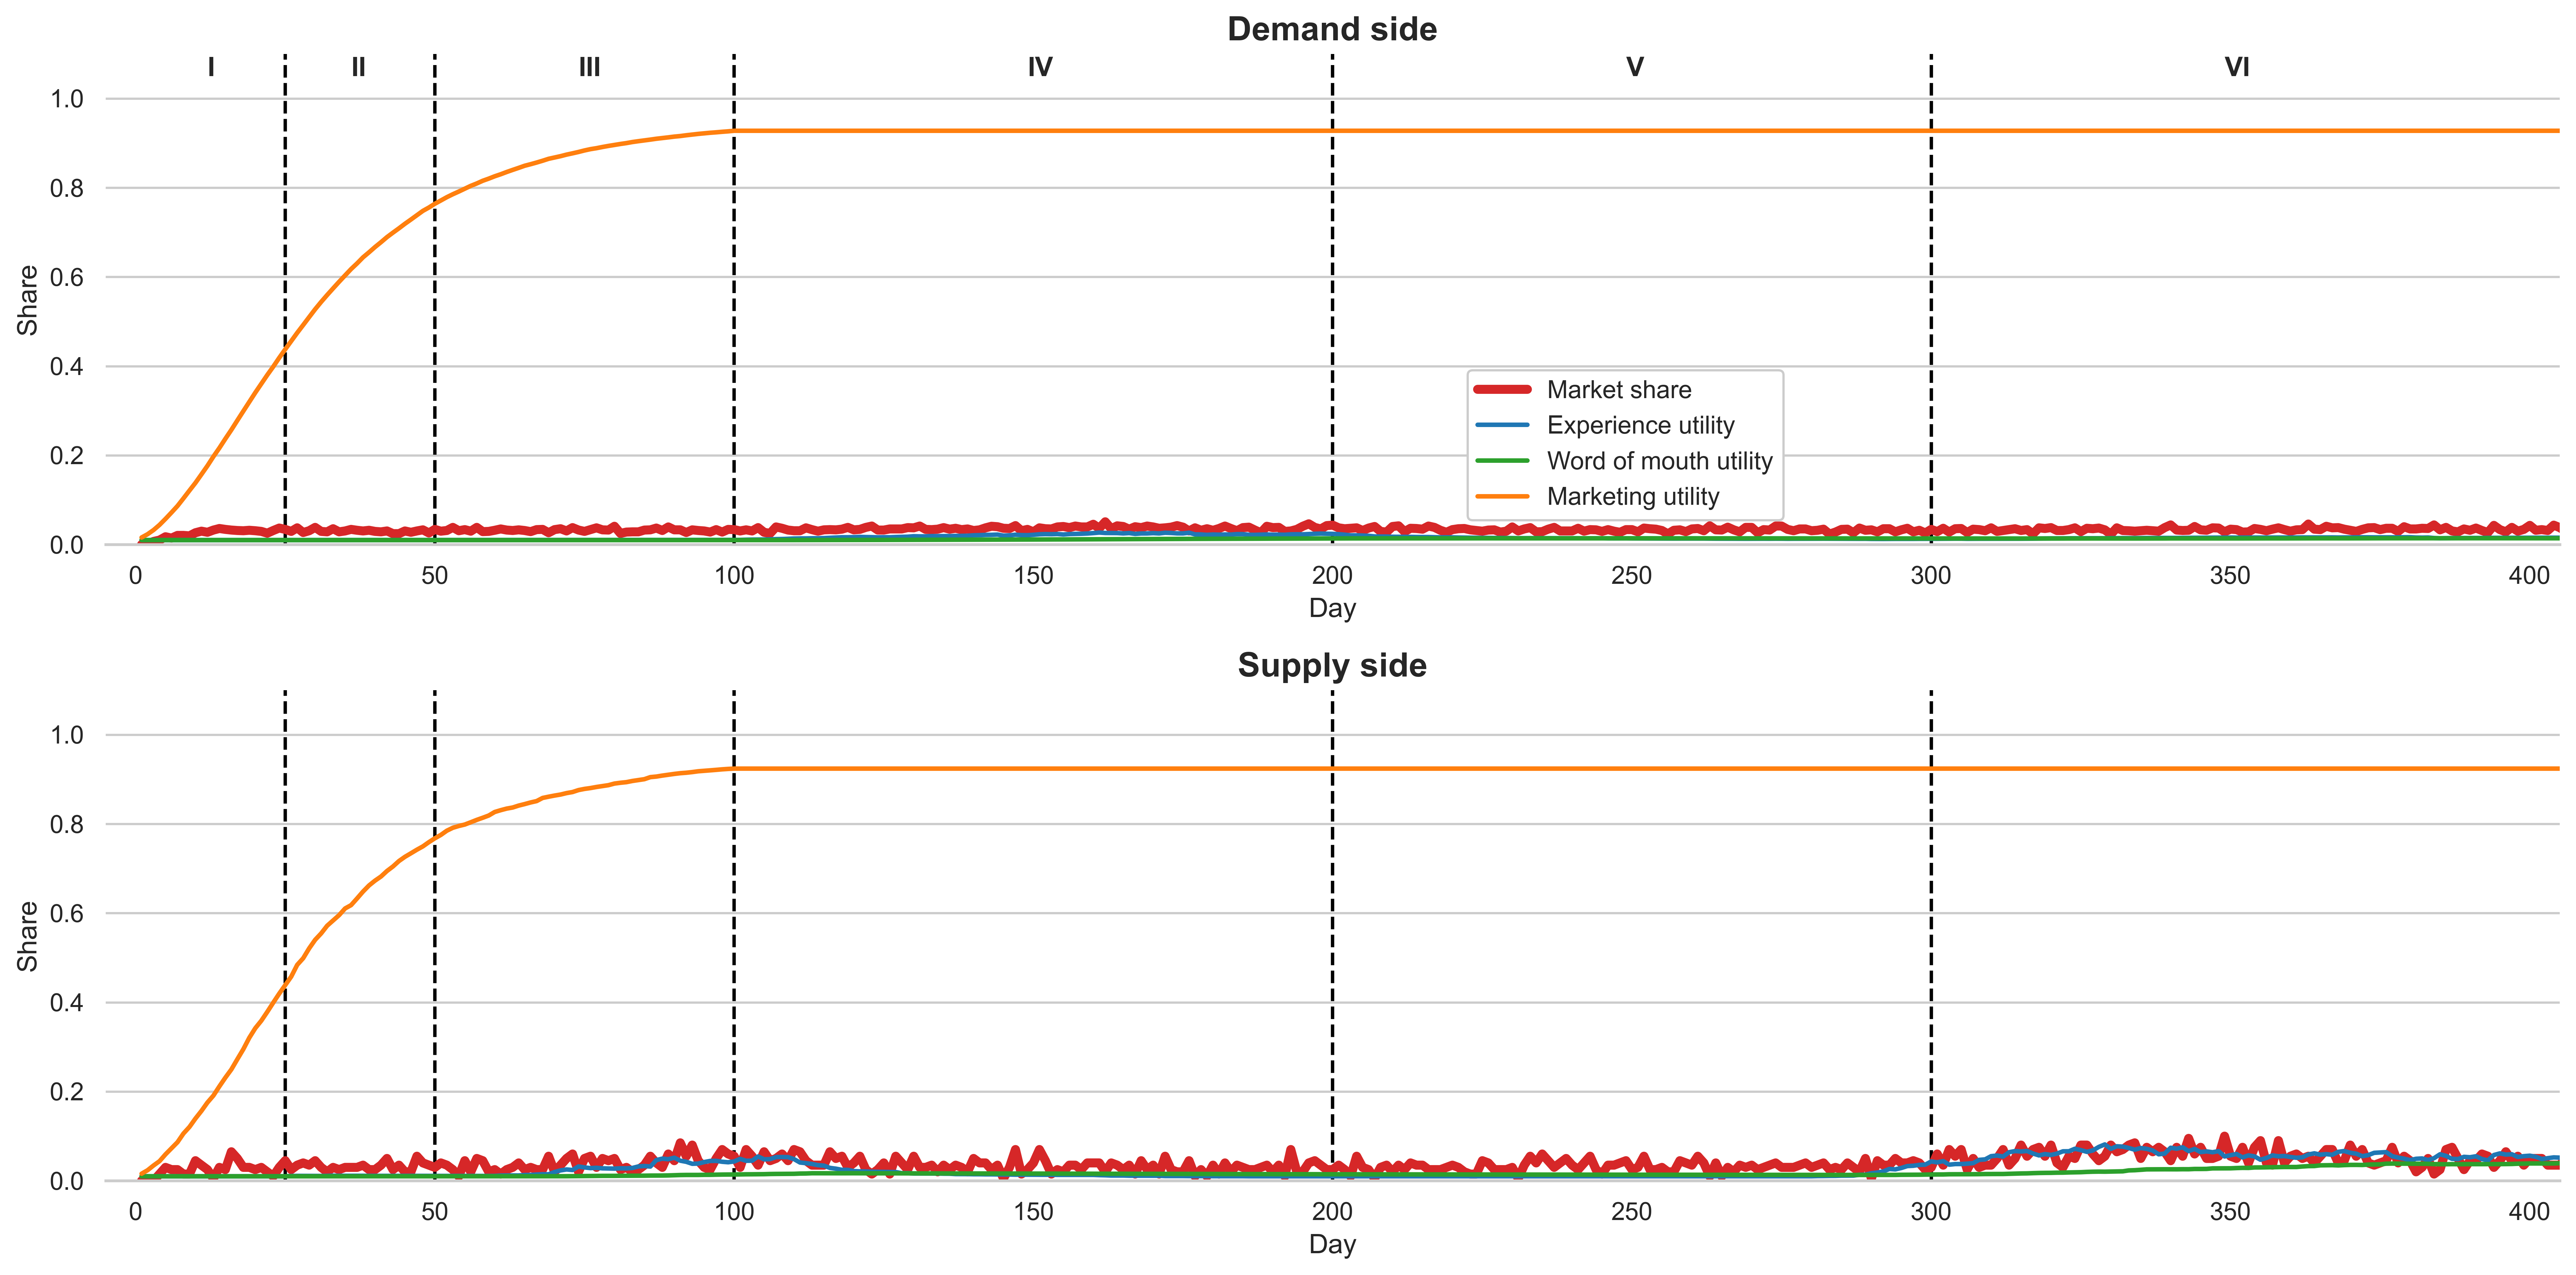

In [12]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 5
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

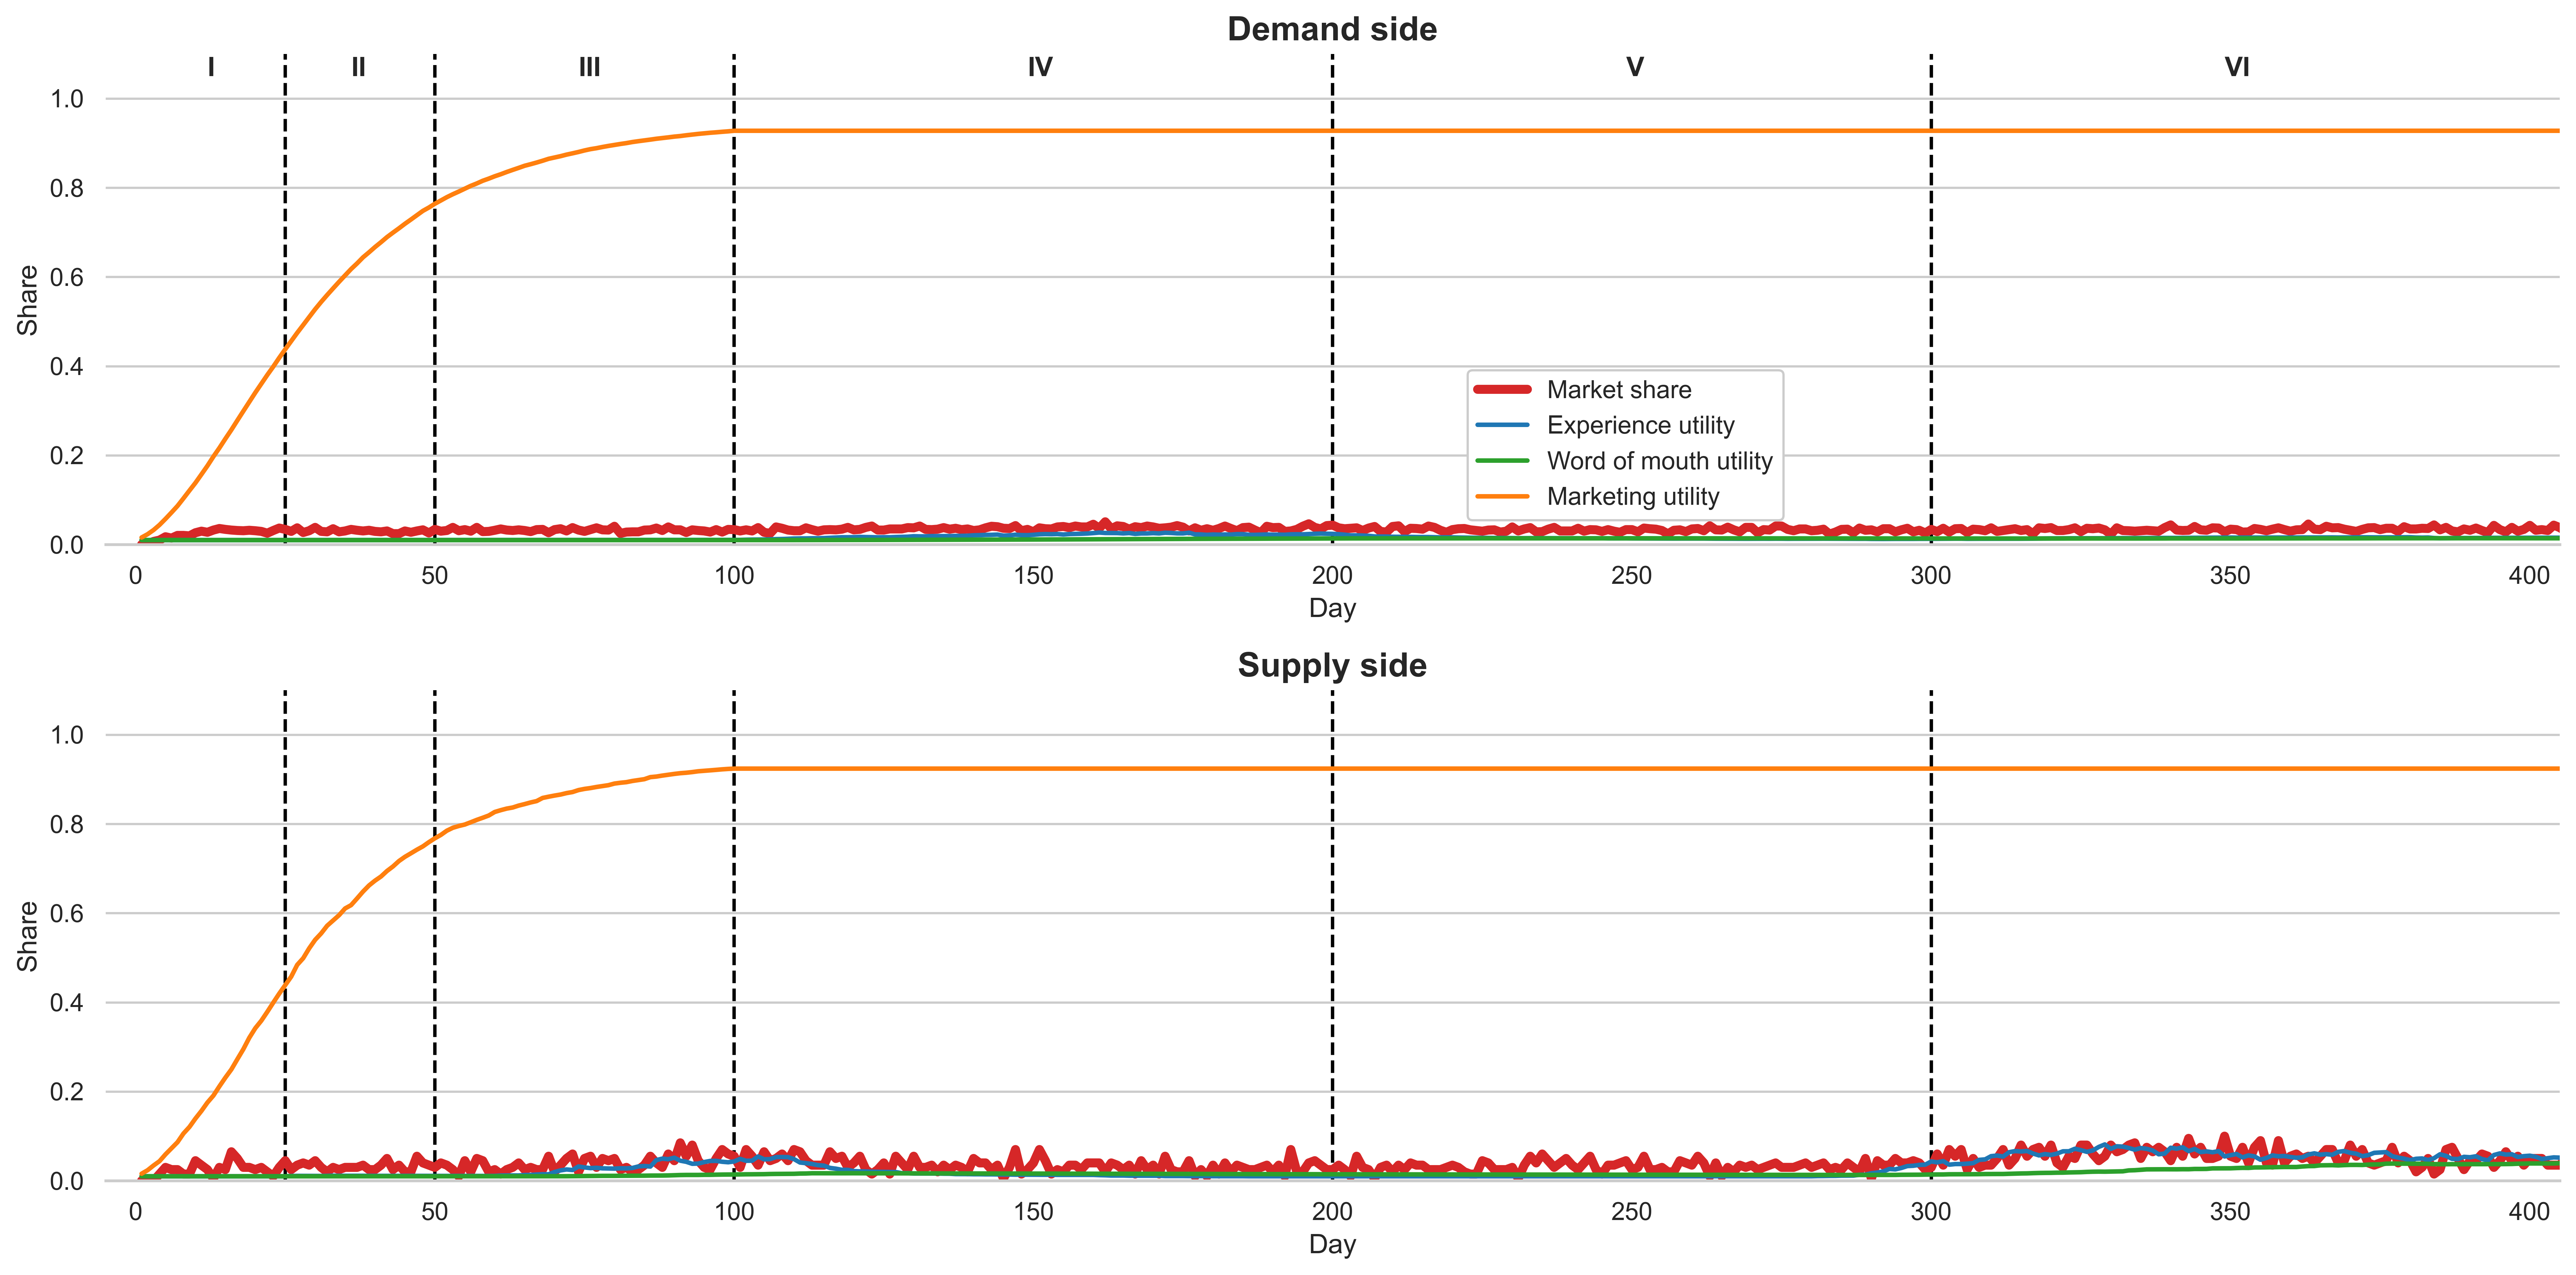

In [13]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

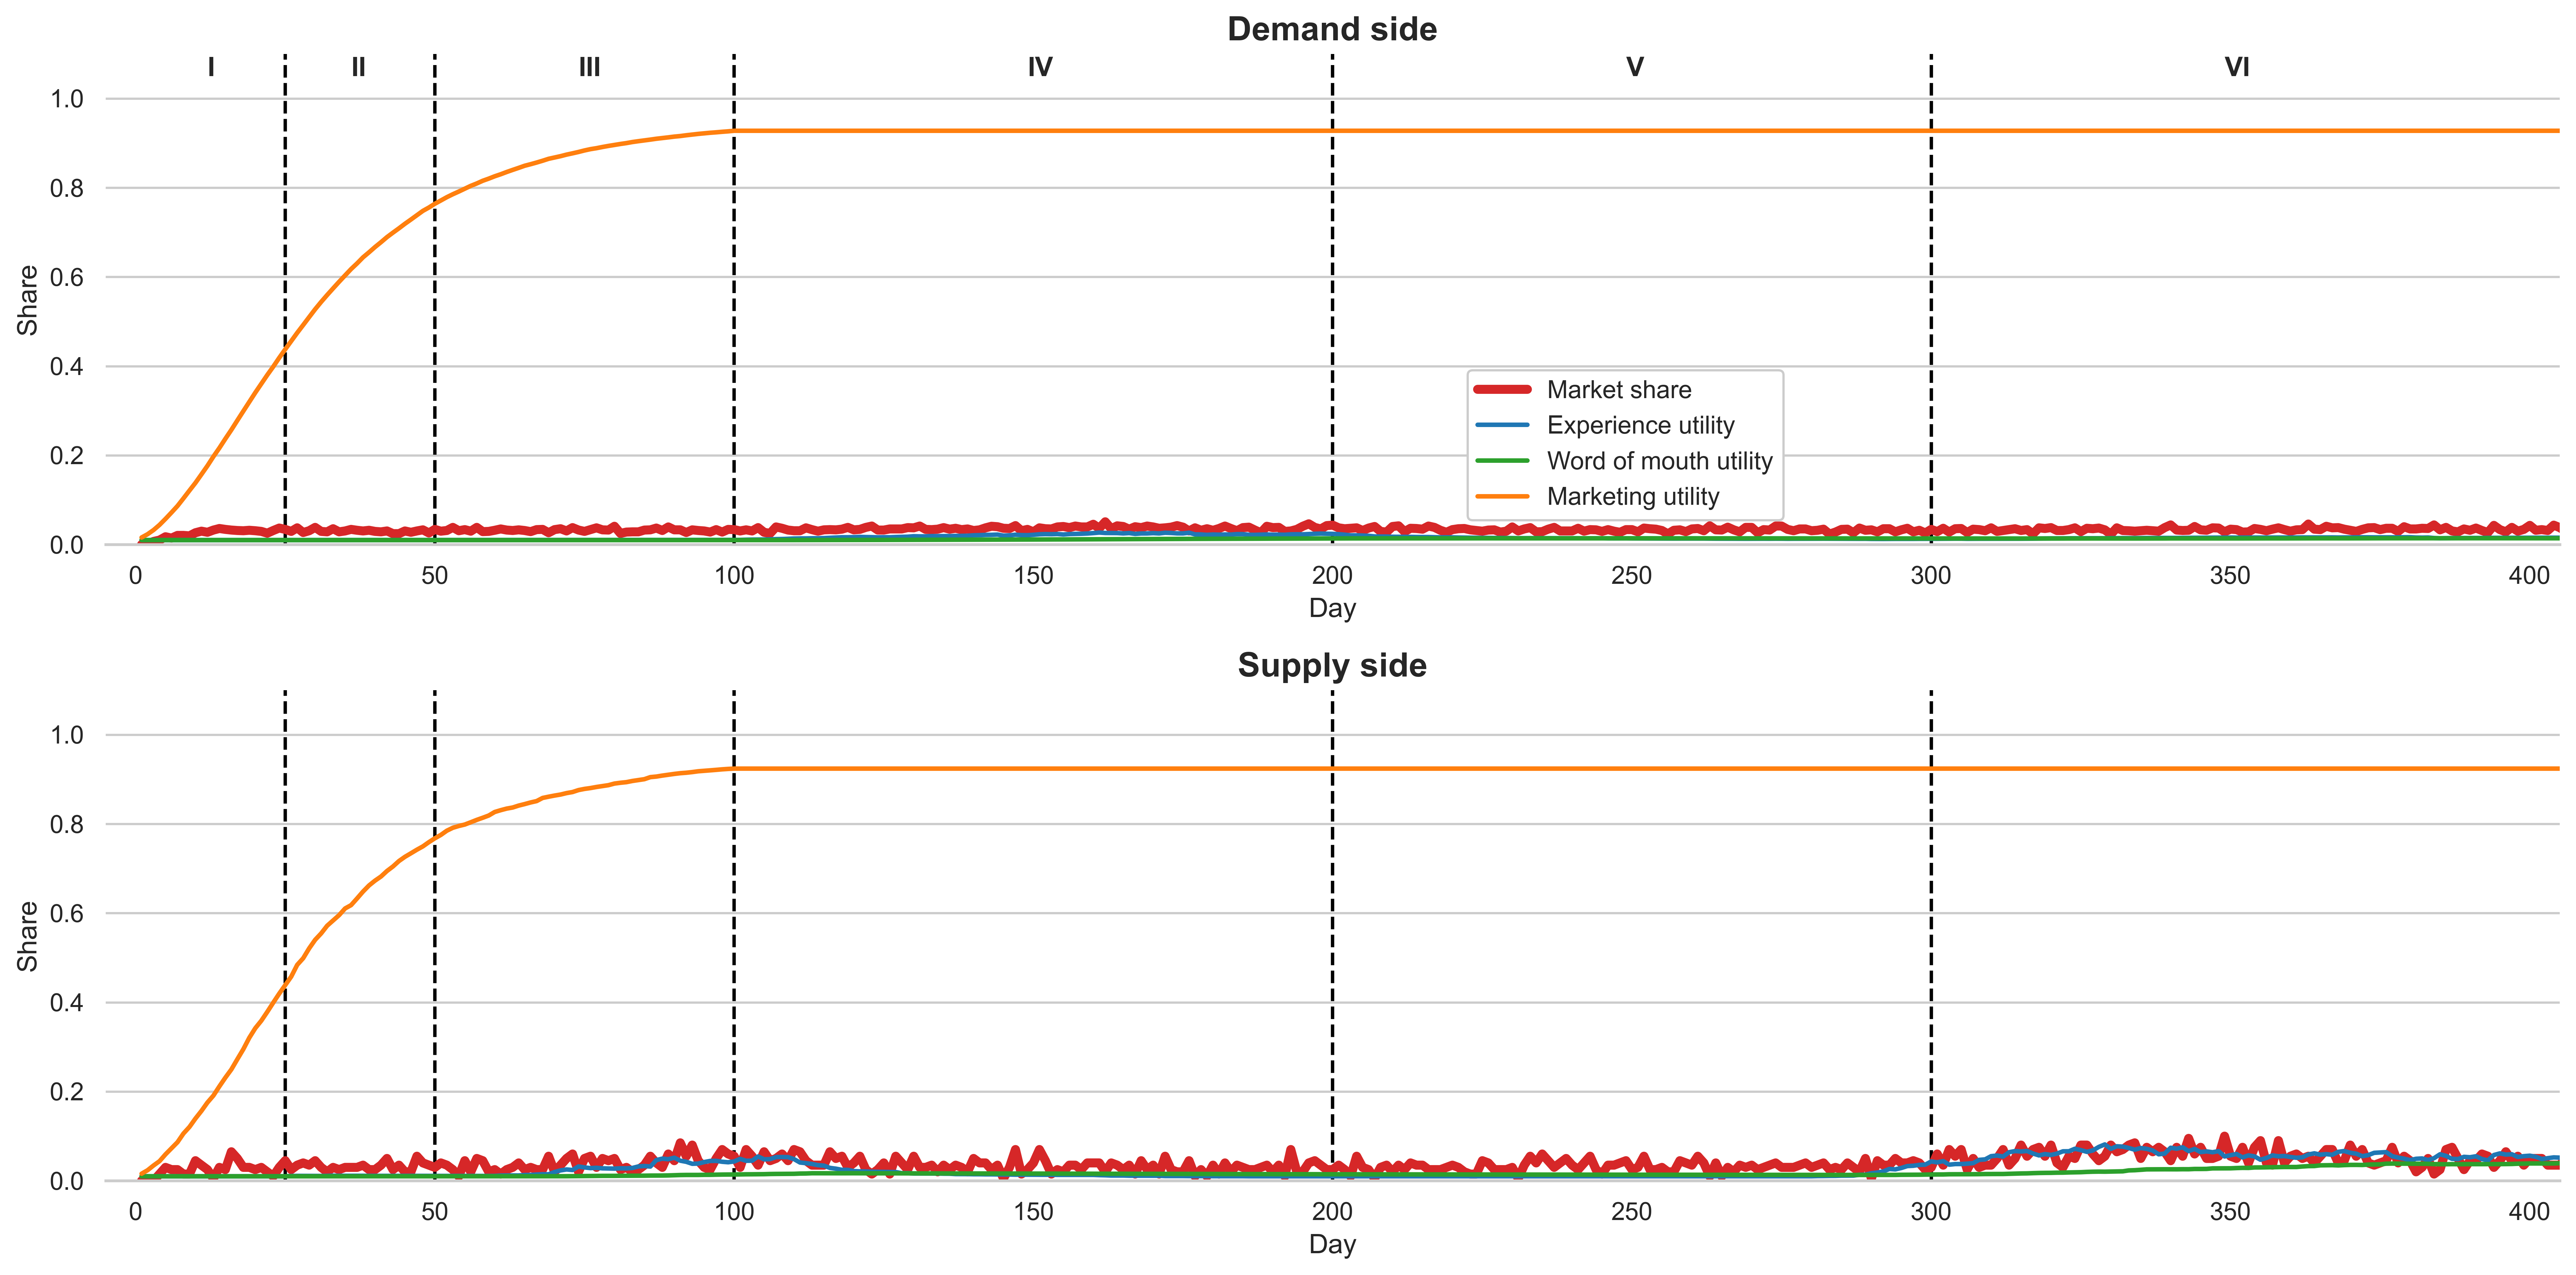

In [14]:
# nV=200, nP=2000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

AttributeError: 'DataFrame' object has no attribute 'plat_profit'

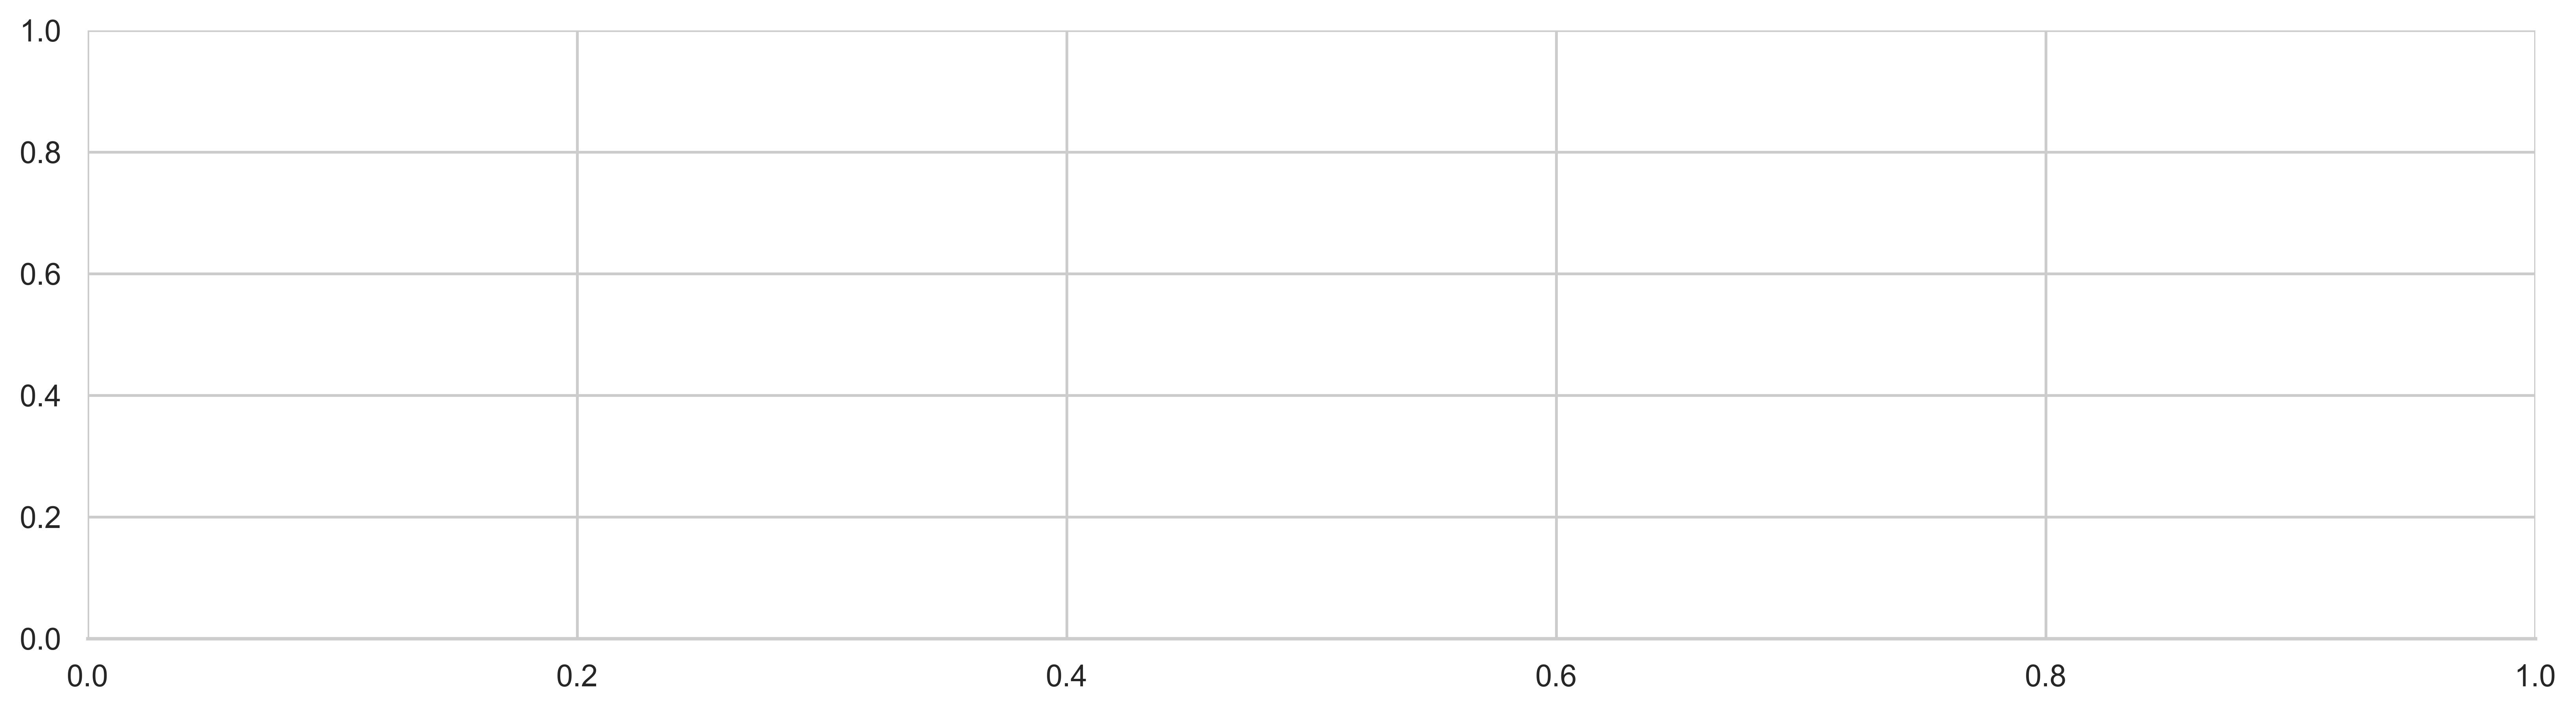

In [15]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,4))
sns.despine(left=True)

x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_profit.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C0')#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=3, label = 'Cumulative profit', color='C8')#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C1')#, marker='o')

ax.grid(axis='x')
ax.vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax.set(xlim=(-5,410), ylim=(-100000,325000))
ax.legend(framealpha=1, loc=(0.55,0.72))

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax.annotate(value[i], xy =coords[i], fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig5.png')